# INTRO

## Notebook for applying Data Assimilation on seasonal data (Campanian reconstructions)

* Assemble data in the proxy domain using offline (block update) assimilation instead of point-by-point
* Assemble data in SST (D47), SAT (D47), SSS (d18Oc) and precipitation domain
* Test the effect of adding a time uncertainty of 1 month to the proxy data

Author: **N.J. de Winter** (*n.j.de.winter@vu.nl*)<br>
Assistant Professor Vrije Universiteit Amsterdam

**References used in coding**

*Data assimilation*
- Steiger, N.J., Hakim, G.J., Steig, E.J., Battisti, D.S., Roe, G.H., 2014. Assimilation of Time-Averaged Pseudoproxies for Climate Reconstruction. Journal of Climate 27, 426–441. https://doi.org/10.1175/JCLI-D-12-00693.1
- Hakim, G.J., Emile-Geay, J., Steig, E.J., Noone, D., Anderson, D.M., Tardif, R., Steiger, N., Perkins, W.A., 2016. The last millennium climate reanalysis project: Framework and first results. Journal of Geophysical Research: Atmospheres 121, 6745–6764. https://doi.org/10.1002/2016JD024751
- King, J., Tierney, J., Osman, M., Judd, E.J., Anchukaitis, K.J., 2023. DASH: a MATLAB toolbox for paleoclimate data assimilation. Geoscientific Model Development 16, 5653–5683. https://doi.org/10.5194/gmd-16-5653-2023
- Judd, E.J., Tierney, J.E., Lunt, D.J., Montañez, I.P., Huber, B.T., Wing, S.L., Valdes, P.J., 2024. A 485-million-year history of Earth’s surface temperature. Science 385, eadk3705. https://doi.org/10.1126/science.adk3705

*Data sources*
- de Winter, N.J., Müller, I.A., Kocken, I.J., Thibault, N., Ullmann, C.V., Farnsworth, A., Lunt, D.J., Claeys, P., Ziegler, M., 2021. Absolute seasonal temperature estimates from clumped isotopes in bivalve shells suggest warm and variable greenhouse climate. Commun Earth Environ 2, 1–8. https://doi.org/10.1038/s43247-021-00193-9
- Farnsworth, A., Lunt, D.J., O’Brien, C.L., Foster, G.L., Inglis, G.N., Markwick, P., Pancost, R.D., Robinson, S.A., 2019. Climate Sensitivity on Geological Timescales Controlled by Nonlinear Feedbacks and Ocean Circulation. Geophys. Res. Lett. 46, 9880–9889. https://doi.org/10.1029/2019GL083574

*Calibration equations*
- Harwood, A. J. P., Dennis, P. F., Marca, A. D., Pilling, G. M., and Millner, R. S.: The oxygen isotope composition of water masses within the North Sea, Estuarine, Coastal and Shelf Science, 78, 353–359, https://doi.org/10.1016/j.ecss.2007.12.010, 2008.
- Daëron, M. and Vermeesch, P.: Omnivariant generalized least squares regression: Theory, geochronological applications, and making the case for reconciled Δ47 calibrations, Chemical Geology, 121881, https://doi.org/10.1016/j.chemgeo.2023.121881, 2023.
- Grossman, E. L. and Ku, T.-L.: Oxygen and carbon isotope fractionation in biogenic aragonite: temperature effects, Chemical Geology: Isotope Geoscience section, 59, 59–74, 1986.
- Gonfiantini, R., Stichler, W., and Rozanski, K.: Standards and intercomparison materials distributed by the International Atomic Energy Agency for stable isotope measurements, 1995.
- Dettman, D. L., Reische, A. K., and Lohmann, K. C.: Controls on the stable isotope composition of seasonal growth bands in aragonitic fresh-water bivalves (Unionidae), Geochimica et Cosmochimica Acta, 63, 1049–1057, 1999.

## Load packages

In [1]:
# Load packages
import numpy as np # The 'numpy' package is needed for matrix operations and calculations
import pandas as pd # The 'pandas' package helps us to import and manage data
import math as math # Math package for data cleaning
from scipy import stats # Import scipy.package for confidence intervals
from sklearn.preprocessing import StandardScaler # Import the package for standardizing data
import D47calib as D47c # Import the package for treating clumped isotope data by Daëron and Vermeesch (2023; https://github.com/mdaeron/D47calib)
import matplotlib.pyplot as plt # The 'matplotlib' package contains tools needed to plot our data and results
import seaborn as sns # The 'seaborn' package is used to make our plots look nicer (e.g. enable heatmaps)
%matplotlib inline

# PRIOR - MONTHLY
## Load monthly SST model data

In [2]:
# Load model SST data as prior and show data structure
Campanian_SST = pd.read_csv('Campanian case/Campanian_SST_4CO2.csv') # Load the data into Python and in the Jupyter environment.
Campanian_SST.head()

Cell        ja        fb        mr        ar        my        jn  \
0     1  16.69446  15.96928  15.67467  16.28566  18.95221  24.03595   
1     2  13.52504  12.20598  11.42650  12.06060  14.92666  19.72694   
2     3  11.40485   9.53737   8.53401   9.11727  12.10508  17.21716   
3     4   9.85861   8.41774   7.47036   7.73194  10.39034  15.63772   
4     5  17.65044  17.04619  16.80905  17.25332  19.25554  23.52535   

          jl         ag         sp         ot         nv         dc  
0  28.790068  30.590389  28.204977  25.071106  21.702738  18.562786  
1  24.959450  28.078724  26.131413  22.343794  18.724234  15.654868  
2  22.189592  25.558674  24.180384  19.873465  16.220375  13.532894  
3  20.783098  23.926445  22.410400  17.623096  13.982187  11.567332  
4  27.760159  29.674229  27.505966  24.548275  21.602547  19.152851

## Load monthly SSS model data

In [3]:
# Load model SSS data as prior and show data structure
Campanian_SSS = pd.read_csv('Campanian case/Campanian_SSS_4CO2.csv') # Load the data into Python and in the Jupyter environment.
Campanian_SSS.head()

Cell         ja         fb         mr         ar         my         jn  \
0     1  38.049088  38.408475  38.497470  38.251915  37.729278  37.175676   
1     2  34.444552  34.664869  34.553228  34.102059  33.445527  32.853620   
2     3  31.022739  31.013631  30.889599  30.465579  29.808659  29.326850   
3     4  29.071614  29.532483  29.618115  29.312679  28.508187  27.776942   
4     5  38.221195  38.527429  38.604043  38.421331  37.869897  37.236443   

          jl         ag         sp         ot         nv         dc  
0  36.946514  36.743225  36.792417  37.133311  37.474540  37.761063  
1  32.597889  32.347299  32.406604  32.948889  33.413083  33.987773  
2  28.892184  28.507395  28.458803  28.719461  29.248610  30.281342  
3  26.874235  26.238276  25.914295  25.831631  26.406472  27.735042  
4  36.878951  36.619725  36.769849  37.127605  37.460644  37.872071

## Load monthly SAT model data

In [4]:
# Load model SAT data as prior and show data structure
Campanian_SAT = pd.read_csv('Campanian case/teuyI_sat_data.csv') # Load the data into Python and in the Jupyter environment.
Campanian_SAT_SD = pd.read_csv('Campanian case/teuyI_sat_data_sd.csv') # Load the SAT uncertainty data into Python and in the Jupyter environment.

# Rename months to two-letter codes
month_mapping = {
    'jan': 'ja', 'feb': 'fb', 'mar': 'mr', 'apr': 'ar', 'may': 'my',
    'jun': 'jn', 'jul': 'jl', 'aug': 'ag', 'sep': 'sp', 'oct': 'ot',
    'nov': 'nv', 'dec': 'dc'
}
Campanian_SAT.rename(columns=month_mapping, inplace=True) # Rename the columns to two-letter codes for months
Campanian_SAT_SD.rename(columns=month_mapping, inplace=True) # Rename the columns to two-letter codes for months in the uncertainty data

# Create a unique "Cell" number for each unique (latitude, longitude) combination
Campanian_SAT["Cell"] = pd.factorize(list(zip(Campanian_SAT["latitude"], Campanian_SAT["longitude"])))[0] + 1
Campanian_SAT_SD["Cell"] = pd.factorize(list(zip(Campanian_SAT_SD["latitude"], Campanian_SAT_SD["longitude"])))[0] + 1

# Remove the 'latitude' and 'longitude' columns from the SAT dataframes
Campanian_SAT = Campanian_SAT.drop(columns=['latitude', 'longitude'])
Campanian_SAT_SD = Campanian_SAT_SD.drop(columns=['latitude', 'longitude'])

print(Campanian_SAT.head())
print(Campanian_SAT_SD.head())

          ja        fb        mr         ar         my         jn         jl  \
0   7.774591  6.139581  5.771326   7.394403  10.360193  14.668207  20.103357   
1   8.058710  6.542352  6.323145   7.932031  10.724084  14.602655  18.466364   
2   8.593439  7.242426  7.340753   9.139703  12.122369  16.486688  20.318201   
3   9.611688  7.996118  7.603357   9.102136  11.974084  16.125391  21.396204   
4  10.390619  8.957056  8.669489  10.055505  12.591943  16.384119  20.473962   

          ag         sp         ot         nv         dc  Cell  
0  23.406641  21.947229  17.086542  13.228265  10.089410     1  
1  20.642175  19.893152  16.162378  12.861719  10.208490     2  
2  21.959619  20.916040  16.474573  13.113916  10.727228     3  
3  25.020563  23.609094  19.251123  15.378381  12.051233     4  
4  23.234186  22.182275  18.689325  15.376031  12.584131     5  
         ja        fb        mr        ar        my        jn        jl  \
0  1.395678  1.539413  1.373105  1.205456  1.256235  1

C:\Users\nwi213\AppData\Local\Temp\ipykernel_31812\384992562.py:15: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  Campanian_SAT["Cell"] = pd.factorize(list(zip(Campanian_SAT["latitude"], Campanian_SAT["longitude"])))[0] + 1
C:\Users\nwi213\AppData\Local\Temp\ipykernel_31812\384992562.py:16: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  Campanian_SAT_SD["Cell"] = pd.factorize(list(zip(Campanian_SAT_SD["latitude"], Campanian_SAT_SD["longitude"])))[0] + 1


## Load monthly precipitation model data

In [5]:
# Load model precip data as prior and show data structure
Campanian_precip = pd.read_csv('Campanian case/teuyI_precip_data.csv') # Load the data into Python and in the Jupyter environment.
Campanian_precip_SD = pd.read_csv('Campanian case/teuyI_precip_data_sd.csv') # Load the precip uncertainty data into Python and in the Jupyter environment.

# Rename months to two-letter codes
Campanian_precip.rename(columns=month_mapping, inplace=True) # Rename the columns to two-letter codes for months
Campanian_precip_SD.rename(columns=month_mapping, inplace=True) # Rename the columns to two-letter codes for months in the uncertainty data

# Create a unique "Cell" number for each unique (latitude, longitude) combination
Campanian_precip["Cell"] = pd.factorize(list(zip(Campanian_precip["latitude"], Campanian_precip["longitude"])))[0] + 1
Campanian_precip_SD["Cell"] = pd.factorize(list(zip(Campanian_precip_SD["latitude"], Campanian_precip_SD["longitude"])))[0] + 1

# Remove the 'latitude' and 'longitude' columns from the precip dataframes
Campanian_precip = Campanian_precip.drop(columns=['latitude', 'longitude'])
Campanian_precip_SD = Campanian_precip_SD.drop(columns=['latitude', 'longitude'])

print(Campanian_precip.head())
print(Campanian_precip_SD.head())

         ja        fb        mr        ar        my        jn        jl  \
0  6.066714  5.462732  4.726045  3.590342  2.135874  0.720273  0.559864   
1  7.384274  6.555890  5.959555  4.582152  2.280434  0.704759  0.566136   
2  7.688979  6.766974  6.236646  4.739635  1.999642  0.526359  0.308291   
3  5.883341  5.026747  4.652615  3.913324  2.260280  1.048544  0.848040   
4  6.807429  5.999722  5.696740  4.640291  2.502660  1.050216  0.625439   

         ag        sp        ot        nv        dc  Cell  
0  1.133415  1.723382  4.283572  6.230137  6.921783     1  
1  0.866463  1.797629  4.491214  6.752506  8.295986     2  
2  0.674662  1.775069  4.068635  6.856350  9.147441     3  
3  1.689622  1.491909  3.604031  5.844173  7.288515     4  
4  1.056888  1.432553  3.869959  6.235170  8.408879     5  
         ja        fb        mr        ar        my        jn        jl  \
0  1.375605  1.589136  1.312803  1.469016  1.043963  0.458398  0.343257   
1  1.674952  1.889340  1.640266  1.9180

C:\Users\nwi213\AppData\Local\Temp\ipykernel_31812\3157528787.py:10: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  Campanian_precip["Cell"] = pd.factorize(list(zip(Campanian_precip["latitude"], Campanian_precip["longitude"])))[0] + 1
C:\Users\nwi213\AppData\Local\Temp\ipykernel_31812\3157528787.py:11: FutureWarning: factorize with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  Campanian_precip_SD["Cell"] = pd.factorize(list(zip(Campanian_precip_SD["latitude"], Campanian_precip_SD["longitude"])))[0] + 1


### Combine SST, SAT, SSS and precipitation data by modelname

In [6]:
# Merge the datasets of SST, SSS, SAT, SAT_SD, precip, and precip_SD sequentially, forcing suffixes to be added to the column names
Campanian_models = Campanian_SST.rename(columns={c: c+'_SST' for c in Campanian_SST.columns if c != 'Cell'})
Campanian_models = pd.merge(
    Campanian_models,
    Campanian_SSS.rename(columns={c: c+'_SSS' for c in Campanian_SSS.columns if c != 'Cell'}),
    on='Cell',
    how='outer'
)
Campanian_models = pd.merge(
    Campanian_models,
    Campanian_SAT.rename(columns={c: c+'_SAT' for c in Campanian_SAT.columns if c != 'Cell'}),
    on='Cell',
    how='outer'
)
Campanian_models = pd.merge(
    Campanian_models,
    Campanian_SAT_SD.rename(columns={c: c+'_SAT_SD' for c in Campanian_SAT_SD.columns if c != 'Cell'}),
    on='Cell',
    how='outer'
)
Campanian_models = pd.merge(
    Campanian_models,
    Campanian_precip.rename(columns={c: c+'_precip' for c in Campanian_precip.columns if c != 'Cell'}),
    on='Cell',
    how='outer'
)
Campanian_models = pd.merge(
    Campanian_models,
    Campanian_precip_SD.rename(columns={c: c+'_precip_SD' for c in Campanian_precip_SD.columns if c != 'Cell'}),
    on='Cell',
    how='outer'
)

# Display the combined dataset
Campanian_models.head()

Cell    ja_SST    fb_SST    mr_SST    ar_SST    my_SST    jn_SST  \
0     1  16.69446  15.96928  15.67467  16.28566  18.95221  24.03595   
1     2  13.52504  12.20598  11.42650  12.06060  14.92666  19.72694   
2     3  11.40485   9.53737   8.53401   9.11727  12.10508  17.21716   
3     4   9.85861   8.41774   7.47036   7.73194  10.39034  15.63772   
4     5  17.65044  17.04619  16.80905  17.25332  19.25554  23.52535   

      jl_SST     ag_SST     sp_SST  ...  mr_precip_SD  ar_precip_SD  \
0  28.790068  30.590389  28.204977  ...      1.312803      1.469016   
1  24.959450  28.078724  26.131413  ...      1.640266      1.918096   
2  22.189592  25.558674  24.180384  ...      1.731925      2.237749   
3  20.783098  23.926445  22.410400  ...      1.587048      1.890843   
4  27.760159  29.674229  27.505966  ...      1.607530      2.175152   

   my_precip_SD  jn_precip_SD  jl_precip_SD  ag_precip_SD  sp_precip_SD  \
0      1.043963      0.458398      0.343257      0.656478      1.167061   
1      1.053193      0.438275      0.212422      0.498681      1.289528   
2      1.123610      0.476265      0.154959      0.692508      1.556997   
3      1.038890      0.573467      0.498148      1.036244      1.235744   
4      1.160029      0.766069      0.201746      0.767458      1.131980   

   ot_precip_SD  nv_precip_SD  dc_precip_SD  
0      1.849062      1.945567      1.781690  
1      2.338496      2.535894      2.216605  
2      2.294701      2.809951      2.840384  
3      1.738148      1.679335      1.816288  
4      1.944947      2.063812      2.038366  

[5 rows x 73 columns]

## Calculate the monthly prior for model SST, SAT, SSS and precipitation values

In [7]:
# Create list of month names
months = ['ja', 'fb', 'mr', 'ar', 'my', 'jn', 'jl', 'ag', 'sp', 'ot', 'nv', 'dc']

# Prior SST, SAT, SSS & precipitation estimates from climate models (mean)
mu_prior_SST_monthly = np.array(Campanian_models[[f"{month}_SST" for month in months]].mean(axis=0, skipna=True)) # No SDs available for SST, so we use the mean directly
mu_prior_SSS_monthly = np.array(Campanian_models[[f"{month}_SSS" for month in months]].mean(axis=0, skipna=True)) # No SDs available for SSS, so we use the mean directly
prior_weights_SAT_monthly = 1 / Campanian_models[[f"{month}_SAT_SD" for month in months]] ** 2 # Set the weights of the data based on the standard errors for SAT
prior_weights_SAT_monthly.columns = [col.replace('_SAT_SD', '_SAT') for col in prior_weights_SAT_monthly.columns] # Change the column suffixes from "_SAT_SD" to "_SAT" in prior_weights_SAT_monthly to match the headers of the SAT matrix later for multiplication
mu_prior_SAT_monthly = np.array(
    (Campanian_models[[f"{month}_SAT" for month in months]] * prior_weights_SAT_monthly).sum(axis=0, skipna=True) /
    prior_weights_SAT_monthly.sum(axis=0, skipna=True)
) # Prior SAT estimates from climate models (weighted mean)
# Weighted mean for precip
prior_weights_precip_monthly = 1 / Campanian_models[[f"{month}_precip_SD" for month in months]] ** 2 # Set the weights of the data based on the standard errors for precip
prior_weights_precip_monthly.columns = [col.replace('_precip_SD', '_precip') for col in prior_weights_precip_monthly.columns] # Change the column suffixes from "_precip_SD" to "_precip" in prior_weights_precip_monthly to match the headers of the precip matrix later for multiplication
mu_prior_precip_monthly = np.array(
    (Campanian_models[[f"{month}_precip" for month in months]] * prior_weights_precip_monthly).sum(axis=0, skipna=True) /
    prior_weights_precip_monthly.sum(axis=0, skipna=True)
) # Prior precipitation estimates from climate models (weighted mean)

# Covariance between months in prior SST, SAT, SSS, and precip estimates from climate models (covariance matrix)
cov_prior_SST_monthly = np.cov(Campanian_models[[f"{month}_SST" for month in months]].dropna(), rowvar=False) # No SDs available for SST, so we use the covariance directly
cov_prior_SSS_monthly = np.cov(Campanian_models[[f"{month}_SSS" for month in months]].dropna(), rowvar=False) # No SDs available for SSS, so we use the covariance directly
# Calculate the covariance matrix for SAT and add the mean squared SAT SDs to the diagonal
prior_cov_raw_SAT_monthly = np.cov(Campanian_models[[f"{month}_SAT" for month in months]].dropna(), rowvar=False)
prior_measurement_variances_SAT = (Campanian_models[[f"{month}_SAT_SD" for month in months]] ** 2).mean(axis=0, skipna=True)
cov_prior_SAT_monthly = prior_cov_raw_SAT_monthly.copy()
np.fill_diagonal(cov_prior_SAT_monthly, np.diagonal(prior_cov_raw_SAT_monthly) + prior_measurement_variances_SAT)
# Calculate the covariance matrix for precip and add the mean squared precip SDs to the diagonal
prior_cov_raw_precip_monthly = np.cov(Campanian_models[[f"{month}_precip" for month in months]].dropna(), rowvar=False)
prior_measurement_variances_precip = (Campanian_models[[f"{month}_precip_SD" for month in months]] ** 2).mean(axis=0, skipna=True)
cov_prior_precip_monthly = prior_cov_raw_precip_monthly.copy()
np.fill_diagonal(cov_prior_precip_monthly, np.diagonal(prior_cov_raw_precip_monthly) + prior_measurement_variances_precip)

# Store copy of original prior means to keep when later updating the prior
mu_prior_SAT_monthly_original, cov_prior_SAT_monthly_original = mu_prior_SAT_monthly.copy(), cov_prior_SAT_monthly.copy()
mu_prior_SST_monthly_original, cov_prior_SST_monthly_original = mu_prior_SST_monthly.copy(), cov_prior_SST_monthly.copy()
mu_prior_SSS_monthly_original, cov_prior_SSS_monthly_original = mu_prior_SSS_monthly.copy(), cov_prior_SSS_monthly.copy()
mu_prior_precip_monthly_original, cov_prior_precip_monthly_original = mu_prior_precip_monthly.copy(), cov_prior_precip_monthly.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_SAT_monthly = np.sqrt(np.diag(cov_prior_SAT_monthly))
std_prior_SST_monthly = np.sqrt(np.diag(cov_prior_SST_monthly))
std_prior_SSS_monthly = np.sqrt(np.diag(cov_prior_SSS_monthly))
std_prior_precip_monthly = np.sqrt(np.diag(cov_prior_precip_monthly))

print("SAT Monthly Means:", mu_prior_SAT_monthly)
print("SAT Monthly Std Devs:", std_prior_SAT_monthly)
print("SST Monthly Means:", mu_prior_SST_monthly)
print("SST Monthly Std Devs:", std_prior_SST_monthly)
print("SSS Monthly Means:", mu_prior_SSS_monthly)
print("SSS Monthly Std Devs:", std_prior_SSS_monthly)
print("Precip Monthly Means:", mu_prior_precip_monthly)
print("Precip Monthly Std Devs:", std_prior_precip_monthly)

SAT Monthly Means: [11.70705827 10.50482301 10.38140973 11.49662576 14.17544379 17.93040174
 21.98855378 25.60875508 23.66068674 20.18152679 16.62011725 13.76256146]
SAT Monthly Std Devs: [3.22414943 3.6673523  3.72129497 3.54046589 3.29708192 3.39494085
 3.3078202  3.11893624 2.70808384 3.11013013 3.1028822  3.02219532]
SST Monthly Means: [13.42857333 12.32284417 11.73241    12.15750917 14.555765   19.00769167
 23.21746778 25.76302036 24.3978556  20.79902569 17.56222256 15.12304385]
SST Monthly Std Devs: [2.88953439 3.17757553 3.40959543 3.42213572 3.18395631 3.00919396
 3.17811713 3.07293342 2.54780912 2.9916104  3.0736372  2.87594958]
SSS Monthly Means: [34.38035997 34.64311007 34.68547432 34.38451164 33.78569786 33.28367896
 32.96100648 32.70340301 32.71532687 32.90161951 33.22547048 33.80336539]
SSS Monthly Std Devs: [3.06289917 3.05099082 3.07179951 3.14287858 3.23268399 3.2415024
 3.36755931 3.47405737 3.60496929 3.7473411  3.69011806 3.38200736]
Precip Monthly Means: [6.5236049

## Plot the monthly priors for all model values

[Text(1, 0, 'January'),
 Text(2, 0, 'February'),
 Text(3, 0, 'March'),
 Text(4, 0, 'April'),
 Text(5, 0, 'May'),
 Text(6, 0, 'June'),
 Text(7, 0, 'July'),
 Text(8, 0, 'August'),
 Text(9, 0, 'September'),
 Text(10, 0, 'October'),
 Text(11, 0, 'November'),
 Text(12, 0, 'December')]

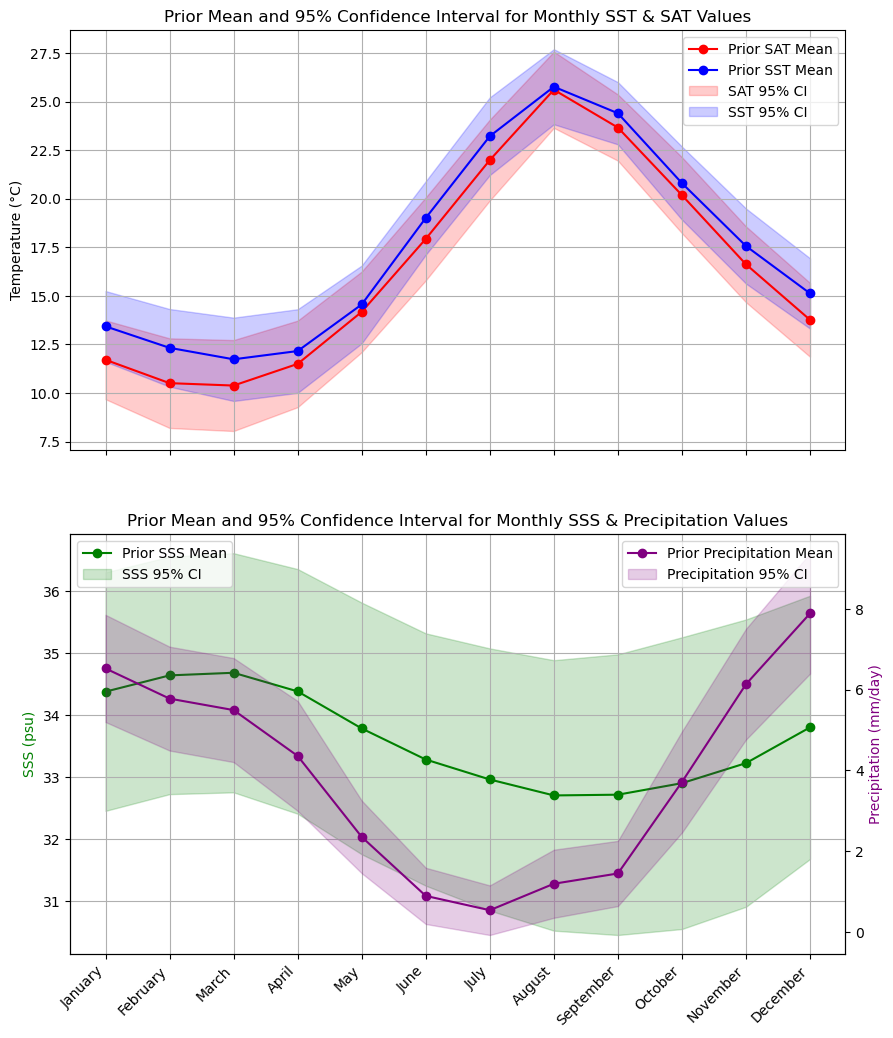

In [8]:
# Set dimensions of data
n_models_monthly = len(Campanian_models["Cell"])  # Find the total number of models (use monthly data because monthly data has this column duplicated 3 times)

# Create a monthly scale for the x-axis
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']  # List full month names
months_scale = np.arange(len(months)) + 1  # Create monthly scale

# Create the figure and axes
fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# Panel 1: Plot the prior distribution for SST and SAT
axes[0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o', color='r')
axes[0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o', color='b')

# Add 95% confidence intervals for SAT
axes[0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    mu_prior_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='r', label='SAT 95% CI'
)

# Add 95% confidence intervals for SST
axes[0].fill_between(
    months_scale,
    mu_prior_SST_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    mu_prior_SST_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='b', label='SST 95% CI'
)

axes[0].set_title('Prior Mean and 95% Confidence Interval for Monthly SST & SAT Values')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()
axes[0].grid(True)

# Panel 2: Plot the prior distribution for SSS and precipitation
axes[1].plot(months_scale, mu_prior_SSS_monthly, label='Prior SSS Mean', marker='o', color='g')
ax2 = axes[1].twinx()  # Create a secondary y-axis for precipitation
ax2.plot(months_scale, mu_prior_precip_monthly, label='Prior Precipitation Mean', marker='o', color='purple')

# Add 95% confidence intervals for SSS
axes[1].fill_between(
    months_scale,
    mu_prior_SSS_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_monthly / np.sqrt(n_models_monthly),
    mu_prior_SSS_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='g', label='SSS 95% CI'
)

# Add 95% confidence intervals for precipitation
ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    mu_prior_precip_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, color='purple', label='Precipitation 95% CI'
)

axes[1].set_ylabel('SSS (psu)', color='g')
ax2.set_ylabel('Precipitation (mm/day)', color='purple')
axes[1].set_title('Prior Mean and 95% Confidence Interval for Monthly SSS & Precipitation Values')
axes[1].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[1].grid(True)

# Update the x-axis with month names
axes[1].set_xticks(months_scale)
axes[1].set_xticklabels(month_names, rotation=45, ha="right")

### Convert SST and SAT model data to D47 domain using the regression by Daëron and Vermeesch (2023) and propagate uncertainty in the calibration

In [9]:
# Apply T47()-function from the D47calib package to all SST columns
# Identify the SST and SAT columns separately
SST_columns = [col for col in Campanian_models.columns if col.endswith('_SST')]
SAT_columns = [col for col in Campanian_models.columns if col.endswith('_SAT')]

# Apply the conversion function to the SST and SAT columns and add new columns for D47 and D47_SE
for col in SST_columns:
    base_col_name = col.replace('_SST', '') # Remove the '_SST' suffix from the column name
    # Find the corresponding SD column for SST
    sd_col = f"{base_col_name}_SST_SD"
    if sd_col in Campanian_models.columns:
        Campanian_models[f'{base_col_name}_SST_D47'], Campanian_models[f'{base_col_name}_SST_D47_SE'] = zip(*Campanian_models.apply(
            lambda row: D47c.OGLS23.T47(T=row[col], sT=row[sd_col]) if not pd.isna(row[col]) and not pd.isna(row[sd_col]) else (np.nan, np.nan),
            axis=1
        ))
    else:
        # If no SD column, fall back to sT=None
        Campanian_models[f'{base_col_name}_SST_D47'], Campanian_models[f'{base_col_name}_SST_D47_SE'] = zip(*Campanian_models[col].apply(
            lambda x: D47c.OGLS23.T47(T=x) if not pd.isna(x) else (np.nan, np.nan)
        ))
for col in SAT_columns:
    base_col_name = col.replace('_SAT', '')  # Remove the '_SAT' suffix from the column name
    sd_col = f"{base_col_name}_SAT_SD"
    if sd_col in Campanian_models.columns:
        Campanian_models[f'{base_col_name}_SAT_D47'], Campanian_models[f'{base_col_name}_SAT_D47_SE'] = zip(*Campanian_models.apply(
            lambda row: D47c.OGLS23.T47(T=row[col], sT=row[sd_col]) if not pd.isna(row[col]) and not pd.isna(row[sd_col]) else (np.nan, np.nan),
            axis=1
        ))
    else:
        # If no SD column, fall back to sT=None
        Campanian_models[f'{base_col_name}_SAT_D47'], Campanian_models[f'{base_col_name}_SAT_D47_SE'] = zip(*Campanian_models[col].apply(
            lambda x: D47c.OGLS23.T47(T=x) if not pd.isna(x) else (np.nan, np.nan)
        ))

# Display the combined data with D47 and D47_SE columns
D47_columns = [col for col in Campanian_models.columns if col.endswith('_D47')]
D47_se_columns = [col for col in Campanian_models.columns if '_D47_SE' in col]
print("D47 values for all model outcomes:\n", Campanian_models[D47_columns].head())
print("Calibration standard errors for all model outcomes:\n", Campanian_models[D47_se_columns].head())

D47 values for all model outcomes:
    ja_SST_D47  fb_SST_D47  mr_SST_D47  ar_SST_D47  my_SST_D47  jn_SST_D47  \
0    0.619550    0.621943    0.622921    0.620897    0.612214    0.596319   
1    0.630147    0.634664    0.637364    0.635166    0.625417    0.609737   
2    0.637439    0.644002    0.647583    0.645496    0.635013    0.617836   
3    0.642863    0.648000    0.651422    0.650473    0.640988    0.623043   
4    0.616422    0.618395    0.619173    0.617718    0.611242    0.597878   

   jl_SST_D47  ag_SST_D47  sp_SST_D47  ot_SST_D47  ...  mr_SAT_D47  \
0    0.582190    0.577016    0.583892    0.593184  ...    0.657647   
1    0.593520    0.584261    0.590006    0.601517  ...    0.655613   
2    0.601995    0.591718    0.595879    0.609271  ...    0.651893   
3    0.606392    0.596652    0.601310    0.616511  ...    0.650939   
4    0.585193    0.579637    0.585939    0.594763  ...    0.647097   

   ar_SAT_D47  my_SAT_D47  jn_SAT_D47  jl_SAT_D47  ag_SAT_D47  sp_SAT_D47  \
0  

### Estimate seawater oxygen isotope value from salinity based on modern North Sea d18Ow-salinity relationship by Harwood et al. (2007)

In [10]:
# Apply the d18Ow-SSS function from Harwood et al. (2007) to all SSS columns
# Identify the SSS columns
SSS_columns = [col for col in Campanian_models.columns if col.endswith('_SSS')]

# Apply the conversion function to the SSS columns and add new columns for d18Ow and d18Ow_SE
for col in SSS_columns:
    base_col_name = col.replace('_SSS', '')  # Remove the '_SSS' suffix from the column name
    Campanian_models[f'{base_col_name}_SSS_d18Ow'] = Campanian_models[col].apply(
        lambda x: -9.300 + 0.274 * x if not pd.isna(x) else np.nan  # Calculate d18Ow based on Harwood et al. (2007) equation
    )

# Display the combined data with d18Ow and d18Ow_SE columns
d18Ow_columns = [col for col in Campanian_models.columns if col.endswith('_d18Ow')]
print("d18Ow values for all model outcomes:\n", Campanian_models[d18Ow_columns].head())

d18Ow values for all model outcomes:
    ja_SSS_d18Ow  fb_SSS_d18Ow  mr_SSS_d18Ow  ar_SSS_d18Ow  my_SSS_d18Ow  \
0      1.125450      1.223922      1.248307      1.181025      1.037822   
1      0.137807      0.198174      0.167584      0.043964     -0.135926   
2     -0.799769     -0.802265     -0.836250     -0.952431     -1.132427   
3     -1.334378     -1.208100     -1.184636     -1.268326     -1.488757   
4      1.172607      1.256516      1.277508      1.227445      1.076352   

   jn_SSS_d18Ow  jl_SSS_d18Ow  ag_SSS_d18Ow  sp_SSS_d18Ow  ot_SSS_d18Ow  \
0      0.886135      0.823345      0.767644      0.781122      0.874527   
1     -0.298108     -0.368179     -0.436840     -0.420590     -0.272004   
2     -1.264443     -1.383542     -1.488974     -1.502288     -1.430868   
3     -1.689118     -1.936460     -2.110713     -2.199483     -2.222133   
4      0.902785      0.804832      0.733805      0.774939      0.872964   

   nv_SSS_d18Ow  dc_SSS_d18Ow  
0      0.968024      1.04653

### Calculate carbonate oxygen isotope value from SST and seawater oxygen isotope data using Grossman and Ku (1986) with the VPDB-VSMOW scale correction by Gonfiantini et al. (1995) and Dettman et al. (1999)

In [11]:
# Iterate over each model and calculate d18Oc values
for index, row in Campanian_models.iterrows():
    # Iterate over each month
    for month in months:
        SST = row[f"{month}_SST"]
        d18Ow = row[f"{month}_SSS_d18Ow"]
        if not pd.isna(SST) and not pd.isna(d18Ow):
            d18Oc = (20.6 - SST) / 4.34 + (d18Ow - 0.27) # Calculate d18Oc using the equation from Grossman and Ku (1986) with a correction for VPBD-VSMOW by Gonfiantini et al. (1995) and Dettman et al. (1999)
        else:
            d18Oc = np.nan
        # Add the calculated d18Oc value to the DataFrame
        Campanian_models.loc[index, f"{month}_d18Oc"] = d18Oc

# Display the updated DataFrame
Campanian_models.head()


Cell    ja_SST    fb_SST    mr_SST    ar_SST    my_SST    jn_SST  \
0     1  16.69446  15.96928  15.67467  16.28566  18.95221  24.03595   
1     2  13.52504  12.20598  11.42650  12.06060  14.92666  19.72694   
2     3  11.40485   9.53737   8.53401   9.11727  12.10508  17.21716   
3     4   9.85861   8.41774   7.47036   7.73194  10.39034  15.63772   
4     5  17.65044  17.04619  16.80905  17.25332  19.25554  23.52535   

      jl_SST     ag_SST     sp_SST  ...  mr_d18Oc  ar_d18Oc  my_d18Oc  \
0  28.790068  30.590389  28.204977  ...  2.113176  1.905112  1.147497   
1  24.959450  28.078724  26.131413  ...  2.011294  1.741568  0.901296   
2  22.189592  25.558674  24.180384  ...  1.673932  1.423359  0.554928   
3  20.783098  23.926445  22.410400  ...  1.570626  1.426665  0.593699   
4  27.760159  29.674229  27.505966  ...  1.880999  1.728569  1.116135   

   jn_d18Oc  jl_d18Oc  ag_d18Oc  sp_d18Oc  ot_d18Oc  nv_d18Oc  dc_d18Oc  
0 -0.175558 -1.333767 -1.804289 -1.241177 -0.425682  0.443937  1.245935  
1 -0.366942 -1.642660 -2.430048 -1.965109 -0.943800  0.017389  0.882081  
2 -0.754987 -2.019807 -2.901525 -2.597261 -1.533463 -0.546751  0.355453  
3 -0.815735 -2.248648 -3.147174 -2.886626 -1.806211 -0.809785  0.110661  
4 -0.041258 -1.114974 -1.627031 -1.086298 -0.306777  0.463215  1.140392  

[5 rows x 145 columns]

### Calculate the monthly prior for model SST- and SAT-derived D47 values and SSS-derived seawater oxygen isotope values with propagated uncertainty

In [12]:
# Set the weights of the data based on the standard errors
weights_monthly_SST_D47 = 1 / Campanian_models[[f"{month}_SST_D47_SE" for month in months]] ** 2
weights_monthly_SAT_D47 = 1 / Campanian_models[[f"{month}_SAT_D47_SE" for month in months]] ** 2

# Change the column suffixes from "_D47_SE" to "_D47" in weights_monthly_SST_D47 to match the headers of the D47 matrix later for multiplication
weights_monthly_SST_D47.columns = [col.replace('_SST_D47_SE', '_SST_D47') for col in weights_monthly_SST_D47.columns]
weights_monthly_SAT_D47.columns = [col.replace('_SAT_D47_SE', '_SAT_D47') for col in weights_monthly_SAT_D47.columns]

# Prior D47 estimates from climate models (weighted mean)
mu_prior_SST_D47_monthly = np.array((Campanian_models[[f"{month}_SST_D47" for month in months]] * weights_monthly_SST_D47).sum(axis = 0, skipna = True) / weights_monthly_SST_D47.sum(axis = 0, skipna = True)) # Calculate weighted monthly mean D47 values and convert to numpy array
mu_prior_SAT_D47_monthly = np.array((Campanian_models[[f"{month}_SAT_D47" for month in months]] * weights_monthly_SAT_D47).sum(axis = 0, skipna = True) / weights_monthly_SAT_D47.sum(axis = 0, skipna = True)) # Calculate weighted monthly mean D47 values and convert to numpy array

# Calculate simple (unweighted) mean for monthly d18Ow values
mu_prior_SSS_d18Ow_monthly = np.array(Campanian_models[[f"{month}_SSS_d18Ow" for month in months]].mean(axis=0, skipna=True))
mu_prior_d18Oc_monthly = np.array(Campanian_models[[f"{month}_d18Oc" for month in months]].mean(axis=0, skipna=True))

# Decompose variance within and between model outcomes
model_variances_SST = Campanian_models[[f"{month}_SST_D47" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
model_variances_SAT = Campanian_models[[f"{month}_SAT_D47" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
model_variances_d18Ow = Campanian_models[[f"{month}_SSS_d18Ow" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
model_variances_d18Oc = Campanian_models[[f"{month}_d18Oc" for month in months]].var(axis = 0, ddof = 1)  # Compute variance across models
measurement_variances_SST = (Campanian_models[[f"{month}_SST_D47_SE" for month in months]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements
measurement_variances_SAT = (Campanian_models[[f"{month}_SAT_D47_SE" for month in months]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements

# Covariance between months in prior D47 estimates from climate models (weighted covariance matrix)
cov_raw_monthly_SST = np.cov(Campanian_models[[f"{month}_SST_D47" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_monthly_SAT = np.cov(Campanian_models[[f"{month}_SAT_D47" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_monthly_d18Ow = np.cov(Campanian_models[[f"{month}_SSS_d18Ow" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_monthly_d18Oc = np.cov(Campanian_models[[f"{month}_d18Oc" for month in months]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_prior_SST_D47_monthly = cov_raw_monthly_SST.copy() # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_SAT_D47_monthly = cov_raw_monthly_SAT.copy() # Copy covariance matrix to add uncertainty coming from the measurements
np.fill_diagonal(cov_prior_SST_D47_monthly, np.diagonal(cov_raw_monthly_SST) + measurement_variances_SST)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)
np.fill_diagonal(cov_prior_SAT_D47_monthly, np.diagonal(cov_raw_monthly_SAT) + measurement_variances_SAT)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)

# Store copy of original prior means to keep when later updating the prior
mu_prior_SST_D47_monthly_original, cov_prior_SST_D47_monthly_original = mu_prior_SST_D47_monthly.copy(), cov_prior_SST_D47_monthly.copy()
mu_prior_SAT_D47_monthly_original, cov_prior_SAT_D47_monthly_original = mu_prior_SAT_D47_monthly.copy(), cov_prior_SAT_D47_monthly.copy()
mu_prior_SSS_d18Ow_monthly_original, cov_prior_SSS_d18Ow_monthly_original = mu_prior_SSS_d18Ow_monthly.copy(), cov_raw_monthly_d18Ow.copy()
mu_prior_d18Oc_monthly_original, cov_prior_d18Oc_monthly_original = mu_prior_d18Oc_monthly.copy(), cov_raw_monthly_d18Oc.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_SST_D47_monthly = np.sqrt(np.diag(cov_prior_SST_D47_monthly))
std_prior_SAT_D47_monthly = np.sqrt(np.diag(cov_prior_SAT_D47_monthly))
std_prior_SSS_d18Ow_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Ow))
std_prior_d18Oc_monthly = np.sqrt(np.diag(cov_raw_monthly_d18Oc))

# Print the results
print("Prior D47 estimates from SST in climate models (weighted mean):")
print(mu_prior_SST_D47_monthly)
print("Prior D47 estimates from SST in climate models (weighted covariance matrix):")
print(std_prior_SST_D47_monthly)
print("Prior D47 estimates from SAT in climate models (weighted mean):")
print(mu_prior_SAT_D47_monthly)
print("Prior D47 estimates from SAT in climate models (weighted covariance matrix):")
print(std_prior_SAT_D47_monthly)
print("Prior d18Ow estimates from SSS in climate models (weighted mean):")
print(mu_prior_SSS_d18Ow_monthly)
print("Prior d18Ow estimates from SSS in climate models (weighted covariance matrix):")
print(std_prior_SSS_d18Ow_monthly)
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted mean):")
print(mu_prior_d18Oc_monthly)
print("Prior d18Oc estimates from SST and d18Ow in climate models (weighted covariance matrix):")
print(std_prior_d18Oc_monthly)

Prior D47 estimates from SST in climate models (weighted mean):
[0.62973986 0.63330826 0.63516709 0.63371935 0.62585105 0.61159344
 0.59860495 0.59101427 0.59509674 0.60597203 0.61612218 0.62411617]
Prior D47 estimates from SST in climate models (weighted covariance matrix):
[0.00987472 0.01095821 0.01181241 0.01180305 0.0107145  0.00964301
 0.00974649 0.00924315 0.00780711 0.00948809 0.01007228 0.00966802]
Prior D47 estimates from SAT in climate models (weighted mean):
[0.63595155 0.6400197  0.64037399 0.63647783 0.62747213 0.61508106
 0.60202058 0.59134766 0.59718979 0.60793706 0.61936596 0.6289506 ]
Prior D47 estimates from SAT in climate models (weighted covariance matrix):
[0.01123528 0.01290798 0.01310463 0.01227684 0.011133   0.01096452
 0.01021705 0.00944189 0.00834353 0.00992492 0.01026147 0.01030957]
Prior d18Ow estimates from SSS in climate models (weighted mean):
[ 0.12021863  0.19221216  0.20381996  0.12135619 -0.04271879 -0.18027197
 -0.26868422 -0.33926758 -0.33600044 -0

### Plot the monthly prior for model SST- and SAT-derived D47 values, model SSS-derived carbonate d18O values and precipitation with propagated uncertainty

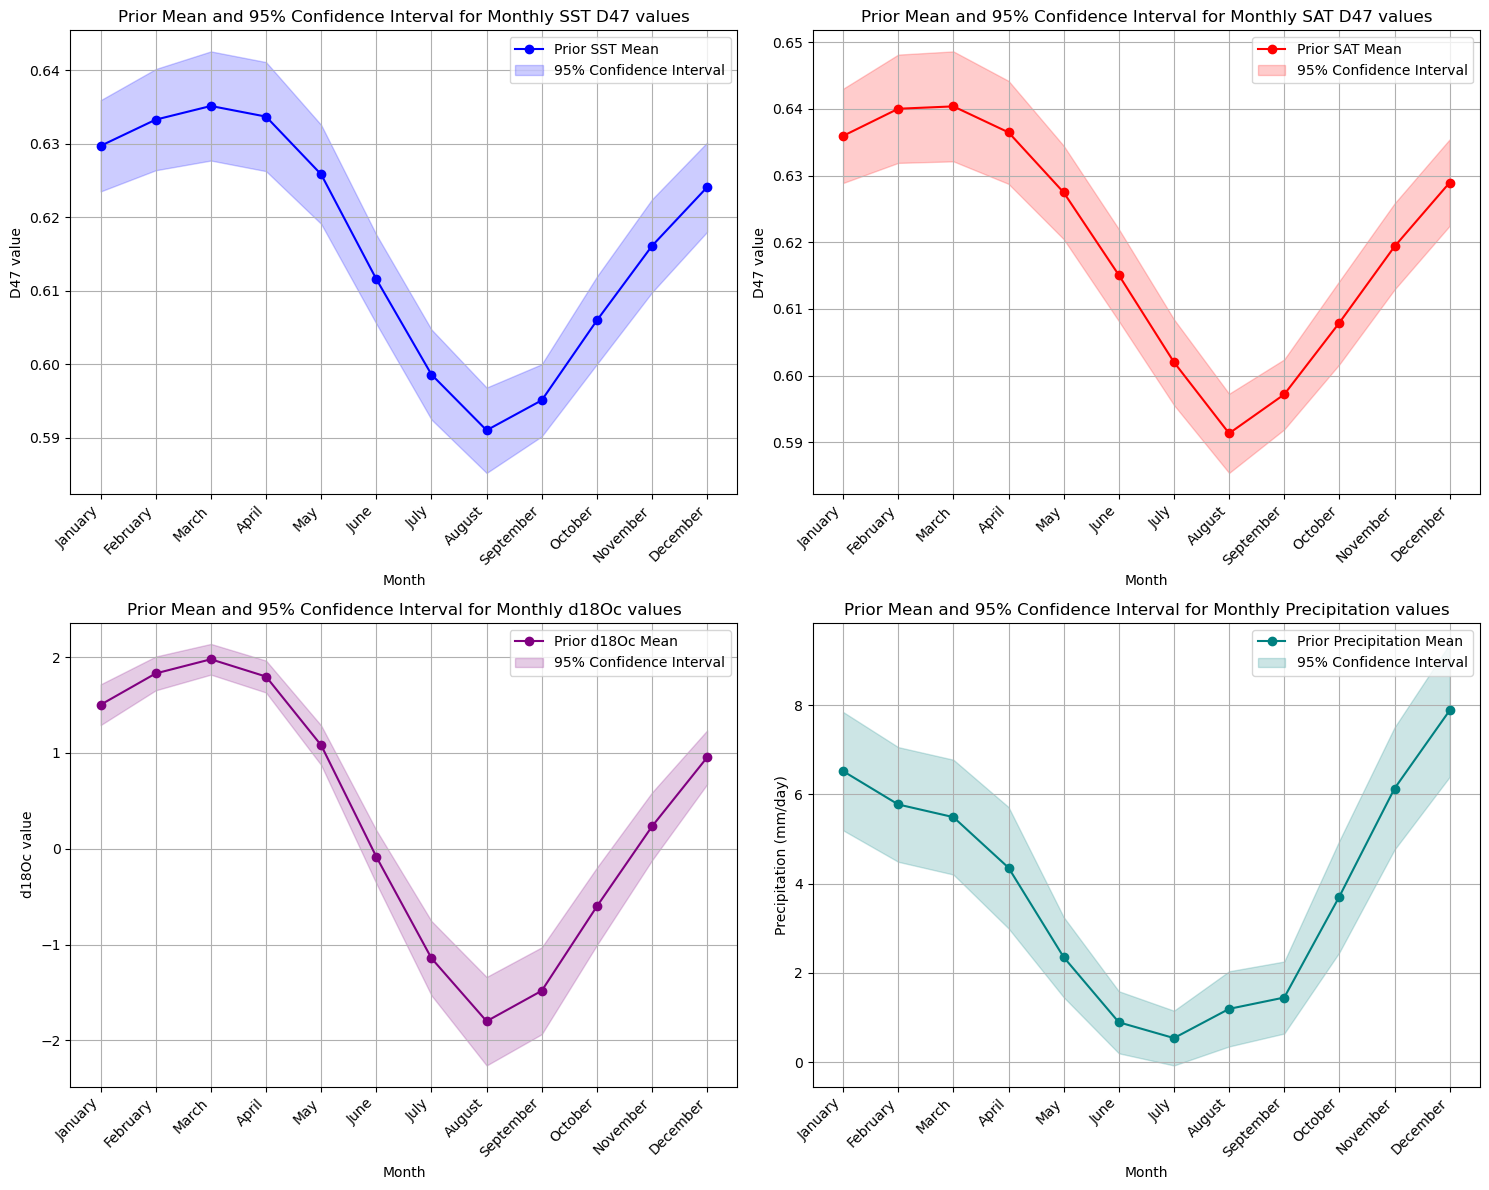

In [13]:
# Plot monthly prior distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Adjust the figure to have 2x2 grid

# Plot the prior distribution for SST
axes[0, 0].plot(months_scale, mu_prior_SST_D47_monthly, label='Prior SST Mean', color='b', marker='o')
axes[0, 0].fill_between(months_scale,
                        mu_prior_SST_D47_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly / np.sqrt(n_models_monthly),
                        mu_prior_SST_D47_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly / np.sqrt(n_models_monthly),
                        color='b', alpha=0.2, label='95% Confidence Interval')
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 0].set_title('Prior Mean and 95% Confidence Interval for Monthly SST D47 values')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('D47 value')
axes[0, 0].legend()
axes[0, 0].grid(True)

# Plot the prior distribution for SAT
axes[0, 1].plot(months_scale, mu_prior_SAT_D47_monthly, label='Prior SAT Mean', color='r', marker='o')
axes[0, 1].fill_between(months_scale,
                        mu_prior_SAT_D47_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_D47_monthly / np.sqrt(n_models_monthly),
                        mu_prior_SAT_D47_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_D47_monthly / np.sqrt(n_models_monthly),
                        color='r', alpha=0.2, label='95% Confidence Interval')
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[0, 1].set_title('Prior Mean and 95% Confidence Interval for Monthly SAT D47 values')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('D47 value')
axes[0, 1].legend()
axes[0, 1].grid(True)

# Plot the prior distribution for d18Oc
axes[1, 0].plot(months_scale, mu_prior_d18Oc_monthly, label='Prior d18Oc Mean', color='purple', marker='o')
axes[1, 0].fill_between(months_scale,
                        mu_prior_d18Oc_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_monthly / np.sqrt(n_models_monthly),
                        mu_prior_d18Oc_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_monthly / np.sqrt(n_models_monthly),
                        color='purple', alpha=0.2, label='95% Confidence Interval')
axes[1, 0].set_xticks(months_scale)
axes[1, 0].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 0].set_title('Prior Mean and 95% Confidence Interval for Monthly d18Oc values')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('d18Oc value')
axes[1, 0].legend()
axes[1, 0].grid(True)

# Plot the prior distribution for precipitation
axes[1, 1].plot(months_scale, mu_prior_precip_monthly, label='Prior Precipitation Mean', color='teal', marker='o')
axes[1, 1].fill_between(months_scale,
                        mu_prior_precip_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
                        mu_prior_precip_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
                        color='teal', alpha=0.2, label='95% Confidence Interval')
axes[1, 1].set_xticks(months_scale)
axes[1, 1].set_xticklabels(month_names, rotation=45, ha="right")
axes[1, 1].set_title('Prior Mean and 95% Confidence Interval for Monthly Precipitation values')
axes[1, 1].set_xlabel('Month')
axes[1, 1].set_ylabel('Precipitation (mm/day)')
axes[1, 1].legend()
axes[1, 1].grid(True)

# Update the layout and show the plot
plt.tight_layout()
plt.show()

## Calculate the monthly covariance matrix for D47 values of SST and SAT, d18Oc and precipitation

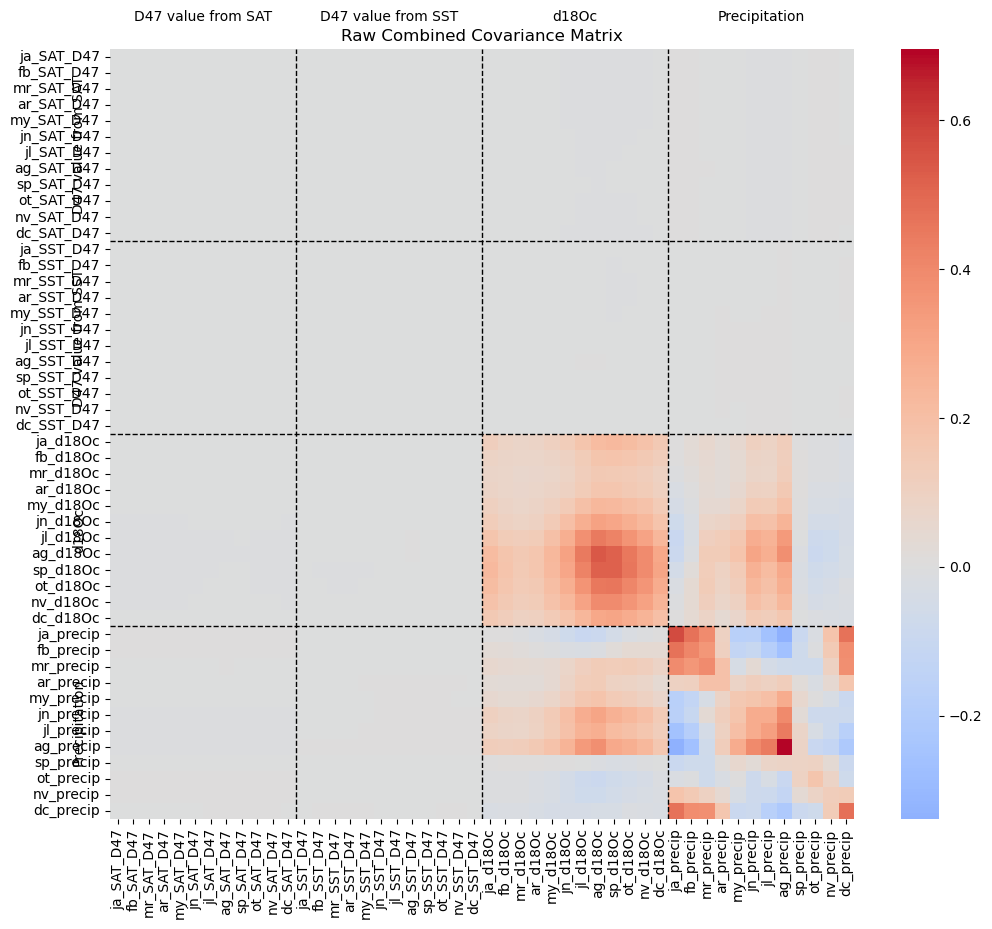

In [14]:
# Define column names for SAT, SST, d18Oc, and precipitation
SAT_D47_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_columns_monthly = [f"{month}_precip" for month in months]

# Extract the relevant columns for SAT, SST D47, d18Oc, and precipitation
SAT_D47_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_columns_monthly = [f"{month}_precip" for month in months]

# Combine the relevant columns into a single dataframe
combined_data_monthly = Campanian_models[SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly]

# Calculate the covariance matrix for the combined data
cov_combined_monthly = np.cov(combined_data_monthly.dropna(), rowvar=False)

# Plot the heatmap of the raw combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    cov_combined_monthly,  # Use the raw covariance matrix
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly,
    yticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) + len(precip_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-2, len(SAT_D47_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-2, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) + len(precip_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Raw Combined Covariance Matrix")
plt.show()

## Plot normalized monthly covariance matrix between D47 values of SST and SAT, d18Oc and precipitation

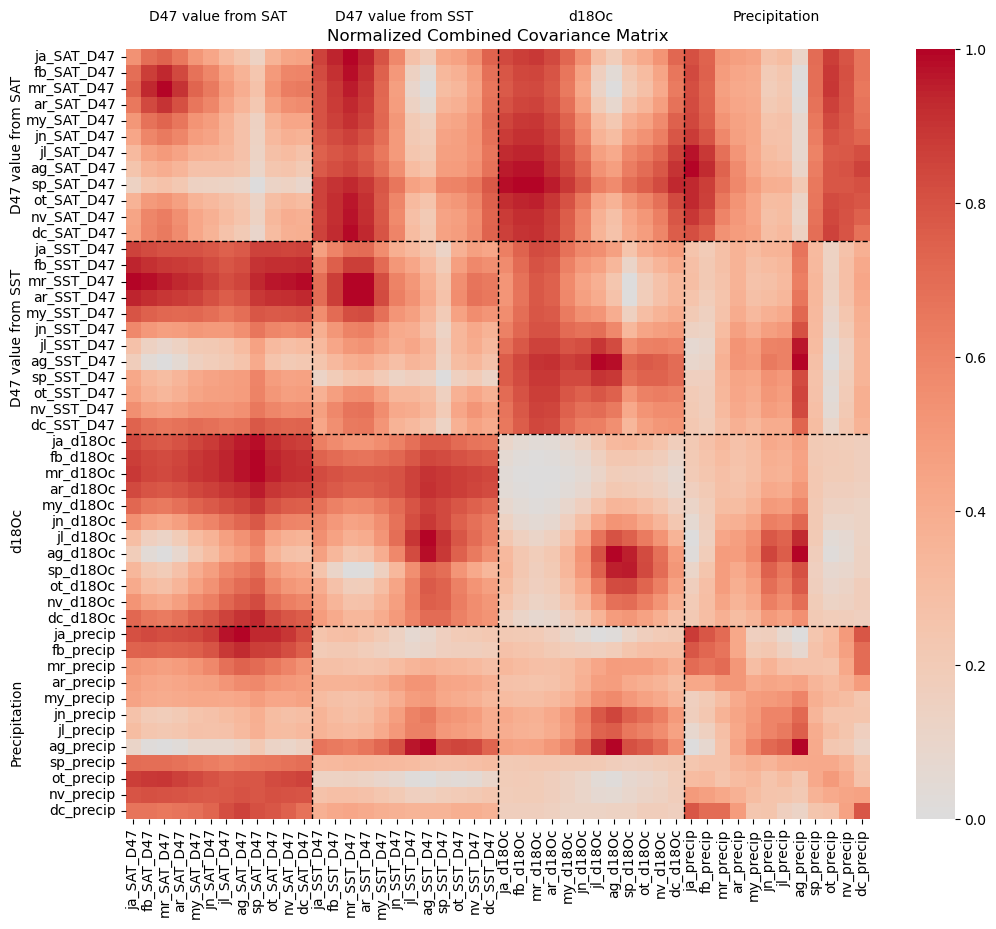

In [15]:
# Normalize each submatrix independently for better visualization
def normalize_matrix(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    return (matrix - min_val) / (max_val - min_val)

# Extract the relevant columns for SAT, SST D47, d18Oc, and precipitation
SAT_D47_columns_monthly = [f"{month}_SAT_D47" for month in months]
SST_D47_columns_monthly = [f"{month}_SST_D47" for month in months]
d18Oc_columns_monthly = [f"{month}_d18Oc" for month in months]
precip_columns_monthly = [f"{month}_precip" for month in months]

# Combine the relevant columns into a single dataframe
combined_data_monthly = Campanian_models[SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly]

# Calculate the covariance matrix for the combined data
cov_combined_monthly = np.cov(combined_data_monthly.dropna(), rowvar=False)

# Extract the covariance matrices for SAT D47, SST D47, d18Oc, and precipitation
cov_SAT_D47_monthly = cov_combined_monthly[:len(months), :len(months)]
cov_SST_D47_monthly = cov_combined_monthly[len(months):2*len(months), len(months):2*len(months)]
cov_d18Oc_monthly = cov_combined_monthly[2*len(months):3*len(months), 2*len(months):3*len(months)]
cov_precip_monthly = cov_combined_monthly[3*len(months):, 3*len(months):]

# Extract the cross-covariance matrices
cross_cov_SAT_SST_D47_monthly = cov_combined_monthly[:len(months), len(months):2*len(months)]
cross_cov_SAT_d18Oc_monthly = cov_combined_monthly[:len(months), 2*len(months):3*len(months)]
cross_cov_SAT_precip_monthly = cov_combined_monthly[:len(months), 3*len(months):]
cross_cov_SST_d18Oc_monthly = cov_combined_monthly[len(months):2*len(months), 2*len(months):3*len(months)]
cross_cov_SST_precip_monthly = cov_combined_monthly[len(months):2*len(months), 3*len(months):]
cross_cov_d18Oc_precip_monthly = cov_combined_monthly[2*len(months):3*len(months), 3*len(months):]

# Normalize each submatrix
normalized_cov_SAT_D47_monthly = normalize_matrix(cov_SAT_D47_monthly)
normalized_cov_SST_D47_monthly = normalize_matrix(cov_SST_D47_monthly)
normalized_cov_d18Oc_monthly = normalize_matrix(cov_d18Oc_monthly)
normalized_cov_precip_monthly = normalize_matrix(cov_precip_monthly)

# Normalize each cross-covariance matrix
normalized_cross_cov_SAT_SST_D47_monthly = normalize_matrix(cross_cov_SAT_SST_D47_monthly)
normalized_cross_cov_SAT_d18Oc_monthly = normalize_matrix(cross_cov_SAT_d18Oc_monthly)
normalized_cross_cov_SAT_precip_monthly = normalize_matrix(cross_cov_SAT_precip_monthly)
normalized_cross_cov_SST_d18Oc_monthly = normalize_matrix(cross_cov_SST_d18Oc_monthly)
normalized_cross_cov_SST_precip_monthly = normalize_matrix(cross_cov_SST_precip_monthly)
normalized_cross_cov_d18Oc_precip_monthly = normalize_matrix(cross_cov_d18Oc_precip_monthly)

# Combine the normalized submatrices into a single normalized covariance matrix
normalized_cov_combined_monthly = np.block([
    [normalized_cov_SAT_D47_monthly, normalized_cross_cov_SAT_SST_D47_monthly, normalized_cross_cov_SAT_d18Oc_monthly, normalized_cross_cov_SAT_precip_monthly],
    [normalized_cross_cov_SAT_SST_D47_monthly.T, normalized_cov_SST_D47_monthly, normalized_cross_cov_SST_d18Oc_monthly, normalized_cross_cov_SST_precip_monthly],
    [normalized_cross_cov_SAT_d18Oc_monthly.T, normalized_cross_cov_SST_d18Oc_monthly.T, normalized_cov_d18Oc_monthly, normalized_cross_cov_d18Oc_precip_monthly],
    [normalized_cross_cov_SAT_precip_monthly.T, normalized_cross_cov_SST_precip_monthly.T, normalized_cross_cov_d18Oc_precip_monthly.T, normalized_cov_precip_monthly]
])

# Plot the heatmap of the normalized combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    normalized_cov_combined_monthly,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly,
    yticklabels=SAT_D47_columns_monthly + SST_D47_columns_monthly + d18Oc_columns_monthly + precip_columns_monthly
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_columns_monthly) / 2, -2, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, -2, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) + len(precip_columns_monthly) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-7, len(SAT_D47_columns_monthly) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-7, len(SAT_D47_columns_monthly) + len(SST_D47_columns_monthly) + len(d18Oc_columns_monthly) + len(precip_columns_monthly) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Normalized Combined Covariance Matrix")
plt.show()

## Create combined monthly state vector in D47 and d18Oc domain

In [16]:
# Combine the prior means of D47 and SAT into a single state vector
mu_prior_monthly_combined = np.concatenate((mu_prior_SST_D47_monthly, mu_prior_SAT_D47_monthly, mu_prior_d18Oc_monthly, mu_prior_precip_monthly))

# Combine the covariance matrices of D47 values of SST and SAT, including the cross-covariance
cov_prior_monthly_combined = cov_combined_monthly.copy()

# PRIOR - SEASONAL

In [17]:
print(Campanian_models.columns.tolist())

['Cell', 'ja_SST', 'fb_SST', 'mr_SST', 'ar_SST', 'my_SST', 'jn_SST', 'jl_SST', 'ag_SST', 'sp_SST', 'ot_SST', 'nv_SST', 'dc_SST', 'ja_SSS', 'fb_SSS', 'mr_SSS', 'ar_SSS', 'my_SSS', 'jn_SSS', 'jl_SSS', 'ag_SSS', 'sp_SSS', 'ot_SSS', 'nv_SSS', 'dc_SSS', 'ja_SAT', 'fb_SAT', 'mr_SAT', 'ar_SAT', 'my_SAT', 'jn_SAT', 'jl_SAT', 'ag_SAT', 'sp_SAT', 'ot_SAT', 'nv_SAT', 'dc_SAT', 'ja_SAT_SD', 'fb_SAT_SD', 'mr_SAT_SD', 'ar_SAT_SD', 'my_SAT_SD', 'jn_SAT_SD', 'jl_SAT_SD', 'ag_SAT_SD', 'sp_SAT_SD', 'ot_SAT_SD', 'nv_SAT_SD', 'dc_SAT_SD', 'ja_precip', 'fb_precip', 'mr_precip', 'ar_precip', 'my_precip', 'jn_precip', 'jl_precip', 'ag_precip', 'sp_precip', 'ot_precip', 'nv_precip', 'dc_precip', 'ja_precip_SD', 'fb_precip_SD', 'mr_precip_SD', 'ar_precip_SD', 'my_precip_SD', 'jn_precip_SD', 'jl_precip_SD', 'ag_precip_SD', 'sp_precip_SD', 'ot_precip_SD', 'nv_precip_SD', 'dc_precip_SD', 'ja_SST_D47', 'ja_SST_D47_SE', 'fb_SST_D47', 'fb_SST_D47_SE', 'mr_SST_D47', 'mr_SST_D47_SE', 'ar_SST_D47', 'ar_SST_D47_SE', 'my

## Seasonal model data (convert the model data to seasonal means)

In [18]:
# Define the seasons
seasons = {
    "winter": ["dc", "ja", "fb"],
    "spring": ["mr", "ar", "my"],
    "summer": ["jn", "jl", "ag"],
    "autumn": ["sp", "ot", "nv"],
}

# Stack monthly columns to create seasonal dataframes
# Initialize dictionaries to store seasonal data
Campanian_models_seasonal_dict = {}

# Identify the columns to process (all except the modelname column)
columns_to_process = [col for col in Campanian_models.columns if any(suffix in col for suffix in [
    '_SST', '_SAT', 'SAT_SD', '_SST_D47', '_SST_D47_SE', '_SAT_D47', '_SAT_D47_SE',
    '_SSS', '_d18Oc', '_precip', 'precip_SD'
])]

# Process each season
for season, months in seasons.items():  # Iterate over the seasons and corresponding months
    for col in columns_to_process:  # Iterate over the columns to process
        base_col_name = col.split('_')[0]  # Extract the base column name
        suffix = '_'.join(col.split('_')[1:])  # Extract the suffix
        if base_col_name in months:  # Check if the column corresponds to the current season
            season_col_name = f"{season}_{suffix}"  # Create the new column name
            if season_col_name not in Campanian_models_seasonal_dict:  # Check if the new column name already exists in the seasonal data
                Campanian_models_seasonal_dict[season_col_name] = []  # If not, initialize a new column in the seasonal data means
            Campanian_models_seasonal_dict[season_col_name].append(Campanian_models[col])

# Combine the seasonal data into a single dataframe
Campanian_models_seasonal = pd.DataFrame()
for season_col_name, data in Campanian_models_seasonal_dict.items():
    # Concatenate the data for each season and reshape it properly
    concatenated_data = pd.concat(data, axis=0).reset_index(drop=True)
    Campanian_models_seasonal[season_col_name] = concatenated_data

# Add model names
Campanian_models_seasonal["Cell"] = np.tile(Campanian_models["Cell"].values, 3)  # Repeat the model names for each season

# Display the new seasonal DataFrame
D47_columns_seasonal = [col for col in Campanian_models_seasonal.columns if col.endswith('_D47')]
D47_se_columns_seasonal = [col for col in Campanian_models_seasonal.columns if '_D47_SE' in col]
SSS_columns_seasonal = [col for col in Campanian_models_seasonal.columns if col.endswith('_SSS')]
d18Oc_columns_seasonal = [col for col in Campanian_models_seasonal.columns if col.endswith('_d18Oc')]
precip_columns_seasonal = [col for col in Campanian_models_seasonal.columns if col.endswith('_precip')]

print("Seasonal D47 values for all SST model outcomes:\n", Campanian_models_seasonal[D47_columns_seasonal].head())
print("Calibration standard errors for all SST model outcomes:\n", Campanian_models_seasonal[D47_se_columns_seasonal].head())
print("Seasonal SSS values for all model outcomes:\n", Campanian_models_seasonal[SSS_columns_seasonal].head())
print("Seasonal d18Oc values for all model outcomes:\n", Campanian_models_seasonal[d18Oc_columns_seasonal].head())
print("Seasonal precipitation values for all model outcomes:\n", Campanian_models_seasonal[precip_columns_seasonal].head())

Seasonal D47 values for all SST model outcomes:
    winter_SST_D47  winter_SAT_D47  spring_SST_D47  spring_SAT_D47  \
0        0.619550        0.650319        0.622921        0.657647   
1        0.630147        0.649293        0.637364        0.655613   
2        0.637439        0.647369        0.647583        0.651893   
3        0.642863        0.643738        0.651422        0.650939   
4        0.616422        0.640987        0.619173        0.647097   

   summer_SST_D47  summer_SAT_D47  autumn_SST_D47  autumn_SAT_D47  
0        0.596319        0.626284        0.583892        0.602748  
1        0.609737        0.626504        0.590006        0.609208  
2        0.617836        0.620234        0.595879        0.605974  
3        0.623043        0.621426        0.601310        0.597621  
4        0.597878        0.620572        0.585939        0.602018  
Calibration standard errors for all SST model outcomes:
    winter_SST_D47_SE  winter_SAT_D47_SE  spring_SST_D47_SE  spring_SAT_

## Calculate the seasonal prior for model SST, SAT, SSS and precipitation with propagated uncertainty

In [19]:
# Prior estimates from climate models (weighted mean if SDs available, else normal mean)

# SAT: weighted mean and covariance with measurement variances on diagonal
if all(f"{season}_SAT_SD" in Campanian_models_seasonal.columns for season in seasons):
    prior_weights_SAT_seasonal = 1 / Campanian_models_seasonal[[f"{season}_SAT_SD" for season in seasons]] ** 2
    prior_weights_SAT_seasonal.columns = [col.replace('_SAT_SD', '_SAT') for col in prior_weights_SAT_seasonal.columns]
    mu_prior_SAT_seasonal = np.array(
        (Campanian_models_seasonal[[f"{season}_SAT" for season in seasons]] * prior_weights_SAT_seasonal).sum(axis=0, skipna=True) /
        prior_weights_SAT_seasonal.sum(axis=0, skipna=True)
    )
    prior_cov_raw_SAT_seasonal = np.cov(Campanian_models_seasonal[[f"{season}_SAT" for season in seasons]].dropna(), rowvar=False)
    prior_measurement_variances_SAT_seasonal = (Campanian_models_seasonal[[f"{season}_SAT_SD" for season in seasons]] ** 2).mean(axis=0, skipna=True)
    cov_prior_SAT_seasonal = prior_cov_raw_SAT_seasonal.copy()
    np.fill_diagonal(cov_prior_SAT_seasonal, np.diagonal(prior_cov_raw_SAT_seasonal) + prior_measurement_variances_SAT_seasonal)
else:
    mu_prior_SAT_seasonal = np.array(Campanian_models_seasonal[[f"{season}_SAT" for season in seasons]].mean(axis=0, skipna=True))
    cov_prior_SAT_seasonal = np.cov(Campanian_models_seasonal[[f"{season}_SAT" for season in seasons]].dropna(), rowvar=False)

# SST: normal mean and covariance (no SDs available)
mu_prior_SST_seasonal = np.array(Campanian_models_seasonal[[f"{season}_SST" for season in seasons]].mean(axis=0, skipna=True))
cov_prior_SST_seasonal = np.cov(Campanian_models_seasonal[[f"{season}_SST" for season in seasons]].dropna(), rowvar=False)

# SSS: normal mean and covariance (no SDs available)
mu_prior_SSS_seasonal = np.array(Campanian_models_seasonal[[f"{season}_SSS" for season in seasons]].mean(axis=0, skipna=True))
cov_prior_SSS_seasonal = np.cov(Campanian_models_seasonal[[f"{season}_SSS" for season in seasons]].dropna(), rowvar=False)

# Precip: weighted mean and covariance with measurement variances on diagonal
if all(f"{season}_precip_SD" in Campanian_models_seasonal.columns for season in seasons):
    prior_weights_precip_seasonal = 1 / Campanian_models_seasonal[[f"{season}_precip_SD" for season in seasons]] ** 2
    prior_weights_precip_seasonal.columns = [col.replace('_precip_SD', '_precip') for col in prior_weights_precip_seasonal.columns]
    mu_prior_precip_seasonal = np.array(
        (Campanian_models_seasonal[[f"{season}_precip" for season in seasons]] * prior_weights_precip_seasonal).sum(axis=0, skipna=True) /
        prior_weights_precip_seasonal.sum(axis=0, skipna=True)
    )
    prior_cov_raw_precip_seasonal = np.cov(Campanian_models_seasonal[[f"{season}_precip" for season in seasons]].dropna(), rowvar=False)
    prior_measurement_variances_precip_seasonal = (Campanian_models_seasonal[[f"{season}_precip_SD" for season in seasons]] ** 2).mean(axis=0, skipna=True)
    cov_prior_precip_seasonal = prior_cov_raw_precip_seasonal.copy()
    np.fill_diagonal(cov_prior_precip_seasonal, np.diagonal(prior_cov_raw_precip_seasonal) + prior_measurement_variances_precip_seasonal)
else:
    mu_prior_precip_seasonal = np.array(Campanian_models_seasonal[[f"{season}_precip" for season in seasons]].mean(axis=0, skipna=True))
    cov_prior_precip_seasonal = np.cov(Campanian_models_seasonal[[f"{season}_precip" for season in seasons]].dropna(), rowvar=False)

# Store copy of original prior means to keep when later updating the prior
mu_prior_SAT_seasonal_original, cov_prior_SAT_seasonal_original = mu_prior_SAT_seasonal.copy(), cov_prior_SAT_seasonal.copy()
mu_prior_SST_seasonal_original, cov_prior_SST_seasonal_original = mu_prior_SST_seasonal.copy(), cov_prior_SST_seasonal.copy()
mu_prior_SSS_seasonal_original, cov_prior_SSS_seasonal_original = mu_prior_SSS_seasonal.copy(), cov_prior_SSS_seasonal.copy()
mu_prior_precip_seasonal_original, cov_prior_precip_seasonal_original = mu_prior_precip_seasonal.copy(), cov_prior_precip_seasonal.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_SAT_seasonal = np.sqrt(np.diag(cov_prior_SAT_seasonal))
std_prior_SST_seasonal = np.sqrt(np.diag(cov_prior_SST_seasonal))
std_prior_SSS_seasonal = np.sqrt(np.diag(cov_prior_SSS_seasonal))
std_prior_precip_seasonal = np.sqrt(np.diag(cov_prior_precip_seasonal))

# Print the results
print("SAT Seasonal Means:", mu_prior_SAT_seasonal)
print("SAT Seasonal Std Devs:", std_prior_SAT_seasonal)
print("SST Seasonal Means:", mu_prior_SST_seasonal)
print("SST Seasonal Std Devs:", std_prior_SST_seasonal)
print("SSS Seasonal Means:", mu_prior_SSS_seasonal)
print("SSS Seasonal Std Devs:", std_prior_SSS_seasonal)
print("Precipitation Seasonal Means:", mu_prior_precip_seasonal)
print("Precipitation Seasonal Std Devs:", std_prior_precip_seasonal)

SAT Seasonal Means: [12.25598698 12.05388635 22.47646455 19.89369155]
SAT Seasonal Std Devs: [3.51432725 3.80598499 4.30980941 4.11385979]
SST Seasonal Means: [13.62482045 12.81522806 22.6627266  20.91970128]
SST Seasonal Std Devs: [3.12424727 3.47985198 4.11939883 3.97990958]
SSS Seasonal Means: [34.27561181 34.28522794 32.98269615 32.94747229]
SSS Seasonal Std Devs: [3.09762627 3.08191841 3.27376733 3.5809339 ]
Precipitation Seasonal Means: [6.6192255  3.57997838 0.63595899 2.79619909]
Precipitation Seasonal Std Devs: [2.35519916 2.32178783 1.17755429 2.67051254]


## Plot the seasonal prior for model SST, SAT, SSS and precipitation

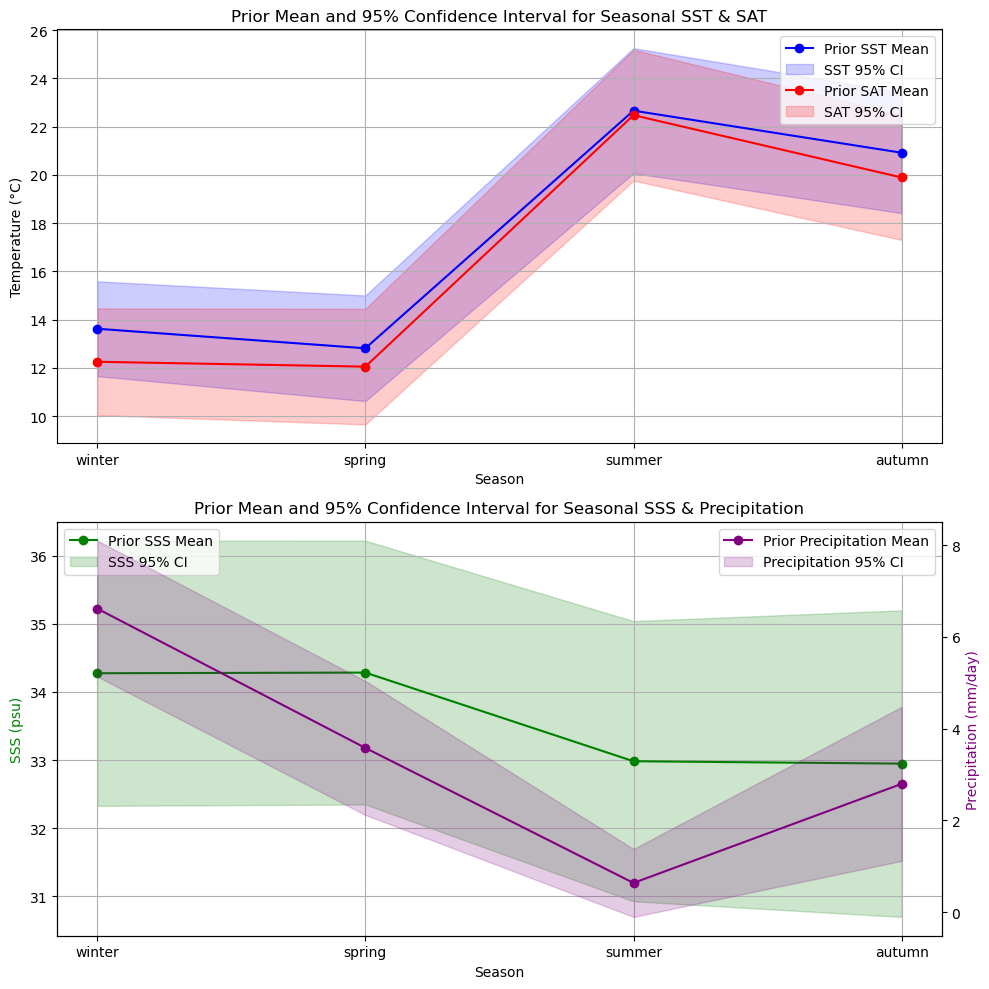

In [20]:
# Define the seasons, number of models, and scale for the x-axis
seasons = ["winter", "spring", "summer", "autumn"]
n_models_seasonal = len(Campanian_models["Cell"])  # Find the total number of cells
seasons_scale = np.arange(len(seasons)) + 1  # Create seasonal scale

# Create a 1x2 plotting grid
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Panel 1: Plot the prior distribution for SST and SAT
axes[0].plot(seasons_scale, mu_prior_SST_seasonal, label='Prior SST Mean', marker='o', color='b')
axes[0].fill_between(
    seasons_scale,
    mu_prior_SST_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SST_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='b', label='SST 95% CI'
)
axes[0].plot(seasons_scale, mu_prior_SAT_seasonal, label='Prior SAT Mean', marker='o', color='r')
axes[0].fill_between(
    seasons_scale,
    mu_prior_SAT_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SAT_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='r', label='SAT 95% CI'
)
axes[0].set_title('Prior Mean and 95% Confidence Interval for Seasonal SST & SAT')
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_xticks(seasons_scale)
axes[0].set_xticklabels(seasons)
axes[0].legend()
axes[0].grid(True)

# Panel 2: Plot the prior distribution for SSS and precipitation
axes[1].plot(seasons_scale, mu_prior_SSS_seasonal, label='Prior SSS Mean', marker='o', color='g')
ax2 = axes[1].twinx()  # Create a secondary y-axis for precipitation
ax2.plot(seasons_scale, mu_prior_precip_seasonal, label='Prior Precipitation Mean', marker='o', color='purple')

# Add 95% confidence intervals for SSS
axes[1].fill_between(
    seasons_scale,
    mu_prior_SSS_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SSS_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='g', label='SSS 95% CI'
)

# Add 95% confidence intervals for precipitation
ax2.fill_between(
    seasons_scale,
    mu_prior_precip_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_precip_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='purple', label='Precipitation 95% CI'
)

axes[1].set_title('Prior Mean and 95% Confidence Interval for Seasonal SSS & Precipitation')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('SSS (psu)', color='g')
ax2.set_ylabel('Precipitation (mm/day)', color='purple')
axes[1].set_xticks(seasons_scale)
axes[1].set_xticklabels(seasons)
axes[1].legend(loc='upper left')
ax2.legend(loc='upper right')
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Calculate the seasonal prior for model SST- and SAT-derived D47 values and SSS-derived seawater oxygen isotope values with propagated uncertainty

In [21]:
# Set the weights of the data based on the standard errors
weights_seasonal_SST_D47 = 1 / Campanian_models_seasonal[[f"{season}_SST_D47_SE" for season in seasons]] ** 2
weights_seasonal_SAT_D47 = 1 / Campanian_models_seasonal[[f"{season}_SAT_D47_SE" for season in seasons]] ** 2

# Change the column suffixes from "_D47_SE" to "_D47" in weights_seasonal to match the headers of the D47 matrix later for multiplication
weights_seasonal_SST_D47.columns = [col.replace('_SST_D47_SE', '_SST_D47') for col in weights_seasonal_SST_D47.columns]
weights_seasonal_SAT_D47.columns = [col.replace('_SAT_D47_SE', '_SAT_D47') for col in weights_seasonal_SAT_D47.columns]

# Prior D47 estimates from climate models (weighted mean)
mu_prior_SST_D47_seasonal = np.array((Campanian_models_seasonal[[f"{season}_SST_D47" for season in seasons]] * weights_seasonal_SST_D47).sum(axis = 0, skipna = True) / weights_seasonal_SST_D47.sum(axis = 0, skipna = True)) # Calculate weighted seasonal mean D47 values and convert to numpy array
mu_prior_SAT_D47_seasonal = np.array((Campanian_models_seasonal[[f"{season}_SAT_D47" for season in seasons]] * weights_seasonal_SAT_D47).sum(axis = 0, skipna = True) / weights_seasonal_SAT_D47.sum(axis = 0, skipna = True)) # Calculate weighted seasonal mean D47 values and convert to numpy array

# Calculate simple (unweighted) mean for monthly d18Oc values
mu_prior_d18Oc_seasonal = np.array(Campanian_models_seasonal[[f"{season}_d18Oc" for season in seasons]].mean(axis=0, skipna=True))
mu_prior_precip_seasonal = np.array(Campanian_models_seasonal[[f"{season}_precip" for season in seasons]].mean(axis=0, skipna=True))

# Decompose variance within and between model outcomes
model_variances_SST_D47 = Campanian_models_seasonal[[f"{season}_SST_D47" for season in seasons]].var(axis = 0, ddof = 1)  # Compute variance across models
model_variances_SAT_D47 = Campanian_models_seasonal[[f"{season}_SAT_D47" for season in seasons]].var(axis = 0, ddof = 1)  # Compute variance across models
measurement_variances_SST_D47 = (Campanian_models_seasonal[[f"{season}_SST_D47_SE" for season in seasons]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements
measurement_variances_SAT_D47 = (Campanian_models_seasonal[[f"{season}_SAT_D47_SE" for season in seasons]] ** 2).mean(axis = 0, skipna = True)  # Compute variance on measurements

# Covariance between seasons in prior D47 estimates from climate models (weighted covariance matrix)
cov_raw_seasonal_SST_D47 = np.cov(Campanian_models_seasonal[[f"{season}_SST_D47" for season in seasons]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_seasonal_SAT_D47 = np.cov(Campanian_models_seasonal[[f"{season}_SAT_D47" for season in seasons]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_seasonal_d18Oc = np.cov(Campanian_models_seasonal[[f"{season}_d18Oc" for season in seasons]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_raw_seasonal_precip = np.cov(Campanian_models_seasonal[[f"{season}_precip" for season in seasons]].dropna(), rowvar = False)  # Compute the covariance matrix for the raw data (without measurement uncertainty)
cov_prior_SST_D47_seasonal = cov_raw_seasonal_SST_D47.copy()  # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_SAT_D47_seasonal = cov_raw_seasonal_SAT_D47.copy()  # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_d18Oc_seasonal = cov_raw_seasonal_d18Oc.copy()  # Copy covariance matrix to add uncertainty coming from the measurements
cov_prior_precip_seasonal = cov_raw_seasonal_precip.copy()  # Copy covariance matrix to add uncertainty coming from the measurements
np.fill_diagonal(cov_prior_SST_D47_seasonal, np.diagonal(cov_raw_seasonal_SST_D47) + measurement_variances_SST_D47)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)
np.fill_diagonal(cov_prior_SAT_D47_seasonal, np.diagonal(cov_raw_seasonal_SAT_D47) + measurement_variances_SAT_D47)  # Add diagonal terms for measurement uncertainties (which have no covariance between models)

# Store copy of original prior means to keep when later updating the prior
mu_prior_SST_D47_seasonal_original, cov_prior_SST_D47_seasonal_original = mu_prior_SST_D47_seasonal.copy(), cov_prior_SST_D47_seasonal.copy()
mu_prior_SAT_D47_seasonal_original, cov_prior_SAT_D47_seasonal_original = mu_prior_SAT_D47_seasonal.copy(), cov_prior_SAT_D47_seasonal.copy()
mu_prior_d18Oc_seasonal_original, cov_prior_d18Oc_seasonal_original = mu_prior_d18Oc_seasonal.copy(), cov_raw_seasonal_d18Oc.copy()
mu_prior_precip_seasonal_original, cov_prior_precip_seasonal_original = mu_prior_precip_seasonal.copy(), cov_raw_seasonal_precip.copy()

# Extract the standard deviations (uncertainty) from the covariance matrix
std_prior_SST_D47_seasonal = np.sqrt(np.diag(cov_prior_SST_D47_seasonal))
std_prior_SAT_D47_seasonal = np.sqrt(np.diag(cov_prior_SAT_D47_seasonal))
std_prior_d18Oc_seasonal = np.sqrt(np.diag(cov_prior_d18Oc_seasonal))
std_prior_precip_seasonal = np.sqrt(np.diag(cov_prior_precip_seasonal))

print("mu_prior_SST_D47_seasonal:", mu_prior_SST_D47_seasonal)
print("std_prior_SST_D47_seasonal:", std_prior_SST_D47_seasonal)
print("mu_prior_SAT_D47_seasonal:", mu_prior_SAT_D47_seasonal)
print("std_prior_SAT_D47_seasonal:", std_prior_SAT_D47_seasonal)
print("mu_prior_d18Oc_seasonal:", mu_prior_d18Oc_seasonal)
print("std_prior_d18Oc_seasonal:", std_prior_d18Oc_seasonal)
print("mu_prior_precip_seasonal:", mu_prior_precip_seasonal)
print("std_prior_precip_seasonal:", std_prior_precip_seasonal)

mu_prior_SST_D47_seasonal: [0.62890998 0.63140503 0.60002437 0.6052713 ]
std_prior_SST_D47_seasonal: [0.01066062 0.01193445 0.0127614  0.01261045]
mu_prior_SAT_D47_seasonal: [0.63399392 0.63447007 0.60043266 0.60837143]
std_prior_SAT_D47_seasonal: [0.01222277 0.01317381 0.01346886 0.01312557]
mu_prior_d18Oc_seasonal: [ 1.42870186  1.61787871 -1.00802388 -0.61605648]
std_prior_d18Oc_seasonal: [0.50729212 0.48030406 0.92942923 0.94686217]
mu_prior_precip_seasonal: [6.81051779 4.18815381 1.2707311  3.83679455]
std_prior_precip_seasonal: [1.1318851  1.41331778 0.70562424 1.95048889]


## Plot the seasonal prior for model SST- and SAT-derived D47 values, d18Oc values and precipitation with propagated uncertainty

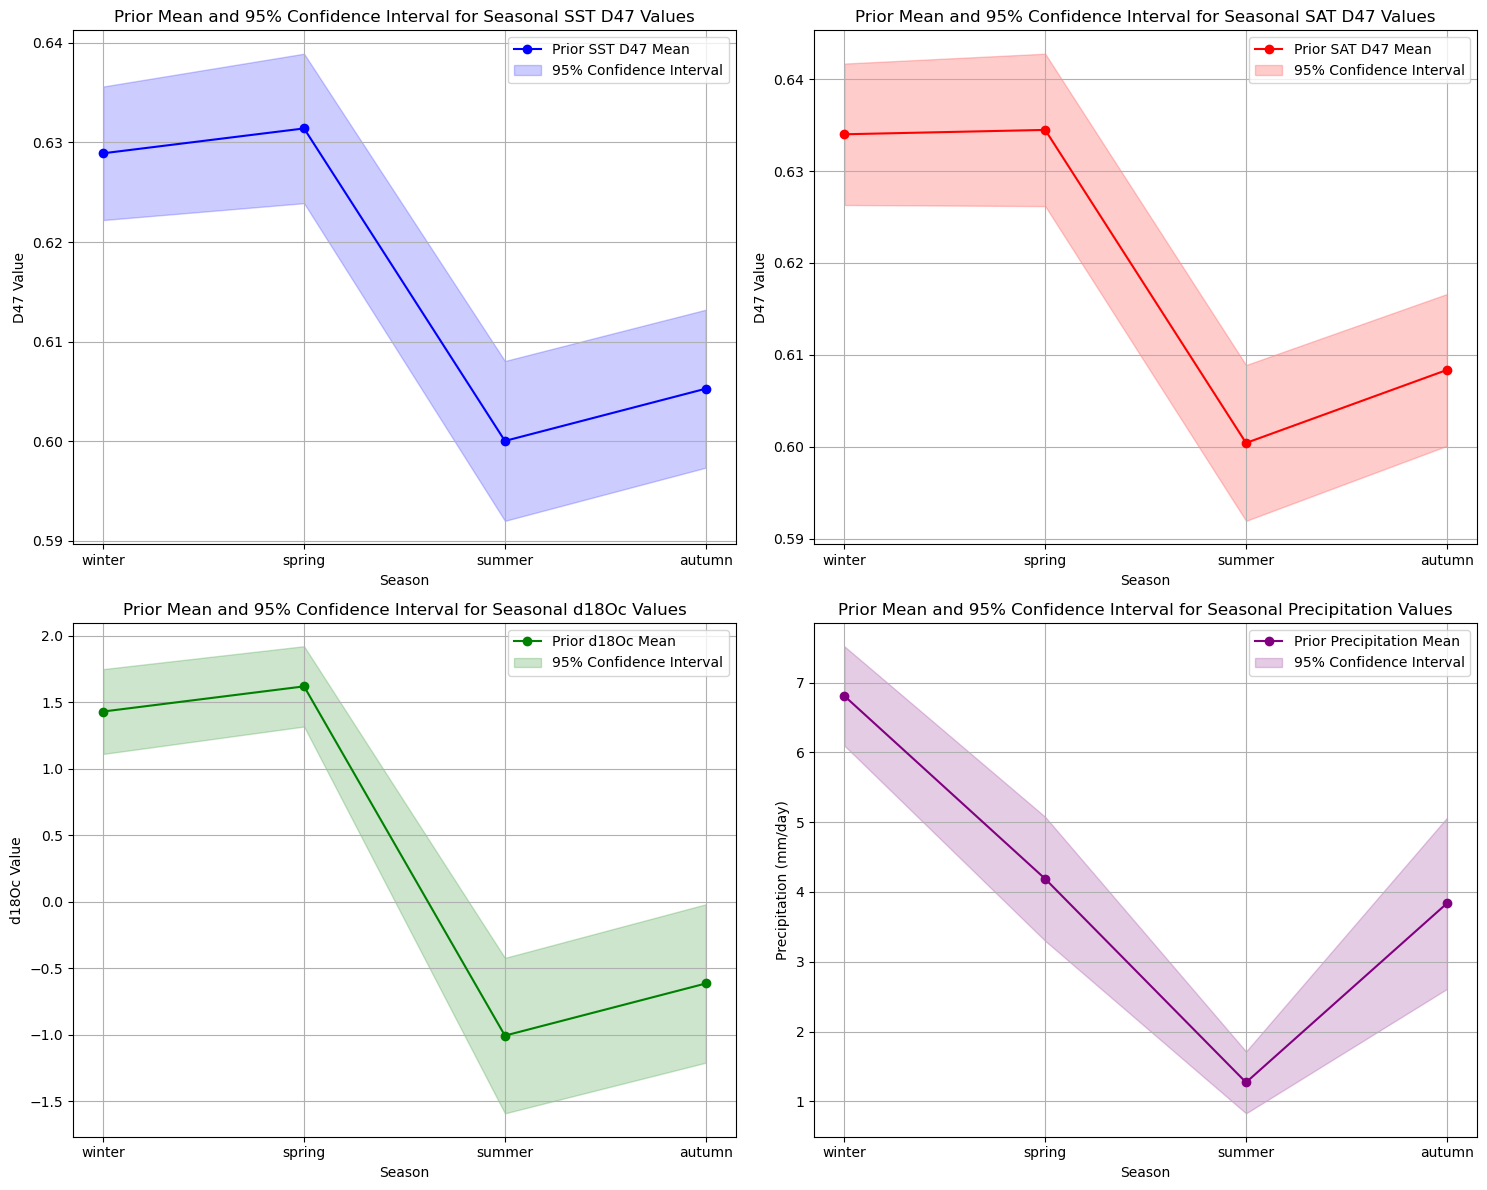

In [22]:
# Define the seasons, number of cells, and scale for the x-axis
seasons = ["winter", "spring", "summer", "autumn"]
n_models_seasonal = len(Campanian_models["Cell"])  # Find the total number of cells (use monthly data because seasonal data has this column duplicated 3 times)
seasons_scale = np.arange(len(seasons)) + 1  # Create seasonal scale

# Create a 2x2 plotting grid
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Panel 1: Plot the prior distribution for SST D47 values
axes[0, 0].plot(seasons_scale, mu_prior_SST_D47_seasonal[:len(seasons)], label='Prior SST D47 Mean', marker='o', color='b')
axes[0, 0].fill_between(
    seasons_scale,
    mu_prior_SST_D47_seasonal[:len(seasons)] - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SST_D47_seasonal[:len(seasons)] + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='b', label='95% Confidence Interval'
)
axes[0, 0].set_title('Prior Mean and 95% Confidence Interval for Seasonal SST D47 Values')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('D47 Value')
axes[0, 0].set_xticks(seasons_scale)
axes[0, 0].set_xticklabels(seasons)
axes[0, 0].legend()
axes[0, 0].grid(True)

# Panel 2: Plot the prior distribution for SAT D47 values
axes[0, 1].plot(seasons_scale, mu_prior_SAT_D47_seasonal[:len(seasons)], label='Prior SAT D47 Mean', marker='o', color='r')
axes[0, 1].fill_between(
    seasons_scale,
    mu_prior_SAT_D47_seasonal[:len(seasons)] - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_D47_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SAT_D47_seasonal[:len(seasons)] + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_D47_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='r', label='95% Confidence Interval'
)
axes[0, 1].set_title('Prior Mean and 95% Confidence Interval for Seasonal SAT D47 Values')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('D47 Value')
axes[0, 1].set_xticks(seasons_scale)
axes[0, 1].set_xticklabels(seasons)
axes[0, 1].legend()
axes[0, 1].grid(True)

# Panel 3: Plot the prior distribution for d18Oc
axes[1, 0].plot(seasons_scale, mu_prior_d18Oc_seasonal, label='Prior d18Oc Mean', marker='o', color='g')
axes[1, 0].fill_between(
    seasons_scale,
    mu_prior_d18Oc_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_d18Oc_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_d18Oc_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_d18Oc_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='g', label='95% Confidence Interval'
)
axes[1, 0].set_title('Prior Mean and 95% Confidence Interval for Seasonal d18Oc Values')
axes[1, 0].set_xlabel('Season')
axes[1, 0].set_ylabel('d18Oc Value')
axes[1, 0].set_xticks(seasons_scale)
axes[1, 0].set_xticklabels(seasons)
axes[1, 0].legend()
axes[1, 0].grid(True)

# Panel 4: Plot the prior distribution for precipitation
axes[1, 1].plot(seasons_scale, mu_prior_precip_seasonal, label='Prior Precipitation Mean', marker='o', color='purple')
axes[1, 1].fill_between(
    seasons_scale,
    mu_prior_precip_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_precip_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, color='purple', label='95% Confidence Interval'
)
axes[1, 1].set_title('Prior Mean and 95% Confidence Interval for Seasonal Precipitation Values')
axes[1, 1].set_xlabel('Season')
axes[1, 1].set_ylabel('Precipitation (mm/day)')
axes[1, 1].set_xticks(seasons_scale)
axes[1, 1].set_xticklabels(seasons)
axes[1, 1].legend()
axes[1, 1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

## Calculate the seasonal covariance matrix for D47 values derived from SST and SAT values, d18Oc and precipitation

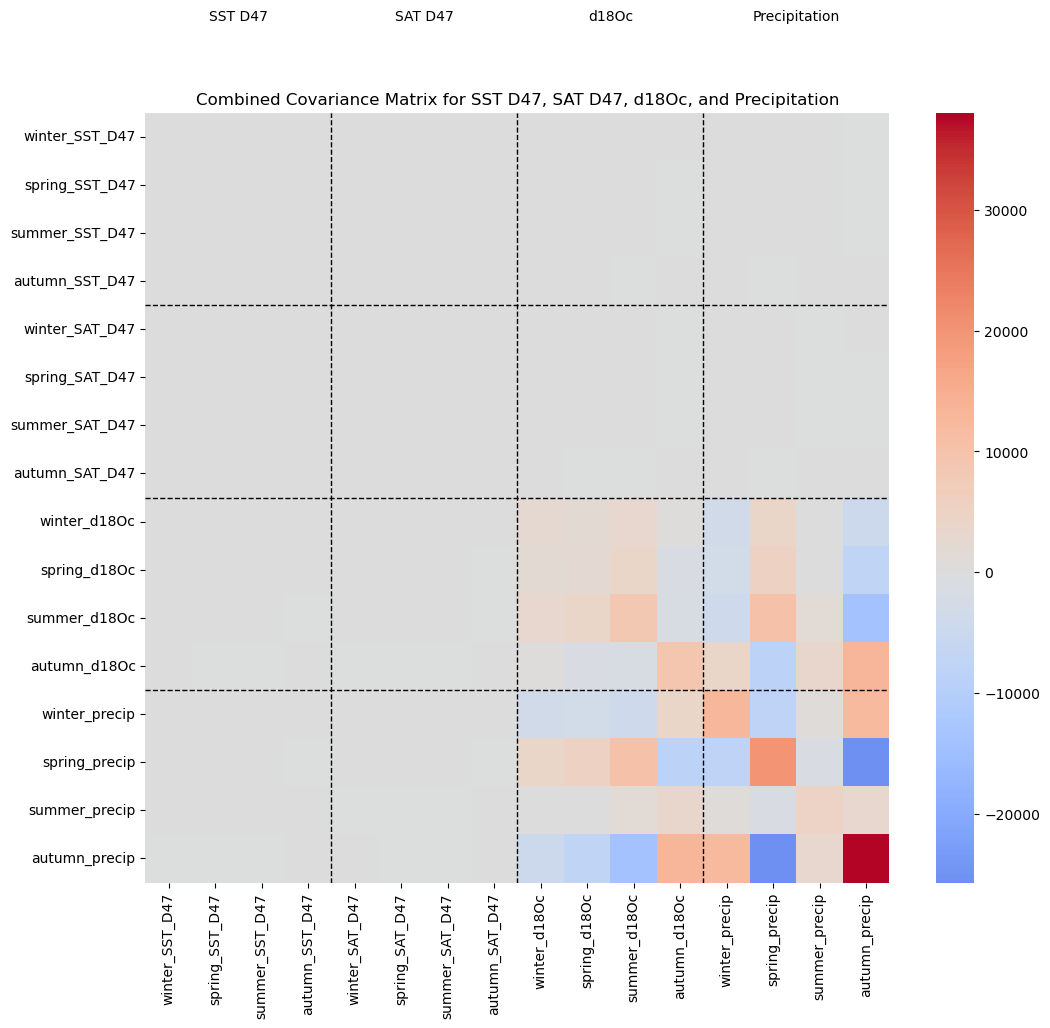

In [23]:
# Extract the relevant columns for SST, SAT D47, d18Oc, and precipitation
SST_D47_columns_seasonal = [f"{season}_SST_D47" for season in seasons]
SAT_D47_columns_seasonal = [f"{season}_SAT_D47" for season in seasons]
d18Oc_columns_seasonal = [f"{season}_d18Oc" for season in seasons]
precip_columns_seasonal = [f"{season}_precip" for season in seasons]

# Combine the relevant columns into a single dataframe
combined_data_seasonal = Campanian_models_seasonal[
    SST_D47_columns_seasonal + SAT_D47_columns_seasonal + d18Oc_columns_seasonal + precip_columns_seasonal
]

# Calculate the covariance matrix for the combined data
cov_combined_seasonal = np.cov(combined_data_seasonal.dropna(), rowvar=False)

# Extract the covariance matrices for each variable
cov_SST_D47_seasonal = cov_combined_seasonal[:len(seasons), :len(seasons)]
cov_SAT_D47_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), len(seasons):2*len(seasons)]
cov_d18Oc_seasonal = cov_combined_seasonal[2*len(seasons):3*len(seasons), 2*len(seasons):3*len(seasons)]
cov_precip_seasonal = cov_combined_seasonal[3*len(seasons):, 3*len(seasons):]

# Extract the cross-covariance matrices
cross_cov_SST_SAT_D47_seasonal = cov_combined_seasonal[:len(seasons), len(seasons):2*len(seasons)]
cross_cov_SST_d18Oc_seasonal = cov_combined_seasonal[:len(seasons), 2*len(seasons):3*len(seasons)]
cross_cov_SST_precip_seasonal = cov_combined_seasonal[:len(seasons), 3*len(seasons):]
cross_cov_SAT_d18Oc_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), 2*len(seasons):3*len(seasons)]
cross_cov_SAT_precip_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), 3*len(seasons):]
cross_cov_d18Oc_precip_seasonal = cov_combined_seasonal[2*len(seasons):3*len(seasons), 3*len(seasons):]

# Plot a heatmap of the combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    np.round(cov_combined_seasonal * 10**4, 1),  # Scale by 10^4 for better visualization and round values
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SST_D47_columns_seasonal + SAT_D47_columns_seasonal + d18Oc_columns_seasonal + precip_columns_seasonal,
    yticklabels=SST_D47_columns_seasonal + SAT_D47_columns_seasonal + d18Oc_columns_seasonal + precip_columns_seasonal
)

# Add titles to the axes per parameter
plt.axvline(x=len(SST_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal) + len(d18Oc_columns_seasonal), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SST_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal) + len(d18Oc_columns_seasonal), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SST_D47_columns_seasonal) / 2, -2, 'SST D47', ha='center', va='center', fontsize=10)
plt.text(len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal) / 2, -2, 'SAT D47', ha='center', va='center', fontsize=10)
plt.text(len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal) + len(d18Oc_columns_seasonal) / 2, -2, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SST_D47_columns_seasonal) + len(SAT_D47_columns_seasonal) + len(d18Oc_columns_seasonal) + len(precip_columns_seasonal) / 2, -2, 'Precipitation', ha='center', va='center', fontsize=10)

plt.title("Combined Covariance Matrix for SST D47, SAT D47, d18Oc, and Precipitation")
plt.show()

## Plot normalized seasonal covariance matrix between D47 values of SST and SAT, d18Oc and precipitation

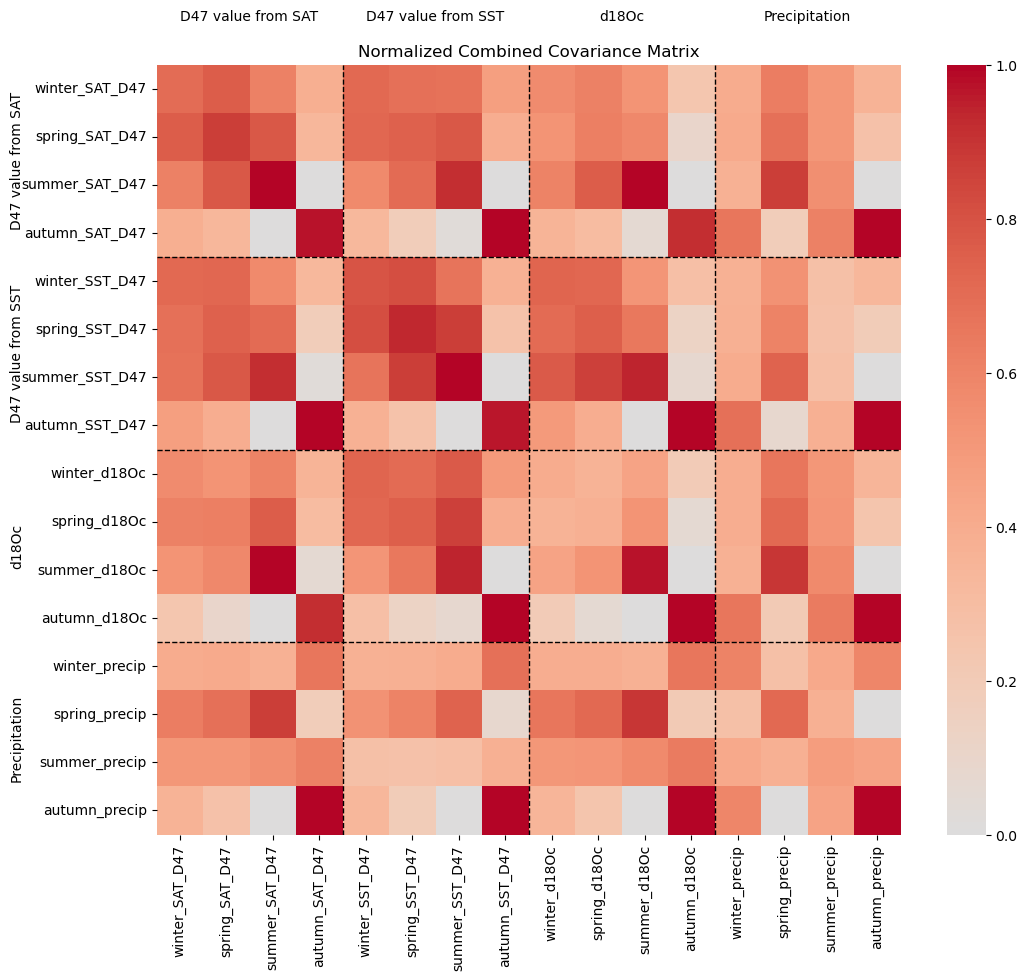

In [24]:
# Normalize each submatrix independently for better visualization
def normalize_matrix(matrix):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    return (matrix - min_val) / (max_val - min_val)

# Extract the covariance matrices for SAT D47, SST D47, d18Oc, and precipitation
cov_SAT_D47_seasonal = cov_combined_seasonal[:len(seasons), :len(seasons)]
cov_SST_D47_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), len(seasons):2*len(seasons)]
cov_d18Oc_seasonal = cov_combined_seasonal[2*len(seasons):3*len(seasons), 2*len(seasons):3*len(seasons)]
cov_precip_seasonal = cov_combined_seasonal[3*len(seasons):, 3*len(seasons):]

# Extract the cross-covariance matrices
cross_cov_SAT_SST_D47_seasonal = cov_combined_seasonal[:len(seasons), len(seasons):2*len(seasons)]
cross_cov_SAT_d18Oc_seasonal = cov_combined_seasonal[:len(seasons), 2*len(seasons):3*len(seasons)]
cross_cov_SAT_precip_seasonal = cov_combined_seasonal[:len(seasons), 3*len(seasons):]
cross_cov_SST_d18Oc_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), 2*len(seasons):3*len(seasons)]
cross_cov_SST_precip_seasonal = cov_combined_seasonal[len(seasons):2*len(seasons), 3*len(seasons):]
cross_cov_d18Oc_precip_seasonal = cov_combined_seasonal[2*len(seasons):3*len(seasons), 3*len(seasons):]

# Normalize each submatrix
normalized_cov_SAT_D47_seasonal = normalize_matrix(cov_SAT_D47_seasonal)
normalized_cov_SST_D47_seasonal = normalize_matrix(cov_SST_D47_seasonal)
normalized_cov_d18Oc_seasonal = normalize_matrix(cov_d18Oc_seasonal)
normalized_cov_precip_seasonal = normalize_matrix(cov_precip_seasonal)

# Normalize each cross-covariance matrix
normalized_cross_cov_SAT_SST_D47_seasonal = normalize_matrix(cross_cov_SAT_SST_D47_seasonal)
normalized_cross_cov_SAT_d18Oc_seasonal = normalize_matrix(cross_cov_SAT_d18Oc_seasonal)
normalized_cross_cov_SAT_precip_seasonal = normalize_matrix(cross_cov_SAT_precip_seasonal)
normalized_cross_cov_SST_d18Oc_seasonal = normalize_matrix(cross_cov_SST_d18Oc_seasonal)
normalized_cross_cov_SST_precip_seasonal = normalize_matrix(cross_cov_SST_precip_seasonal)
normalized_cross_cov_d18Oc_precip_seasonal = normalize_matrix(cross_cov_d18Oc_precip_seasonal)

# Combine the normalized submatrices into a single normalized covariance matrix
normalized_cov_combined_seasonal = np.block([
    [normalized_cov_SAT_D47_seasonal, normalized_cross_cov_SAT_SST_D47_seasonal, normalized_cross_cov_SAT_d18Oc_seasonal, normalized_cross_cov_SAT_precip_seasonal],
    [normalized_cross_cov_SAT_SST_D47_seasonal.T, normalized_cov_SST_D47_seasonal, normalized_cross_cov_SST_d18Oc_seasonal, normalized_cross_cov_SST_precip_seasonal],
    [normalized_cross_cov_SAT_d18Oc_seasonal.T, normalized_cross_cov_SST_d18Oc_seasonal.T, normalized_cov_d18Oc_seasonal, normalized_cross_cov_d18Oc_precip_seasonal],
    [normalized_cross_cov_SAT_precip_seasonal.T, normalized_cross_cov_SST_precip_seasonal.T, normalized_cross_cov_d18Oc_precip_seasonal.T, normalized_cov_precip_seasonal]
])

# Plot the heatmap of the normalized combined covariance matrix
plt.figure(figsize=(12, 10))
sns.heatmap(
    normalized_cov_combined_seasonal,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    xticklabels=SAT_D47_columns_seasonal + SST_D47_columns_seasonal + d18Oc_columns_seasonal + precip_columns_seasonal,
    yticklabels=SAT_D47_columns_seasonal + SST_D47_columns_seasonal + d18Oc_columns_seasonal + precip_columns_seasonal
)

# Add titles to the axes per parameter
plt.axvline(x=len(SAT_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axvline(x=len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal), color='black', linestyle='--', linewidth=1)

plt.axhline(y=len(SAT_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal), color='black', linestyle='--', linewidth=1)
plt.axhline(y=len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal), color='black', linestyle='--', linewidth=1)

# Add parameter labels
plt.text(len(SAT_D47_columns_seasonal) / 2, -1, 'D47 value from SAT', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) / 2, -1, 'D47 value from SST', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal) / 2, -1, 'd18Oc', ha='center', va='center', fontsize=10)
plt.text(len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal) + len(precip_columns_seasonal) / 2, -1, 'Precipitation', ha='center', va='center', fontsize=10)

plt.text(-3, len(SAT_D47_columns_seasonal) / 2, 'D47 value from SAT', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-3, len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) / 2, 'D47 value from SST', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-3, len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal) / 2, 'd18Oc', ha='center', va='center', rotation=90, fontsize=10)
plt.text(-3, len(SAT_D47_columns_seasonal) + len(SST_D47_columns_seasonal) + len(d18Oc_columns_seasonal) + len(precip_columns_seasonal) / 2, 'Precipitation', ha='center', va='center', rotation=90, fontsize=10)

plt.title("Normalized Combined Covariance Matrix")
plt.show()

## Create combined seasonal state vector

In [25]:
# Combine the prior means of D47 and SAT into a single state vector
mu_prior_seasonal_combined = np.concatenate((mu_prior_SST_D47_seasonal, mu_prior_SAT_D47_seasonal, mu_prior_d18Oc_seasonal, mu_prior_precip_seasonal))

# Combine the covariance matrices of D47 values of SST and SAT, d18Oc and precipitation including the cross-covariance
cov_prior_seasonal_combined = cov_combined_seasonal.copy()

# OBSERVATIONS
## Load clumped data for updating
### Monthly data from Kristianstad paper (de Winter et al., 2021)

In [26]:
# Load seasonal measurements and format them into a dictionary
# This is precompiled seasonal data per specimen and therefore does not come with a time uncertainty
Campanian_monthly_aggregated_data = pd.read_csv('Campanian case/Kristianstad_seasonal_data.csv') # Load the data of monthly aggregated data into Python and in the Jupyter environment.
Campanian_monthly_aggregated_data_dict = Campanian_monthly_aggregated_data.to_dict('records') # Convert to dictionary with column headers as keys

# Add an entry for the time uncertainty (which is set to 1 month in this case)
for record in Campanian_monthly_aggregated_data_dict:
    record["Month_err"] = 1 # Set the time uncertainty to zero
    record["D47"], record["D47_se"] = D47c.OGLS23.T47(T = record["T_median"], sT = record["T_SE"]) # Calculate the D47 value and its uncertainty from the reconstruced monthly temperature

print(Campanian_monthly_aggregated_data_dict[0]) # Print to check the structure of the data

{'Month': 1, 'Month_align': 6, 'Month_align1': 5, 'Month_align2': 4, 'N_sample': 10, 'T_median': 28.38, 'T_95CL': 1.87, 'T_SE': 1.031746268, 'd18Osw_median': 0.97, 'd18Osw_95CL': 0.31, 'd18Ow_SE': 0.171038151, 'd18Oc_median': -2.104814098, 'd18Oc_SE': 0.532019295, 'species': 'R_diluvianum', 'Month_err': 1, 'D47': 0.5833820226938509, 'D47_se': 0.003180623686789519}


### Raw data at the sample level

In [27]:
# Load measurements and format them into a dictionary
# These are the actual individual D47 measurements and ShellChron outcomes and thus come with a time uncertainty which can be propagated.
Campanian_D47_data = pd.read_csv('Campanian case/Kristianstad_raw_data.csv') # Load the data of individual measurements into Python and in the Jupyter environment.
Campanian_data_dict = Campanian_D47_data.to_dict('records') # Convert to dictionary with column headers as keys

# Add an entry for the time uncertainty (which is set to 1 month in this case)
for record in Campanian_data_dict:
    record["Month_err"] = 1 # Set the time uncertainty to
    record["D47"] = record["Final_D47"] - 0.071 # Subtract the acid fractionation factor from the D47 value to project back into I-CDES reference frame

print(Campanian_data_dict[0]) # Print to check the structure of the data

{'Specimen': 'R. diluvianum', 'ID': '002', 'd13C ': 0.805, 'd13C_SD': 0.011056171, 'd18Occ': -1.479, 'd18O_SD': 0.011056171, 'Final_D47': 0.71, 'D47_SD': 0.171543583, 'Modelled age': 0.169863014, 'Modelled age_align': 0.586529681, 'Modelled age_align.1': 0.586529681, 'Modelled age_align1': 0.503196347, 'Month_err': 1, 'D47': 0.639}


## Summarize proxy data to seasonal bins

In [28]:
# Define the seasons for proxy data
proxy_seasons = {
    0: [12, 1, 2],
    1: [3, 4, 5],
    2: [6, 7, 8],
    3: [9, 10, 11]
}

# Add seasonal ID to the proxy data
for record in Campanian_data_dict:
    record["Season_err"] = 0.3 # Set the season error to 0.3 (one month)
    month = math.ceil(record["Modelled age_align1"] * 12) # Round up the modelled age to the nearest month
    # NOTE: The month alignment can be modified here (Modelled age_align1 = month shifted back by 1, Modelled age_align2 by 2 months)
    if month == 0:
        month = 1 # Round exact 0 values up to 1 to prevent month indices of 0 (month should be in 1:12)
    record["month_score"] = month - 1 # Add the month score to the record (0-indexed)
    for season, months in proxy_seasons.items():
        if month in months:
            record["season_score"] = season
            break

for record in Campanian_monthly_aggregated_data_dict:
    record["Season_err"] = 0.3 # Set the season error to 0.3 (one month)
    month = record["Month_align"]
    # NOTE: The month alignment can be modified here (Month_align1 = month shifted back by 1, Month_align2 by 2 months)
    record["month_score"] = month - 1 # Add the month score to the record (0-indexed)
    for season, months in proxy_seasons.items():
        if month in months:
            record["season_score"] = season
            break

print(Campanian_data_dict[0]) # Print to check the structure of the data
print(Campanian_monthly_aggregated_data_dict[0]) # Print to check the structure of the data

{'Specimen': 'R. diluvianum', 'ID': '002', 'd13C ': 0.805, 'd13C_SD': 0.011056171, 'd18Occ': -1.479, 'd18O_SD': 0.011056171, 'Final_D47': 0.71, 'D47_SD': 0.171543583, 'Modelled age': 0.169863014, 'Modelled age_align': 0.586529681, 'Modelled age_align.1': 0.586529681, 'Modelled age_align1': 0.503196347, 'Month_err': 1, 'D47': 0.639, 'Season_err': 0.3, 'month_score': 6, 'season_score': 2}
{'Month': 1, 'Month_align': 6, 'Month_align1': 5, 'Month_align2': 4, 'N_sample': 10, 'T_median': 28.38, 'T_95CL': 1.87, 'T_SE': 1.031746268, 'd18Osw_median': 0.97, 'd18Osw_95CL': 0.31, 'd18Ow_SE': 0.171038151, 'd18Oc_median': -2.104814098, 'd18Oc_SE': 0.532019295, 'species': 'R_diluvianum', 'Month_err': 1, 'D47': 0.5833820226938509, 'D47_se': 0.003180623686789519, 'Season_err': 0.3, 'month_score': 5, 'season_score': 2}


## Prepare measurement and observation matrices

### Define a wrapped normal distribution to allow uncertainty in the time domain to flow around the year

In [29]:
# Function to calculate wrapped normal distribution weights
def wrapped_normal_pdf(x, mean, sd, num_bins):
    # Calculate the normal PDF for each bin
    pdf = stats.norm.pdf(x, loc = mean, scale = sd)
    # Wrap around the bins
    for i in range(1, num_bins):
        pdf += stats.norm.pdf(x + i * num_bins, loc = mean, scale = sd)
        pdf += stats.norm.pdf(x - i * num_bins, loc = mean, scale = sd)
    # Normalize the weights to ensure the sum equals 1
    pdf /= pdf.sum()
    return pdf

### Measurement matrix for monthly-averaged D47 values per specimen

In [30]:
# Extract measurements and uncertainties from the dictionary
D47_measurements_monthly_aggregated = [measurement["D47"] for measurement in Campanian_monthly_aggregated_data_dict] # Extract the D47 values
d18Oc_measurements_monthly_aggregated = [measurement["d18Oc_median"] for measurement in Campanian_monthly_aggregated_data_dict] # Extract the D47 values
D47_measurements_monthly_aggregated_se = [measurement["D47_se"] for measurement in Campanian_monthly_aggregated_data_dict] # Square the standard deviation to get the variance
d18Oc_measurements_monthly_aggregated_se = [measurement["d18Oc_SE"] for measurement in Campanian_monthly_aggregated_data_dict] # Square the standard deviation to get the variance

# Create the measurement matrix Z
Z_samples_aggregated = np.array(D47_measurements_monthly_aggregated + d18Oc_measurements_monthly_aggregated).reshape(-1, 1) # Combine D47 and d18Oc measurements into a single matrix

# Create the measurement uncertainty matrix R (diagonal matrix)
R_samples_aggregated = np.diag(D47_measurements_monthly_aggregated_se + d18Oc_measurements_monthly_aggregated_se)  # Combine variances of D47 and d18Oc measurements into a diagonal matrix

# Number of seasonally averaged measurements
N_measurements_monthly_aggregated = len(Z_samples_aggregated)

### Observation matrices for monthly- and season-averaged D47 data from monthly aggregated data

In [31]:
# Create the observation matrix H for monthly and seasonal data based on monthly and specimen aggregated data
H_monthly_aggregated = np.zeros((N_measurements_monthly_aggregated, len(mu_prior_monthly_combined)))
H_seasonal_aggregated = np.zeros((N_measurements_monthly_aggregated, len(mu_prior_seasonal_combined)))

# Fill the observation matrix H with ones at the positions corresponding to the measurements
for i, measurement in enumerate(Campanian_monthly_aggregated_data_dict + Campanian_monthly_aggregated_data_dict):
    if i < N_measurements_monthly_aggregated // 2:
        # Monthly aggregated data
        month_index = int(measurement["month_score"])
        season_index = int(measurement["season_score"])
        H_monthly_aggregated[i, month_index] = 1
        H_seasonal_aggregated[i, season_index] = 1
    else:
        # Seasonal aggregated data
        month_index = int(measurement["month_score"])
        season_index = int(measurement["season_score"])
        H_monthly_aggregated[i, month_index + 24] = 1
        H_seasonal_aggregated[i, season_index + 8] = 1

print(H_monthly_aggregated)
print(H_seasonal_aggregated)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Observations parsed as individual values

### Measurement matrix for individual D47 values

In [32]:
# Extract measurements and uncertainties from the dictionary, skipping missing values
D47_measurements_individual = [measurement["D47"] for measurement in Campanian_data_dict if not pd.isna(measurement["D47"])] # Extract the D47 values
d18Oc_measurements_individual = [measurement["d18Occ"] for measurement in Campanian_data_dict if not pd.isna(measurement["d18Occ"])] # Extract the d18Oc values
D47_measurement_uncertainties_individual = [measurement["D47_SD"] ** 2 for measurement in Campanian_data_dict if not pd.isna(measurement["D47"])] # Square the standard deviation to get the variance
d18Oc_measurement_uncertainties_individual = [measurement["d18O_SD"] ** 2 for measurement in Campanian_data_dict if not pd.isna(measurement["d18Occ"])] # Square the standard deviation to get the variance

# Create the measurement matrix Z
Z_samples = np.array(D47_measurements_individual + d18Oc_measurements_individual).reshape(-1, 1)

# Create the measurement uncertainty matrix R (diagonal matrix)
R_samples = np.diag(D47_measurement_uncertainties_individual + d18Oc_measurement_uncertainties_individual)  # Combine variances of D47 and d18Oc measurements into a diagonal matrix

# Number of measurements
N_measurements = len(Z_samples)

### Observation matrix for monthly and seasonal D47 data from individual D47 values

In [33]:
# Create the observation matrix H for monthly data based on individual measurements
H_monthly = np.zeros((N_measurements, len(mu_prior_monthly_combined)))
H_seasonal = np.zeros((N_measurements, len(mu_prior_seasonal_combined)))

# Fill the first part of the observation matrix H with ones at the positions corresponding to the D47 measurements, ignoring NaN values
for i, measurement in enumerate([m for m in Campanian_data_dict if not pd.isna(m["D47"])]):
    season_index = int(measurement["season_score"])
    month_index = int(measurement["month_score"])
    H_monthly[i, month_index] = 1  # Indexing the first set of columns (0:12) for SST_D47
    H_seasonal[i, season_index] = 1  # Indexing the first set of columns (1:4) for SST_D47

# Fill the second part of the observation matrix H with ones at the positions corresponding to the d18Oc measurements, ignoring NaN values
for i, measurement in enumerate([m for m in Campanian_data_dict if not pd.isna(m["d18Occ"])]):
    season_index = int(measurement["season_score"])
    month_index = int(measurement["month_score"])
    H_monthly[i + len(D47_measurements_individual), month_index + 24] = 1  # Indexing the third set of columns (12:24) for SAT_D47
    H_seasonal[i + len(D47_measurements_individual), season_index + 8] = 1  # Indexing the third column block (8:12) for d18Oc

print(H_monthly)
print(H_seasonal)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# DEFINE UPDATING FUNCTIONS

## Create updating function (Kalman filter)
- Include updating of additional variables (SAT and precipitation) through cross-covariance with measured variables (D47_SST and d18Oc)
- Use block updating

Input:
- Prior means (mu_prior)
- Prior covariance matrix (P)
- Observation matrix (H)
- Measurement matrix (Z)
- Uncertainty matrix (R)

Output:
- Posterior means (mu_post)
- Posterior covariance matrix (P_post)

In [34]:
def kalman_update_block(
    mu_prior: np.ndarray,
    cov_prior: np.ndarray,
    Z: np.ndarray,
    R: np.ndarray,
    H: np.ndarray,
    debug_print: bool = False
):
    """
    Perform a Kalman update step for a block of observations.

    Parameters:
    mu_prior (np.ndarray): The prior mean vector.
    cov_prior (np.ndarray): The prior covariance matrix.
    Z (np.ndarray): The measurement matrix.
    R (np.ndarray): The measurement noise covariance matrix.
    H (np.ndarray): The observation matrix.
    debug_print (bool): If True, print debug statements.

    Returns:
    mu_posterior (np.ndarray): The posterior mean vector.
    cov_posterior (np.ndarray): The posterior covariance matrix.
    """
    if debug_print:
        # Print shapes of key variables for debugging
        print("Shape of cov_prior:", cov_prior.shape)
        print("Shape of H:", H.shape)
        print("Shape of R:", R.shape)
        print("Shape of mu_prior:", mu_prior.shape)
        print("Shape of Z:", Z.shape)

    # Compute the Kalman gain
    K = cov_prior @ H.T @ np.linalg.inv(H @ cov_prior @ H.T + R)
    if debug_print:
        print("Shape of K:", K.shape)

    # In-between steps for debugging
    Y_hat = H @ mu_prior  # Compute the predicted observation
    if debug_print:
        print("Shape of Y_hat:", Y_hat.shape)
    innovation = Z - Y_hat.reshape(-1, 1)  # Compute the innovation
    if debug_print:
        print("Shape of innovation:", innovation.shape)
    kalman_gain = K @ innovation  # Compute the Kalman gain
    if debug_print:
        print("Shape of kalman_gain:", kalman_gain.shape)

    # Update the posterior mean estimate
    mu_posterior = mu_prior + kalman_gain.flatten()

    # Update the posterior covariance estimate
    cov_posterior = cov_prior - K @ H @ cov_prior

    return mu_posterior, cov_posterior


## Create function to track the statistics of the likelihood (combining just the reconstruction data)

In [35]:
# UPDATED UPDATING SCRIPT TO ACCOMMODATE MULTIPLE VARIABLES

# Create function to keep track of the likelihood statistics and data

def likelihood_statistics_multi(
    weighted_sum,
    effective_weights_total,
    n_update,
    data_library,
    measurement,
    timestamp,
    timestamp_sd,
    Variable_names = ["Variable_name1", "Variable_name2"],
    Variable_names_SDs = ["Variable_name_SD1", "Variable_name_SD2"]
):
    """
    Incrementally updates the likelihood statistics for seasonal data.

    Parameters:
    - weighted_sum: list
        List tracking the mean times the effective weight for each time bin and variable.
    - effective_weights_total: list
        List tracking the sum of effective weights for each time bin and variable.
    - n_update: list
        List tracking the number of datapoints for each time bin and variable.
    - data_library: dict
        Dictionary tracking individual data points and their uncertainties.
    - measurement: dict
        A single measurement containing data on multiple variables.
    - timestamp: str
        Key in the measurement dictionary for the timestamp (0-based index).
    - timestamp_sd: float
        Standard deviation of uncertainty in the timestamp.
    - Variable_name: list of str
        Key in the measurement dictionary for the variables (e.g. d18Oc, D47).
    - Variable_name_SD: list of str
        Key in the measurement dictionary for the standard deviation on the variables (e.g. d18Oc, D47).
    """
    # Check if at least one combination of variable name and its SD is present in the measurement
    found = False
    for var_name, var_sd_name in zip(Variable_names, Variable_names_SDs):
        if var_name in measurement and var_sd_name in measurement:
            found = True
            break

    if timestamp in measurement and found:
        # Extract the time and data values from the measurement
        time = measurement[timestamp]
        time_sd = measurement[timestamp_sd]
        # Loop through all variable/SD pairs
        for var_name, var_sd_name in zip(Variable_names, Variable_names_SDs):
            if var_name in measurement and var_sd_name in measurement:
                data_val = measurement[var_name]
                data_sd = measurement[var_sd_name]
                
                # Check if the data is valid
                if not np.isnan(data_val) and not np.isnan(data_sd):
                    # Calculate the weight (inverse of variance)
                    weight = 1 / (data_sd ** 2)

                    # Determine the number of bins
                    num_bins_seasonal = int(len(weighted_sum) / len(Variable_names))
                    # Ensure num_bins_seasonal is an integer
                    bin_indices = np.arange(num_bins_seasonal, dtype=np.float64)

                    # Calculate the probability density for each bin
                    if time_sd == 0:  # Catch cases where the time uncertainty is zero (or unknown)
                        probabilities = np.zeros(num_bins_seasonal, dtype=np.float64)
                        bin_index = int(time) % num_bins_seasonal  # Ensure the bin index is within range
                        probabilities[bin_index] = 1  # Set the probability to 1 for the correct bin
                    else:
                        probabilities = stats.norm.pdf(bin_indices, loc=time, scale=time_sd)  # For non-zero time uncertainty, use a normal distribution
                        probabilities /= probabilities.sum()  # Normalize to ensure the sum of probabilities is 1

                    for i, prob in enumerate(probabilities):  # Loop over all possible bin numbers in the probability vector
                        bin_index = i % num_bins_seasonal  # Wrap around to the first bin if it overflows

                        # Update the weighted sums and sample count
                        effective_weight = weight * prob
                        var_idx = Variable_names.index(var_name)  # Find the index of the variable
                        idx = int(var_idx * num_bins_seasonal + bin_index)  # Unique index for (variable, bin)
                        if weighted_sum[idx] is None:
                            weighted_sum[idx] = 0
                            effective_weights_total[idx] = 0
                        weighted_sum[idx] = weighted_sum[idx] + data_val * effective_weight
                        effective_weights_total[idx] = effective_weights_total[idx] + effective_weight

                    # Update n_update for the correct variable and bin
                    var_idx = Variable_names.index(var_name) # Find the index of the variable
                    n_update[var_idx * num_bins_seasonal + (int(time) % num_bins_seasonal)] += 1  # update sample number per bin and variable

                    # Track individual data points and their uncertainties
                    key = (var_name, int(time)) # Store individual data points in a dictionary with (variable, time) as key
                    if key not in data_library:
                        data_library[key] = []  # Initialize the list for a new (time, var_name) pair
                    data_library[key].append((time_sd, data_val, data_sd))
    return weighted_sum, effective_weights_total, n_update, data_library # Return the updated values

# EXECUTE UPDATING FUNCTIONS - SEASONAL

## Update seasonal prior with data (per specimen, per season)
* Data and model outcomes aggregated in 4 seasons
* No sclero-dating uncertainty
* D47 Data aggregated per specimen

In [36]:
# Apply Kalman function to update the prior with seasonal data including updating the SAT estimates
# Update the seasonal D47 and SAT prior with all measurements using block updating
seasonal_aggregated_data = {} # Keep track of datapoints per season
n_update_seasonal_aggregated = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_seasonal_aggregated = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_seasonal_aggregated = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood_seasonal_aggregated = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood_seasonal_aggregated = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47", "d18Oc_median"] # List of variable names which are updated
var_SD_names = ["D47_se", "d18Oc_SE"] # List of names of variable uncertainties which are updated

# Update the prior with seasonal data using the Kalman filter in block updating form
mu_post_seasonal_aggregated, cov_post_seasonal_aggregated = kalman_update_block(
    mu_prior_seasonal_combined,
    cov_prior_seasonal_combined,
    Z_samples_aggregated,
    R_samples_aggregated,
    H_seasonal_aggregated
)

# Extract the updated mean values from the combined state vector
mu_post_SST_D47_seasonal_aggregated = mu_post_seasonal_aggregated[:len(mu_prior_SST_D47_seasonal)]
mu_post_SAT_D47_seasonal_aggregated = mu_post_seasonal_aggregated[len(mu_prior_SST_D47_seasonal):2*len(mu_prior_SST_D47_seasonal)]
mu_post_d18Oc_seasonal_aggregated = mu_post_seasonal_aggregated[2*len(mu_prior_SST_D47_seasonal):3*len(mu_prior_SST_D47_seasonal)]
mu_post_precip_seasonal_aggregated = mu_post_seasonal_aggregated[3*len(mu_prior_d18Oc_seasonal):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_SST_D47_seasonal_aggregated = cov_post_seasonal_aggregated[:len(mu_prior_SST_D47_seasonal), :len(mu_prior_SST_D47_seasonal)]
cov_post_SAT_D47_seasonal_aggregated = cov_post_seasonal_aggregated[len(mu_prior_SST_D47_seasonal):2*len(mu_prior_SST_D47_seasonal), len(mu_prior_SST_D47_seasonal):2*len(mu_prior_SST_D47_seasonal)]
cov_post_d18Oc_seasonal_aggregated = cov_post_seasonal_aggregated[2*len(mu_prior_SST_D47_seasonal):3*len(mu_prior_SST_D47_seasonal), 2*len(mu_prior_SST_D47_seasonal):3*len(mu_prior_SST_D47_seasonal)]
cov_post_precip_seasonal_aggregated = cov_post_seasonal_aggregated[3*len(mu_prior_d18Oc_seasonal):, 3*len(mu_prior_d18Oc_seasonal):]


for measurement in Campanian_monthly_aggregated_data_dict: # Loop over measurements    
    # Track and update likelihood statistics
    weighted_sum_seasonal_aggregated, effective_weights_total_seasonal_aggregated, n_update_seasonal_aggregated, seasonal_aggregated_data = likelihood_statistics_multi(
        weighted_sum_seasonal_aggregated,
        effective_weights_total_seasonal_aggregated,
        n_update_seasonal_aggregated,
        seasonal_aggregated_data,
        measurement,
        timestamp = "season_score",
        timestamp_sd = "Season_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_seasonal to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_seasonal to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins_seasonal = int(len(weighted_sum_seasonal_aggregated) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins_seasonal):
        idx = var_idx * num_bins_seasonal + bin_idx
        if effective_weights_total_seasonal_aggregated[idx] is not None and effective_weights_total_seasonal_aggregated[idx] != 0:
            mu_likelihood_seasonal_aggregated[idx] = weighted_sum_seasonal_aggregated[idx] / effective_weights_total_seasonal_aggregated[idx]
            std_likelihood_seasonal_aggregated[idx] = np.sqrt(1 / effective_weights_total_seasonal_aggregated[idx])
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood_seasonal_aggregated[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood_seasonal_aggregated[idx]}")
        print(f"    Number of Data Points: {n_update_seasonal_aggregated[idx]}")
    print()

print("Original Prior Mean SST-D47 Seasonal:\n", mu_prior_SST_D47_seasonal_original)
print("Original Prior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SST_D47_seasonal_original)))
print("Updated Posterior Mean SST-D47 Seasonal:\n", mu_post_SST_D47_seasonal_aggregated)
print("Updated Posterior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SST_D47_seasonal_aggregated)))
print("Original Prior Mean SAT-D47 Seasonal:\n", mu_prior_SAT_D47_seasonal_original)
print("Original Prior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SAT_seasonal_original)))
print("Updated Posterior Mean SAT-D47 Seasonal:\n", mu_post_SAT_D47_seasonal_aggregated)
print("Updated Posterior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SAT_D47_seasonal_aggregated)))
print("Original Prior Mean d18Oc Seasonal:\n", mu_prior_d18Oc_seasonal_original)
print("Original Prior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_prior_d18Oc_seasonal_original)))
print("Updated Posterior Mean d18Oc Seasonal:\n", mu_post_d18Oc_seasonal_aggregated)
print("Updated Posterior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_post_d18Oc_seasonal_aggregated)))
print("Original Prior Mean precipitation Seasonal:\n", mu_prior_precip_seasonal_original)
print("Original Prior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_prior_precip_seasonal_original)))
print("Updated Posterior Mean precipitation Seasonal:\n", mu_post_precip_seasonal_aggregated)
print("Updated Posterior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)))

Likelihood statistics:
Results for variable: D47
  Bin 1:
    Weighted Average: 0.6198301161772864
    Aggregated Uncertainty: 0.0011515568922776888
    Number of Data Points: 9.0
  Bin 2:
    Weighted Average: 0.6159803868980833
    Aggregated Uncertainty: 0.00116119022889274
    Number of Data Points: 9.0
  Bin 3:
    Weighted Average: 0.5927022660891728
    Aggregated Uncertainty: 0.0012906962749342085
    Number of Data Points: 9.0
  Bin 4:
    Weighted Average: 0.6098314817015925
    Aggregated Uncertainty: 0.0011116857514922316
    Number of Data Points: 9.0

Results for variable: d18Oc_median
  Bin 1:
    Weighted Average: -1.2004226216285958
    Aggregated Uncertainty: 0.17535224653680742
    Number of Data Points: 9.0
  Bin 2:
    Weighted Average: -1.4169711433338297
    Aggregated Uncertainty: 0.17380220093103452
    Number of Data Points: 9.0
  Bin 3:
    Weighted Average: -2.3602280998158545
    Aggregated Uncertainty: 0.2191619716985974
    Number of Data Points: 9.0
  Bi

### Plot seasonal posterior in D47 and d18Oc domains

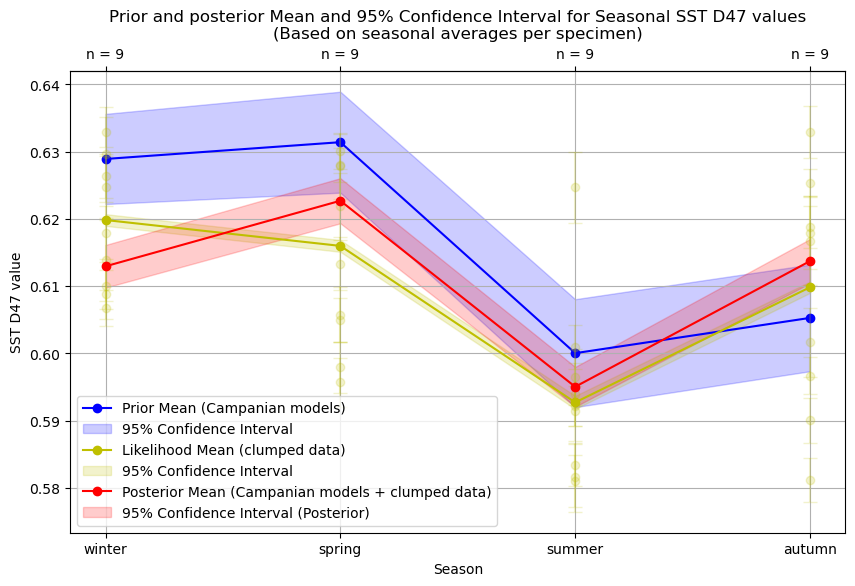

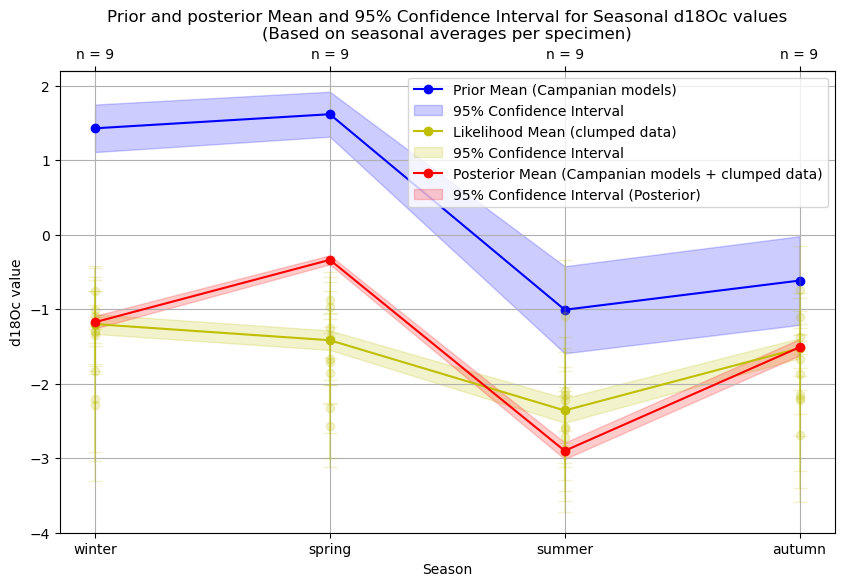

In [37]:
# --- D47 ---

# Plot the updated seasonal posterior for SST_D47
std_post_SST_D47_seasonal_aggregated = np.sqrt(np.diag(cov_post_SST_D47_seasonal_aggregated))
std_prior_SST_D47_seasonal_original = np.sqrt(np.diag(cov_prior_SST_D47_seasonal_original))
var_start_D47_seasonal = var_names.index("D47") * num_bins_seasonal # Determine the start index for the D47 variable
var_end_D47_seasonal = var_start_D47_seasonal + num_bins_seasonal # Determine the end index for the D47 variable
n_update_seasonal_aggregated_D47 = n_update_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal]  # Extract the number of updates for D47

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(seasons_scale, mu_prior_SST_D47_seasonal_original, label='Prior Mean (Campanian models)', color='b', marker='o')
plt.fill_between(
    seasons_scale,
    mu_prior_SST_D47_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_original / np.sqrt(n_models_seasonal),
    mu_prior_SST_D47_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_original / np.sqrt(n_models_seasonal),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
plt.plot(seasons_scale, mu_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    seasons_scale,
    mu_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal] - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47) * std_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal] / np.sqrt(n_update_seasonal_aggregated_D47),
    mu_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal] + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47) * std_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal] / np.sqrt(n_update_seasonal_aggregated_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in Campanian_monthly_aggregated_data_dict:
    plt.plot(measurement["season_score"] + 1, measurement["D47"], color="y", marker="o", alpha=0.2)
    plt.errorbar(measurement["season_score"] + 1, measurement["D47"], yerr=measurement["D47_se"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(seasons_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_seasonal_aggregated_D47])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(seasons_scale, mu_post_SST_D47_seasonal_aggregated, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
plt.fill_between(
    seasons_scale,
    mu_post_SST_D47_seasonal_aggregated - stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal_aggregated / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SST_D47_seasonal_aggregated + stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal_aggregated / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(seasons_scale, seasons)
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal SST D47 values\n(Based on seasonal averages per specimen)')
plt.xlabel('Season')
plt.ylabel('SST D47 value')
plt.legend()
plt.grid(True)
plt.show()

# ---d18Oc---

# Plot the updated seasonal posterior for d18Oc
std_post_d18Oc_seasonal_aggregated = np.sqrt(np.diag(cov_post_d18Oc_seasonal_aggregated))
std_prior_d18Oc_seasonal_original = np.sqrt(np.diag(cov_prior_d18Oc_seasonal_original))
var_start_d18Oc_seasonal = var_names.index("d18Oc_median") * num_bins_seasonal # Determine the start index for the d18Oc variable
var_end_d18Oc_seasonal = var_start_d18Oc_seasonal + num_bins_seasonal # Determine the end index for the d18Oc variable
n_update_seasonal_d18Oc = n_update_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal]  # Extract the number of updates for d18Oc

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(seasons_scale, mu_prior_d18Oc_seasonal_original, label='Prior Mean (Campanian models)', color='b', marker='o')
plt.fill_between(
    seasons_scale,
    mu_prior_d18Oc_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_d18Oc_seasonal_original / np.sqrt(n_models_seasonal),
    mu_prior_d18Oc_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_d18Oc_seasonal_original / np.sqrt(n_models_seasonal),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
plt.plot(seasons_scale, mu_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    seasons_scale,
    mu_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] - stats.t.ppf(1 - 0.025, n_update_seasonal_d18Oc) * std_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] / np.sqrt(n_update_seasonal_d18Oc),
    mu_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] + stats.t.ppf(1 - 0.025, n_update_seasonal_d18Oc) * std_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] / np.sqrt(n_update_seasonal_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in Campanian_monthly_aggregated_data_dict:
    plt.plot(measurement["season_score"] + 1, measurement["d18Oc_median"], color="y", marker="o", alpha=0.2)
    plt.errorbar(measurement["season_score"] + 1, measurement["d18Oc_median"], yerr=measurement["d18Oc_SE"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(seasons_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_seasonal_d18Oc])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(seasons_scale, mu_post_d18Oc_seasonal_aggregated, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
plt.fill_between(
    seasons_scale,
    mu_post_d18Oc_seasonal_aggregated - stats.t.ppf(1 - 0.025, (n_update_seasonal_d18Oc + n_models_seasonal)) * std_post_d18Oc_seasonal_aggregated / np.sqrt(n_update_seasonal_d18Oc + n_models_seasonal),
    mu_post_d18Oc_seasonal_aggregated + stats.t.ppf(1 - 0.025, (n_update_seasonal_d18Oc + n_models_seasonal)) * std_post_d18Oc_seasonal_aggregated / np.sqrt(n_update_seasonal_d18Oc + n_models_seasonal),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(seasons_scale, seasons)
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal d18Oc values\n(Based on seasonal averages per specimen)')
plt.xlabel('Season')
plt.ylabel('d18Oc value')
plt.legend()
plt.grid(True)
plt.show()

## Update seasonal prior with individual datapoints
* Aggregate data and model outcomes in 4 seasons based on individual measurements
* Including sclero-dating uncertainty
* Treat each D47 datapoint as an individual datapoint

In [38]:
# Update the seasonal prior with all measurements assigned to the seasons according to the ShellChron_DOY_rotated field
seasonal_data = {} # Keep track of datapoints per season
n_update_seasonal = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_seasonal = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_seasonal = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood_seasonal = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood_seasonal = np.concatenate([mu_prior_SST_D47_seasonal * 0, mu_prior_d18Oc_seasonal * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47", "d18Occ"] # List of variable names which are updated
var_SD_names = ["D47_SD", "d18O_SD"] # List of names of variable uncertainties which are updated

# Update the prior with seasonal data using the Kalman filter in block updating form
mu_post_seasonal, cov_post_seasonal = kalman_update_block(
    mu_prior_seasonal_combined,
    cov_prior_seasonal_combined,
    Z_samples,
    R_samples,
    H_seasonal
)

# Extract the updated mean values from the combined state vector
mu_post_SST_D47_seasonal = mu_post_seasonal[:len(mu_prior_SST_D47_seasonal)]
mu_post_SAT_D47_seasonal = mu_post_seasonal[len(mu_prior_SST_D47_seasonal):2*len(mu_prior_SST_D47_seasonal)]
mu_post_d18Oc_seasonal = mu_post_seasonal[2*len(mu_prior_SST_D47_seasonal):3*len(mu_prior_SST_D47_seasonal)]
mu_post_precip_seasonal = mu_post_seasonal[3*len(mu_prior_d18Oc_seasonal):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_SST_D47_seasonal = cov_post_seasonal[:len(mu_prior_SST_D47_seasonal), :len(mu_prior_SST_D47_seasonal)]
cov_post_SAT_D47_seasonal = cov_post_seasonal[len(mu_prior_SST_D47_seasonal):2*len(mu_prior_SST_D47_seasonal), len(mu_prior_SST_D47_seasonal):2*len(mu_prior_SST_D47_seasonal)]
cov_post_d18Oc_seasonal = cov_post_seasonal[2*len(mu_prior_SST_D47_seasonal):3*len(mu_prior_SST_D47_seasonal), 2*len(mu_prior_SST_D47_seasonal):3*len(mu_prior_SST_D47_seasonal)]
cov_post_precip_seasonal = cov_post_seasonal[3*len(mu_prior_d18Oc_seasonal):, 3*len(mu_prior_d18Oc_seasonal):]

for measurement in Campanian_data_dict: # Loop over measurements
    # Track and update likelihood statistics
    weighted_sum_seasonal, effective_weights_total_seasonal, n_update_seasonal, seasonal_data = likelihood_statistics_multi(
        weighted_sum_seasonal,
        effective_weights_total_seasonal,
        n_update_seasonal,
        seasonal_data,
        measurement,
        timestamp = "season_score",
        timestamp_sd = "Season_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_seasonal to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_seasonal to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins = int(len(weighted_sum_seasonal) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins):
        idx = var_idx * num_bins + bin_idx
        if effective_weights_total_seasonal[idx] is not None and effective_weights_total_seasonal[idx] != 0:
            mu_likelihood_seasonal[idx] = weighted_sum_seasonal[idx] / effective_weights_total_seasonal[idx]
            std_likelihood_seasonal[idx] = np.sqrt(1 / effective_weights_total_seasonal[idx])
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood_seasonal[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood_seasonal[idx]}")
        print(f"    Number of Data Points: {n_update_seasonal[idx]}")
    print()

print("Original Prior Mean SST-D47 Seasonal:\n", mu_prior_SST_D47_seasonal_original)
print("Original Prior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SST_D47_seasonal_original)))
print("Updated Posterior Mean SST-D47 Seasonal:\n", mu_post_SST_D47_seasonal)
print("Updated Posterior Standard Deviation SST-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SST_D47_seasonal)))
print("Original Prior Mean SAT-D47 Seasonal:\n", mu_prior_SAT_D47_seasonal_original)
print("Original Prior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_prior_SAT_D47_seasonal_original)))
print("Updated Posterior Mean SAT-D47 Seasonal:\n", mu_post_SAT_D47_seasonal)
print("Updated Posterior Standard Deviation SAT-D47 Seasonal:\n", np.sqrt(np.diag(cov_post_SAT_D47_seasonal)))
print("Original Prior Mean d18Oc Seasonal:\n", mu_prior_d18Oc_seasonal_original)
print("Original Prior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_prior_d18Oc_seasonal_original)))
print("Updated Posterior Mean d18Oc Seasonal:\n", mu_post_d18Oc_seasonal)
print("Updated Posterior Standard Deviation d18Oc Seasonal:\n", np.sqrt(np.diag(cov_post_d18Oc_seasonal)))
print("Original Prior Mean precipitation Seasonal:\n", mu_prior_precip_seasonal_original)
print("Original Prior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_prior_precip_seasonal_original)))
print("Updated Posterior Mean precipitation Seasonal:\n", mu_post_precip_seasonal)
print("Updated Posterior Standard Deviation precipitation Seasonal:\n", np.sqrt(np.diag(cov_post_precip_seasonal)))

Likelihood statistics:
Results for variable: D47
  Bin 1:
    Weighted Average: 0.6350251986287296
    Aggregated Uncertainty: 0.006590704375396478
    Number of Data Points: 113.0
  Bin 2:
    Weighted Average: 0.6229360064079534
    Aggregated Uncertainty: 0.008874067624412648
    Number of Data Points: 119.0
  Bin 3:
    Weighted Average: 0.6015022877182353
    Aggregated Uncertainty: 0.01780848357217498
    Number of Data Points: 44.0
  Bin 4:
    Weighted Average: 0.6139163333503835
    Aggregated Uncertainty: 0.015367952502738664
    Number of Data Points: 62.0

Results for variable: d18Occ
  Bin 1:
    Weighted Average: -0.6633574843362748
    Aggregated Uncertainty: 0.0008449844390226221
    Number of Data Points: 113.0
  Bin 2:
    Weighted Average: -1.1249423191072723
    Aggregated Uncertainty: 0.0011152279446146741
    Number of Data Points: 119.0
  Bin 3:
    Weighted Average: -1.9385360785618218
    Aggregated Uncertainty: 0.0023627667549826407
    Number of Data Points: 

### Plot seasonal posterior in D47 and d18Oc domains based on individual measurements

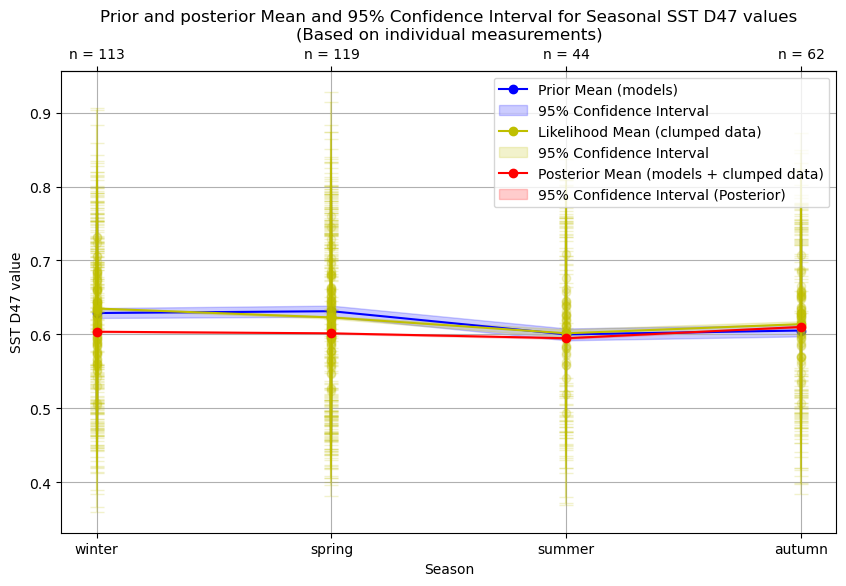

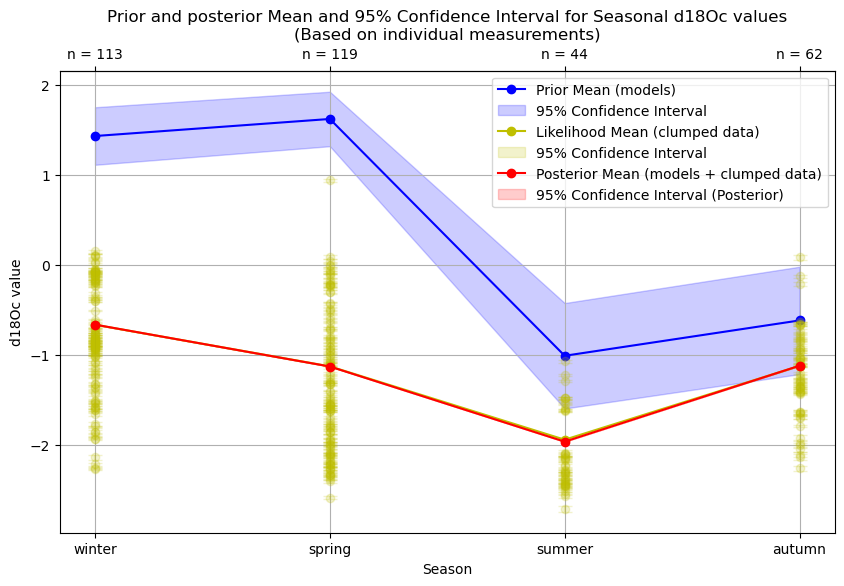

In [39]:
# --- D47 ---

# Plot the updated seasonal posterior for SST_D47
std_post_SST_D47_seasonal = np.sqrt(np.diag(cov_post_SST_D47_seasonal))
std_prior_SST_D47_seasonal_original = np.sqrt(np.diag(cov_prior_SST_D47_seasonal_original))
n_update_seasonal_D47 = n_update_seasonal[var_start_D47_seasonal:var_end_D47_seasonal]  # Extract the number of updates for D47

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(seasons_scale, mu_prior_SST_D47_seasonal_original, label='Prior Mean (models)', color='b', marker='o')
plt.fill_between(
    seasons_scale,
    mu_prior_SST_D47_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_original / np.sqrt(n_models_seasonal),
    mu_prior_SST_D47_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_original / np.sqrt(n_models_seasonal),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
plt.plot(seasons_scale, mu_likelihood_seasonal[var_start_D47_seasonal:var_end_D47_seasonal], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    seasons_scale,
    mu_likelihood_seasonal[var_start_D47_seasonal:var_end_D47_seasonal] - stats.t.ppf(1 - 0.025, n_update_seasonal_D47) * std_likelihood_seasonal[var_start_D47_seasonal:var_end_D47_seasonal] / np.sqrt(n_update_seasonal_D47),
    mu_likelihood_seasonal[var_start_D47_seasonal:var_end_D47_seasonal] + stats.t.ppf(1 - 0.025, n_update_seasonal_D47) * std_likelihood_seasonal[var_start_D47_seasonal:var_end_D47_seasonal] / np.sqrt(n_update_seasonal_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in Campanian_data_dict:
    plt.plot(int(measurement["season_score"]) + 1, measurement["D47"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["season_score"]) + 1, measurement["D47"], yerr=measurement["D47_SD"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(seasons_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_seasonal_D47])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(seasons_scale, mu_post_SST_D47_seasonal, label='Posterior Mean (models + clumped data)', color='r', marker='o')
plt.fill_between(
    seasons_scale,
    mu_post_SST_D47_seasonal - stats.t.ppf(1 - 0.025, (n_update_seasonal_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    mu_post_SST_D47_seasonal + stats.t.ppf(1 - 0.025, (n_update_seasonal_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(seasons_scale, seasons)
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal SST D47 values\n(Based on individual measurements)')
plt.xlabel('Season')
plt.ylabel('SST D47 value')
plt.legend()
plt.grid(True)
plt.show()

# ---d18Oc---

# Plot the updated seasonal posterior for d18Oc
std_post_d18Oc_seasonal = np.sqrt(np.diag(cov_post_d18Oc_seasonal))
var_end_d18Oc_seasonal = var_start_d18Oc_seasonal + num_bins # Determine the end index for the d18Oc variable
n_update_seasonal_d18Oc = n_update_seasonal[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal]  # Extract the number of updates for d18Oc

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(seasons_scale, mu_prior_d18Oc_seasonal_original, label='Prior Mean (models)', color='b', marker='o')
plt.fill_between(
    seasons_scale,
    mu_prior_d18Oc_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_d18Oc_seasonal_original / np.sqrt(n_models_seasonal),
    mu_prior_d18Oc_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_d18Oc_seasonal_original / np.sqrt(n_models_seasonal),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
plt.plot(seasons_scale, mu_likelihood_seasonal[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    seasons_scale,
    mu_likelihood_seasonal[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] - stats.t.ppf(1 - 0.025, n_update_seasonal_d18Oc) * std_likelihood_seasonal[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] / np.sqrt(n_update_seasonal_d18Oc),
    mu_likelihood_seasonal[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] + stats.t.ppf(1 - 0.025, n_update_seasonal_d18Oc) * std_likelihood_seasonal[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] / np.sqrt(n_update_seasonal_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in Campanian_data_dict:
    plt.plot(int(measurement["season_score"]) + 1, measurement["d18Occ"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["season_score"]) + 1, measurement["d18Occ"], yerr=measurement["d18O_SD"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(seasons_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_seasonal_d18Oc])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(seasons_scale, mu_post_d18Oc_seasonal, label='Posterior Mean (models + clumped data)', color='r', marker='o')
plt.fill_between(
    seasons_scale,
    mu_post_d18Oc_seasonal - stats.t.ppf(1 - 0.025, (n_update_seasonal_d18Oc + n_models_seasonal)) * std_post_d18Oc_seasonal / np.sqrt(n_update_seasonal_d18Oc + n_models_seasonal),
    mu_post_d18Oc_seasonal + stats.t.ppf(1 - 0.025, (n_update_seasonal_d18Oc + n_models_seasonal)) * std_post_d18Oc_seasonal / np.sqrt(n_update_seasonal_d18Oc + n_models_seasonal),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(seasons_scale, seasons)
plt.title('Prior and posterior Mean and 95% Confidence Interval for Seasonal d18Oc values\n(Based on individual measurements)')
plt.xlabel('Season')
plt.ylabel('d18Oc value')
plt.legend()
plt.grid(True)
plt.show()


# EXECUTE UPDATING FUNCTIONS - MONTHLY

## Update monthly prior with aggregated data
* Data and model outcomes aggregated in 12 months
* No sclero-dating uncertainty
* D47 Data aggregated per specimen and per month

In [40]:
# Apply Kalman function to update the prior with monthly data including updating the SAT estimates
# Update the monthly D47 and SAT prior with all measurements using block updating
monthly_aggregated_data = {} # Keep track of datapoints per season
n_update_monthly_aggregated = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_monthly_aggregated = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_monthly_aggregated = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood_monthly_aggregated = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood_monthly_aggregated = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47", "d18Oc_median"] # List of variable names which are updated
var_SD_names = ["D47_se", "d18Oc_SE"] # List of names of variable uncertainties which are updated

# Update the prior with monthly data using the Kalman filter in block updating form
mu_post_monthly_aggregated, cov_post_monthly_aggregated = kalman_update_block(
    mu_prior_monthly_combined,
    cov_prior_monthly_combined,
    Z_samples_aggregated,
    R_samples_aggregated,
    H_monthly_aggregated
)

# Extract the updated mean values from the combined state vector
mu_post_SST_D47_monthly_aggregated = mu_post_monthly_aggregated[:len(mu_prior_SST_D47_monthly)]
mu_post_SAT_D47_monthly_aggregated = mu_post_monthly_aggregated[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
mu_post_d18Oc_monthly_aggregated = mu_post_monthly_aggregated[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
mu_post_precip_monthly_aggregated = mu_post_monthly_aggregated[3*len(mu_prior_d18Oc_monthly):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_SST_D47_monthly_aggregated = cov_post_monthly_aggregated[:len(mu_prior_SST_D47_monthly), :len(mu_prior_SST_D47_monthly)]
cov_post_SAT_D47_monthly_aggregated = cov_post_monthly_aggregated[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly), len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
cov_post_d18Oc_monthly_aggregated = cov_post_monthly_aggregated[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly), 2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
cov_post_precip_monthly_aggregated = cov_post_monthly_aggregated[3*len(mu_prior_d18Oc_monthly):, 3*len(mu_prior_d18Oc_monthly):]


for measurement in Campanian_monthly_aggregated_data_dict: # Loop over measurements    
    # Track and update likelihood statistics
    weighted_sum_monthly_aggregated, effective_weights_total_monthly_aggregated, n_update_monthly_aggregated, monthly_aggregated_data = likelihood_statistics_multi(
        weighted_sum_monthly_aggregated,
        effective_weights_total_monthly_aggregated,
        n_update_monthly_aggregated,
        monthly_aggregated_data,
        measurement,
        timestamp = "month_score",
        timestamp_sd = "Month_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_monthly to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_monthly to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins_monthly = int(len(weighted_sum_monthly_aggregated) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins_monthly):
        idx = var_idx * num_bins_monthly + bin_idx
        if effective_weights_total_monthly_aggregated[idx] is not None and effective_weights_total_monthly_aggregated[idx] != 0:
            mu_likelihood_monthly_aggregated[idx] = weighted_sum_monthly_aggregated[idx] / effective_weights_total_monthly_aggregated[idx]
            std_likelihood_monthly_aggregated[idx] = np.sqrt(1 / effective_weights_total_monthly_aggregated[idx])
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood_monthly_aggregated[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood_monthly_aggregated[idx]}")
        print(f"    Number of Data Points: {n_update_monthly_aggregated[idx]}")
    print()

print("Original Prior Mean SST-D47 monthly:\n", mu_prior_SST_D47_monthly_original)
print("Original Prior Standard Deviation SST-D47 monthly:\n", np.sqrt(np.diag(cov_prior_SST_D47_monthly_original)))
print("Updated Posterior Mean SST-D47 monthly:\n", mu_post_SST_D47_monthly_aggregated)
print("Updated Posterior Standard Deviation SST-D47 monthly:\n", np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated)))
print("Original Prior Mean SAT-D47 monthly:\n", mu_prior_SAT_D47_monthly_original)
print("Original Prior Standard Deviation SAT-D47 monthly:\n", np.sqrt(np.diag(cov_prior_SAT_monthly_original)))
print("Updated Posterior Mean SAT-D47 monthly:\n", mu_post_SAT_D47_monthly_aggregated)
print("Updated Posterior Standard Deviation SAT-D47 monthly:\n", np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated)))
print("Original Prior Mean d18Oc monthly:\n", mu_prior_d18Oc_monthly_original)
print("Original Prior Standard Deviation d18Oc monthly:\n", np.sqrt(np.diag(cov_prior_d18Oc_monthly_original)))
print("Updated Posterior Mean d18Oc monthly:\n", mu_post_d18Oc_monthly_aggregated)
print("Updated Posterior Standard Deviation d18Oc monthly:\n", np.sqrt(np.diag(cov_post_d18Oc_monthly_aggregated)))
print("Original Prior Mean precipitation monthly:\n", mu_prior_precip_monthly_original)
print("Original Prior Standard Deviation precipitation monthly:\n", np.sqrt(np.diag(cov_prior_precip_monthly_original)))
print("Updated Posterior Mean precipitation monthly:\n", mu_post_precip_monthly_aggregated)
print("Updated Posterior Standard Deviation precipitation monthly:\n", np.sqrt(np.diag(cov_post_precip_monthly_aggregated)))

Likelihood statistics:
Results for variable: D47
  Bin 1:
    Weighted Average: 0.6178479760158807
    Aggregated Uncertainty: 0.0024064407386107226
    Number of Data Points: 3.0
  Bin 2:
    Weighted Average: 0.6195684570075085
    Aggregated Uncertainty: 0.002122161123246858
    Number of Data Points: 3.0
  Bin 3:
    Weighted Average: 0.6197276369466154
    Aggregated Uncertainty: 0.0020279783264455157
    Number of Data Points: 3.0
  Bin 4:
    Weighted Average: 0.6154944457065827
    Aggregated Uncertainty: 0.0019972466846358327
    Number of Data Points: 3.0
  Bin 5:
    Weighted Average: 0.6073263188761675
    Aggregated Uncertainty: 0.0020653445598238004
    Number of Data Points: 3.0
  Bin 6:
    Weighted Average: 0.5988998256100224
    Aggregated Uncertainty: 0.002139933703871848
    Number of Data Points: 3.0
  Bin 7:
    Weighted Average: 0.5949723068254011
    Aggregated Uncertainty: 0.0021788442013721513
    Number of Data Points: 3.0
  Bin 8:
    Weighted Average: 0.599

### Plot monthly posterior in D47 and d18Oc domain

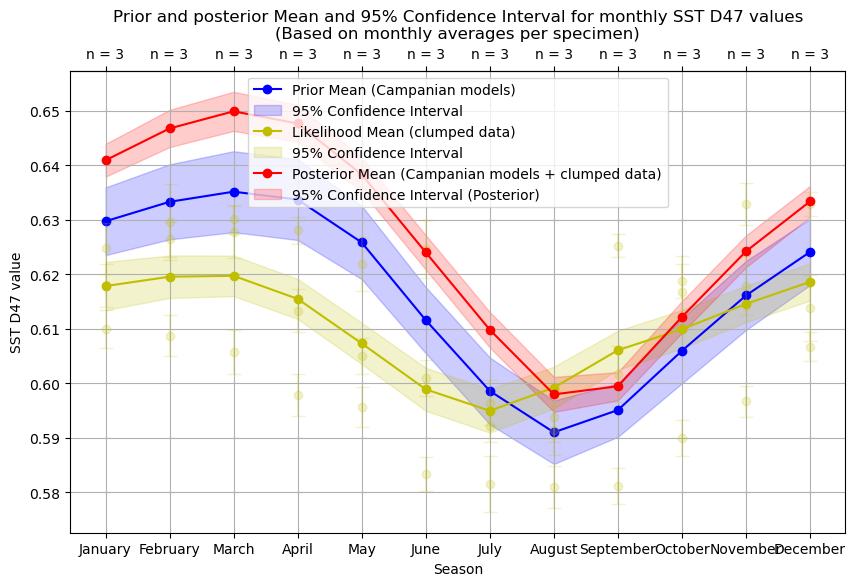

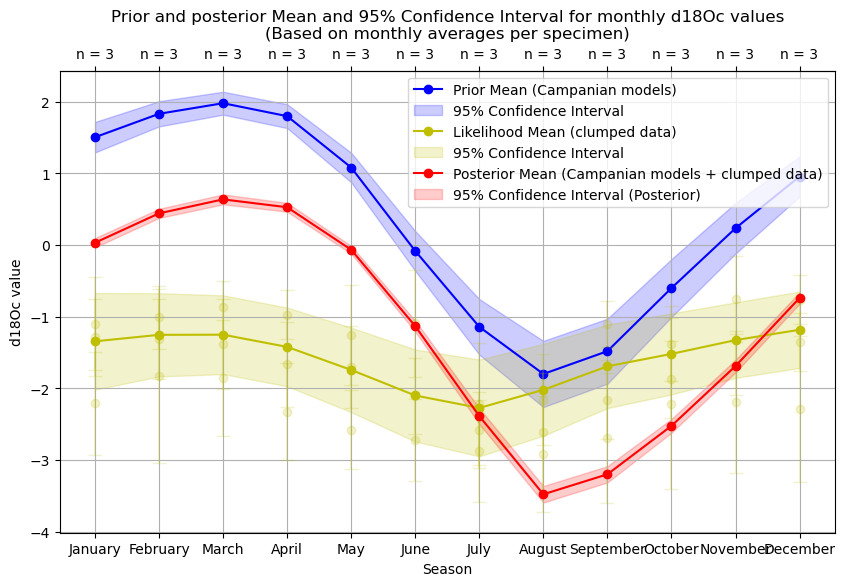

In [41]:
# --- D47 ---

# Plot the updated monthly posterior for SST_D47
std_post_SST_D47_monthly_aggregated = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated))
std_prior_SST_D47_monthly_original = np.sqrt(np.diag(cov_prior_SST_D47_monthly_original))
var_start_D47_monthly = var_names.index("D47") * num_bins_monthly # Determine the start index for the D47 variable
var_end_D47_monthly = var_start_D47_monthly + num_bins_monthly # Determine the end index for the D47 variable
n_update_monthly_aggregated_D47 = n_update_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly]  # Extract the number of updates for D47

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_SST_D47_monthly_original, label='Prior Mean (Campanian models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_SST_D47_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_SST_D47_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
plt.plot(months_scale, mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47) * std_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_D47),
    mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47) * std_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_aggregated_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in Campanian_monthly_aggregated_data_dict:
    plt.plot(measurement["month_score"] + 1, measurement["D47"], color="y", marker="o", alpha=0.2)
    plt.errorbar(measurement["month_score"] + 1, measurement["D47"], yerr=measurement["D47_se"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_aggregated_D47])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_SST_D47_monthly_aggregated, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_aggregated + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names)
plt.title('Prior and posterior Mean and 95% Confidence Interval for monthly SST D47 values\n(Based on monthly averages per specimen)')
plt.xlabel('Season')
plt.ylabel('SST D47 value')
plt.legend()
plt.grid(True)
plt.show()

# ---d18Oc---

# Plot the updated monthly posterior for d18Oc
std_post_d18Oc_monthly_aggregated = np.sqrt(np.diag(cov_post_d18Oc_monthly_aggregated))
std_prior_d18Oc_monthly_original = np.sqrt(np.diag(cov_prior_d18Oc_monthly_original))
var_start_d18Oc_monthly = var_names.index("d18Oc_median") * num_bins_monthly # Determine the start index for the d18Oc variable
var_end_d18Oc_monthly = var_start_d18Oc_monthly + num_bins_monthly # Determine the end index for the d18Oc variable
n_update_monthly_d18Oc = n_update_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly]  # Extract the number of updates for d18Oc

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_d18Oc_monthly_original, label='Prior Mean (Campanian models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_d18Oc_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_d18Oc_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
plt.plot(months_scale, mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_d18Oc) * std_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_d18Oc),
    mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_d18Oc) * std_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in Campanian_monthly_aggregated_data_dict:
    plt.plot(measurement["month_score"] + 1, measurement["d18Oc_median"], color="y", marker="o", alpha=0.2)
    plt.errorbar(measurement["month_score"] + 1, measurement["d18Oc_median"], yerr=measurement["d18Oc_SE"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_d18Oc])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_d18Oc_monthly_aggregated, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_d18Oc_monthly_aggregated - stats.t.ppf(1 - 0.025, (n_update_monthly_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated / np.sqrt(n_update_monthly_d18Oc + n_models_monthly),
    mu_post_d18Oc_monthly_aggregated + stats.t.ppf(1 - 0.025, (n_update_monthly_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly_aggregated / np.sqrt(n_update_monthly_d18Oc + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names)
plt.title('Prior and posterior Mean and 95% Confidence Interval for monthly d18Oc values\n(Based on monthly averages per specimen)')
plt.xlabel('Season')
plt.ylabel('d18Oc value')
plt.legend()
plt.grid(True)
plt.show()

## Update monthly prior with individual datapoints
* Aggregate data and model outcomes in 12 seasons based on individual D47 and d18Oc datapoints
* No sclero-dating uncertainty
* Treat each D47 datapoint as an individual datapoint

In [42]:
# Update the monthly prior with all measurements assigned to the seasons according to the ShellChron_DOY_rotated field
monthly_data = {} # Keep track of datapoints per season
n_update_monthly = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store sample size per season for confidence interval plotting
weighted_sum_monthly = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store mean temperature per season for confidence interval plotting
effective_weights_total_monthly = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
mu_likelihood_monthly = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store mean temperature per season for confidence interval plotting
std_likelihood_monthly = np.concatenate([mu_prior_SST_D47_monthly * 0, mu_prior_d18Oc_monthly * 0]) # Vector to store temperature uncertainty per season for confidence interval plotting
var_names = ["D47", "d18Occ"] # List of variable names which are updated
var_SD_names = ["D47_SD", "d18O_SD"] # List of names of variable uncertainties which are updated

# Update the prior with monthly data using the Kalman filter in block updating form
mu_post_monthly, cov_post_monthly = kalman_update_block(
    mu_prior_monthly_combined,
    cov_prior_monthly_combined,
    Z_samples,
    R_samples,
    H_monthly
)

# Extract the updated mean values from the combined state vector
mu_post_SST_D47_monthly = mu_post_monthly[:len(mu_prior_SST_D47_monthly)]
mu_post_SAT_D47_monthly = mu_post_monthly[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
mu_post_d18Oc_monthly = mu_post_monthly[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
mu_post_precip_monthly = mu_post_monthly[3*len(mu_prior_d18Oc_monthly):]

# Extract the updated covariance matrices from the combined covariance matrix
cov_post_SST_D47_monthly = cov_post_monthly[:len(mu_prior_SST_D47_monthly), :len(mu_prior_SST_D47_monthly)]
cov_post_SAT_D47_monthly = cov_post_monthly[len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly), len(mu_prior_SST_D47_monthly):2*len(mu_prior_SST_D47_monthly)]
cov_post_d18Oc_monthly = cov_post_monthly[2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly), 2*len(mu_prior_SST_D47_monthly):3*len(mu_prior_SST_D47_monthly)]
cov_post_precip_monthly = cov_post_monthly[3*len(mu_prior_d18Oc_monthly):, 3*len(mu_prior_d18Oc_monthly):]

for measurement in Campanian_data_dict: # Loop over measurements
    # Track and update likelihood statistics
    weighted_sum_monthly, effective_weights_total_monthly, n_update_monthly, monthly_data = likelihood_statistics_multi(
        weighted_sum_monthly,
        effective_weights_total_monthly,
        n_update_monthly,
        monthly_data,
        measurement,
        timestamp = "month_score",
        timestamp_sd = "Month_err",
        Variable_names = var_names,
        Variable_names_SDs = var_SD_names
    )

# Normalize the weighted_sum_monthly to obtain weighted mean
# Calculate inverse square root of the effective_weights_total_monthly to contain the weighted standard deviation
# Print likelihood statistics
print("Likelihood statistics:")
num_vars = len(var_names)  # number of variables (e.g., D47, d18O)
num_bins = int(len(weighted_sum_monthly) / num_vars)

for var_idx, var_name in enumerate(var_names):
    print(f"Results for variable: {var_name}")
    for bin_idx in range(num_bins):
        idx = var_idx * num_bins + bin_idx
        if effective_weights_total_monthly[idx] is not None and effective_weights_total_monthly[idx] != 0:
            mu_likelihood_monthly[idx] = weighted_sum_monthly[idx] / effective_weights_total_monthly[idx]
            std_likelihood_monthly[idx] = np.sqrt(1 / effective_weights_total_monthly[idx])
        print(f"  Bin {bin_idx + 1}:")
        print(f"    Weighted Average: {mu_likelihood_monthly[idx]}")
        print(f"    Aggregated Uncertainty: {std_likelihood_monthly[idx]}")
        print(f"    Number of Data Points: {n_update_monthly[idx]}")
    print()

print("Original Prior Mean SST-D47 monthly:\n", mu_prior_SST_D47_monthly_original)
print("Original Prior Standard Deviation SST-D47 monthly:\n", np.sqrt(np.diag(cov_prior_SST_D47_monthly_original)))
print("Updated Posterior Mean SST-D47 monthly:\n", mu_post_SST_D47_monthly)
print("Updated Posterior Standard Deviation SST-D47 monthly:\n", np.sqrt(np.diag(cov_post_SST_D47_monthly)))
print("Original Prior Mean SAT-D47 monthly:\n", mu_prior_SAT_D47_monthly_original)
print("Original Prior Standard Deviation SAT-D47 monthly:\n", np.sqrt(np.diag(cov_prior_SAT_D47_monthly_original)))
print("Updated Posterior Mean SAT-D47 monthly:\n", mu_post_SAT_D47_monthly)
print("Updated Posterior Standard Deviation SAT-D47 monthly:\n", np.sqrt(np.diag(cov_post_SAT_D47_monthly)))
print("Original Prior Mean d18Oc monthly:\n", mu_prior_d18Oc_monthly_original)
print("Original Prior Standard Deviation d18Oc monthly:\n", np.sqrt(np.diag(cov_prior_d18Oc_monthly_original)))
print("Updated Posterior Mean d18Oc monthly:\n", mu_post_d18Oc_monthly)
print("Updated Posterior Standard Deviation d18Oc monthly:\n", np.sqrt(np.diag(cov_post_d18Oc_monthly)))
print("Original Prior Mean precipitation monthly:\n", mu_prior_precip_monthly_original)
print("Original Prior Standard Deviation precipitation monthly:\n", np.sqrt(np.diag(cov_prior_precip_monthly_original)))
print("Updated Posterior Mean precipitation monthly:\n", mu_post_precip_monthly)
print("Updated Posterior Standard Deviation precipitation monthly:\n", np.sqrt(np.diag(cov_post_precip_monthly)))

Likelihood statistics:
Results for variable: D47
  Bin 1:
    Weighted Average: 0.6312658570438424
    Aggregated Uncertainty: 0.010360429745329804
    Number of Data Points: 50.0
  Bin 2:
    Weighted Average: 0.6334207964562587
    Aggregated Uncertainty: 0.010802658019947302
    Number of Data Points: 34.0
  Bin 3:
    Weighted Average: 0.6306704904428824
    Aggregated Uncertainty: 0.013391823214200979
    Number of Data Points: 44.0
  Bin 4:
    Weighted Average: 0.6230801280483895
    Aggregated Uncertainty: 0.015629722214188752
    Number of Data Points: 46.0
  Bin 5:
    Weighted Average: 0.6221085752180483
    Aggregated Uncertainty: 0.01747297510594594
    Number of Data Points: 29.0
  Bin 6:
    Weighted Average: 0.621251340439462
    Aggregated Uncertainty: 0.02204731740683753
    Number of Data Points: 13.0
  Bin 7:
    Weighted Average: 0.6094384241889463
    Aggregated Uncertainty: 0.0279917617389646
    Number of Data Points: 20.0
  Bin 8:
    Weighted Average: 0.595789

### Plot seasonal posterior in D47 and d18Oc domains based on individual measurements

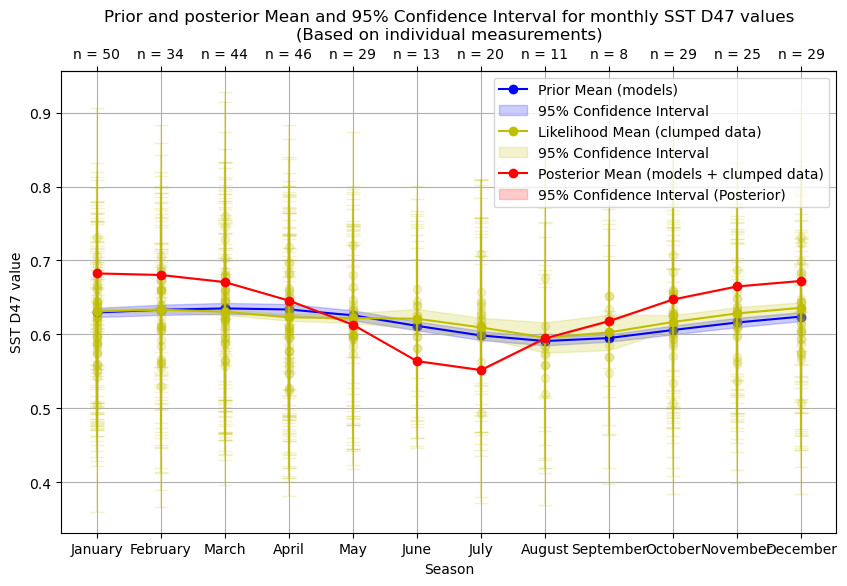

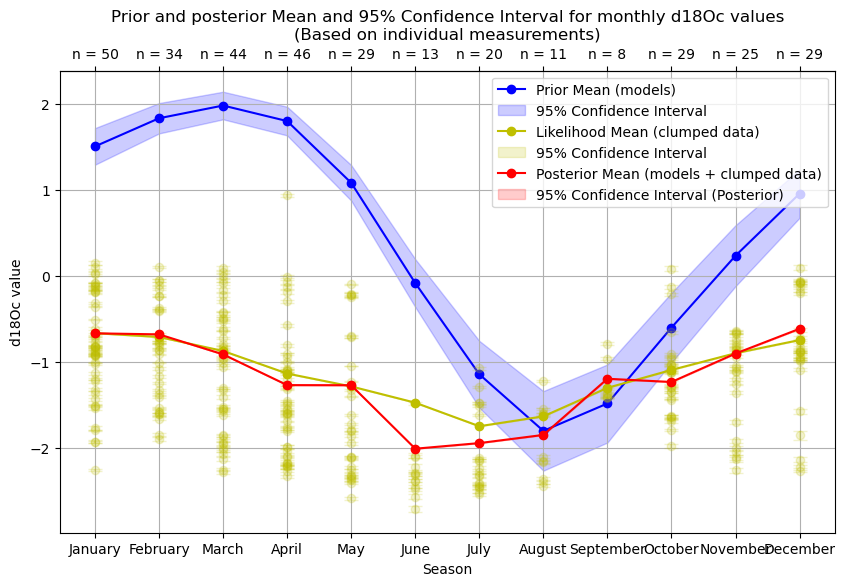

In [43]:
# --- D47 ---

# Plot the updated monthly posterior for SST_D47
std_post_SST_D47_monthly = np.sqrt(np.diag(cov_post_SST_D47_monthly))
std_prior_SST_D47_monthly_original = np.sqrt(np.diag(cov_prior_SST_D47_monthly_original))
n_update_monthly_D47 = n_update_monthly[var_start_D47_monthly:var_end_D47_monthly]  # Extract the number of updates for D47

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_SST_D47_monthly_original, label='Prior Mean (models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_SST_D47_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_SST_D47_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable to parse information from the likelihood statistics
plt.plot(months_scale, mu_likelihood_monthly[var_start_D47_monthly:var_end_D47_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly[var_start_D47_monthly:var_end_D47_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_D47) * std_likelihood_monthly[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_D47),
    mu_likelihood_monthly[var_start_D47_monthly:var_end_D47_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_D47) * std_likelihood_monthly[var_start_D47_monthly:var_end_D47_monthly] / np.sqrt(n_update_monthly_D47),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in Campanian_data_dict:
    plt.plot(int(measurement["month_score"]) + 1, measurement["D47"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score"]) + 1, measurement["D47"], yerr=measurement["D47_SD"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_D47])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_SST_D47_monthly, label='Posterior Mean (models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_SST_D47_monthly - stats.t.ppf(1 - 0.025, (n_update_monthly_D47 + n_models_monthly)) * std_post_SST_D47_monthly / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    mu_post_SST_D47_monthly + stats.t.ppf(1 - 0.025, (n_update_monthly_D47 + n_models_monthly)) * std_post_SST_D47_monthly / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names)
plt.title('Prior and posterior Mean and 95% Confidence Interval for monthly SST D47 values\n(Based on individual measurements)')
plt.xlabel('Season')
plt.ylabel('SST D47 value')
plt.legend()
plt.grid(True)
plt.show()

# ---d18Oc---

# Plot the updated monthly posterior for d18Oc
std_post_d18Oc_monthly = np.sqrt(np.diag(cov_post_d18Oc_monthly))
var_end_d18Oc_monthly = var_start_d18Oc_monthly + num_bins # Determine the end index for the d18Oc variable
n_update_monthly_d18Oc = n_update_monthly[var_start_d18Oc_monthly:var_end_d18Oc_monthly]  # Extract the number of updates for d18Oc

plt.figure(figsize=(10, 6))

# PRIOR
plt.plot(months_scale, mu_prior_d18Oc_monthly_original, label='Prior Mean (models)', color='b', marker='o')
plt.fill_between(
    months_scale,
    mu_prior_d18Oc_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_monthly_original / np.sqrt(n_models_monthly),
    mu_prior_d18Oc_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_d18Oc_monthly_original / np.sqrt(n_models_monthly),
    color='b',
    alpha=0.2,
    label='95% Confidence Interval'
)

# LIKELIHOOD
# Determine the start and end indices for the selected variable
plt.plot(months_scale, mu_likelihood_monthly[var_start_d18Oc_monthly:var_end_d18Oc_monthly], label='Likelihood Mean (clumped data)', color='y', marker='o')
plt.fill_between(
    months_scale,
    mu_likelihood_monthly[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - stats.t.ppf(1 - 0.025, n_update_monthly_d18Oc) * std_likelihood_monthly[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_d18Oc),
    mu_likelihood_monthly[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + stats.t.ppf(1 - 0.025, n_update_monthly_d18Oc) * std_likelihood_monthly[var_start_d18Oc_monthly:var_end_d18Oc_monthly] / np.sqrt(n_update_monthly_d18Oc),
    color='y',
    alpha=0.2,
    label='95% Confidence Interval'
)
for measurement in Campanian_data_dict:
    plt.plot(int(measurement["month_score"]) + 1, measurement["d18Occ"], color="y", marker="o", alpha=0.2)
    plt.errorbar(int(measurement["month_score"]) + 1, measurement["d18Occ"], yerr=measurement["d18O_SD"], color="y", alpha=0.2, capsize=5)
secax = plt.gca().secondary_xaxis('top')
secax.set_xticks(months_scale)
secax.set_xticklabels([f"n = {int(n)}" for n in n_update_monthly_d18Oc])
secax.tick_params(axis='x', rotation=0)

# POSTERIOR
plt.plot(months_scale, mu_post_d18Oc_monthly, label='Posterior Mean (models + clumped data)', color='r', marker='o')
plt.fill_between(
    months_scale,
    mu_post_d18Oc_monthly - stats.t.ppf(1 - 0.025, (n_update_monthly_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly / np.sqrt(n_update_monthly_d18Oc + n_models_monthly),
    mu_post_d18Oc_monthly + stats.t.ppf(1 - 0.025, (n_update_monthly_d18Oc + n_models_monthly)) * std_post_d18Oc_monthly / np.sqrt(n_update_monthly_d18Oc + n_models_monthly),
    color='r',
    alpha=0.2,
    label='95% Confidence Interval (Posterior)'
)

plt.xticks(months_scale, month_names)
plt.title('Prior and posterior Mean and 95% Confidence Interval for monthly d18Oc values\n(Based on individual measurements)')
plt.xlabel('Season')
plt.ylabel('d18Oc value')
plt.legend()
plt.grid(True)
plt.show()


# POSTERIOR - SEASONAL

## Seasonal posterior in temperature and salinity domains (data aggregated per specimen and season)
* Data and model outcomes aggregated in 4 seasons
* No sclero-dating uncertainty
* D47 Data aggregated per specimen

### Convert seasonal prior, likelihood and posterior to temperature and salinity and plot

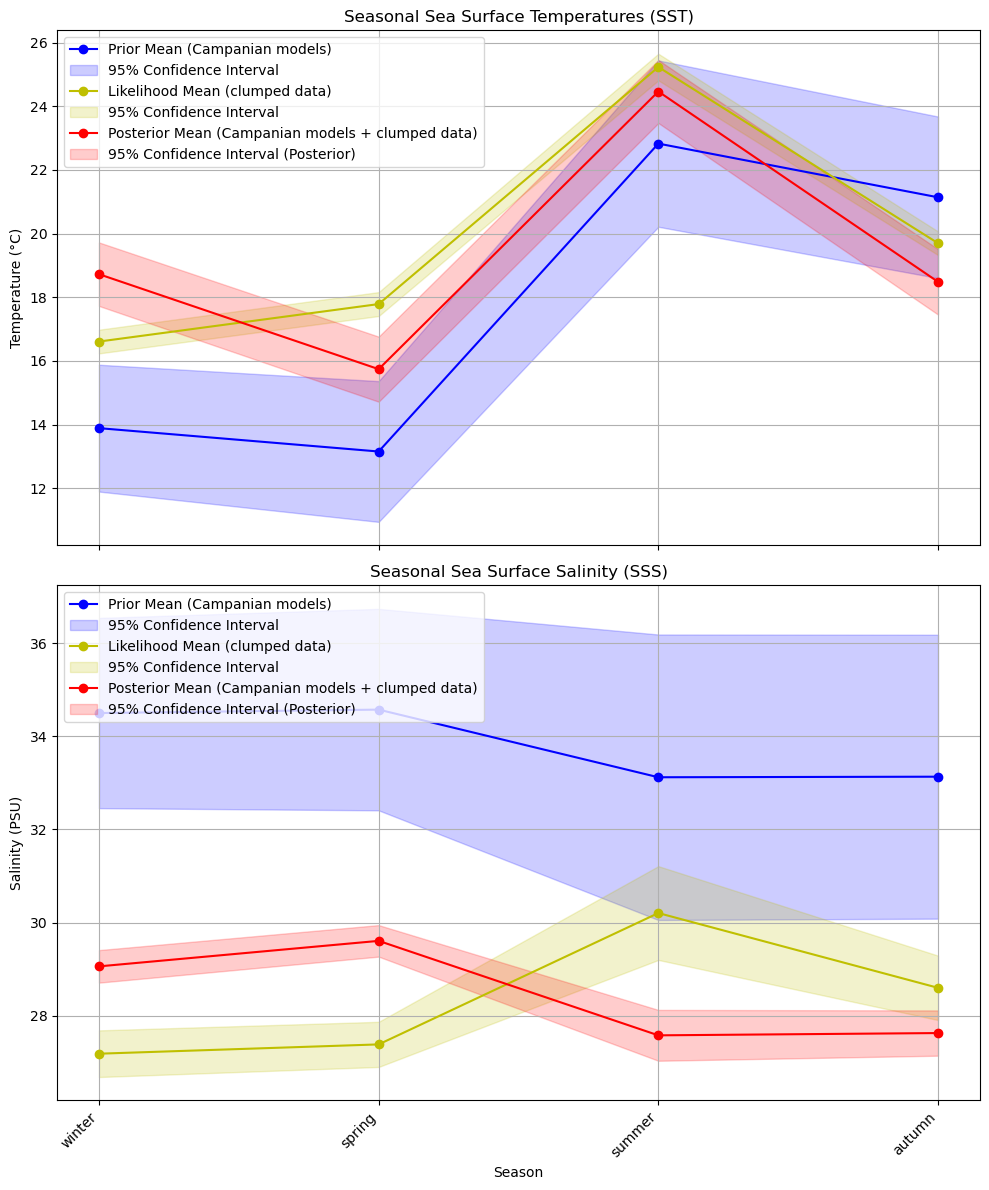

In [44]:
# Convert prior D47 to temp
mu_prior_SST_D47_seasonal_T = D47c.OGLS23.T47(D47 = mu_prior_SST_D47_seasonal_original, sD47 = cov_prior_SST_D47_seasonal_original, return_covar = True)[0]
cov_prior_SST_D47_seasonal_T = D47c.OGLS23.T47(D47 = mu_prior_SST_D47_seasonal_original, sD47 = cov_prior_SST_D47_seasonal_original, return_covar = True)[1]

# Convert prior d18Oc and temperature to d18Ow
mu_prior_d18Ow_seasonal_T = mu_prior_d18Oc_seasonal_original - (20.6 - mu_prior_SST_D47_seasonal_T) / 4.34 + 0.27
cov_prior_d18Ow_seasonal_T = cov_prior_d18Oc_seasonal_original + (1 / 4.34) ** 2 * cov_prior_SST_D47_seasonal_T

# Convert prior d18Ow to SSS
mu_prior_SSS_d18Ow_seasonal_T = (mu_prior_d18Ow_seasonal_T + 9.300) / 0.274
cov_prior_SSS_d18Ow_seasonal_T = cov_prior_d18Ow_seasonal_T / (0.274 ** 2)

# Convert likelihood D47 to temp
mu_likelihood_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal], sD47 = std_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal], return_covar = True)[0]
cov_likelihood_seasonal_T = D47c.OGLS23.T47(D47 = mu_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal], sD47 = std_likelihood_seasonal_aggregated[var_start_D47_seasonal:var_end_D47_seasonal], return_covar = True)[1]

# Convert likelihood d18Oc and temperature to d18Ow (curently not implemented in data tracking function)
mu_likelihood_d18Ow_seasonal_T = mu_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] - (20.6 - mu_likelihood_seasonal_aggregated_T) / 4.34 + 0.27
std_likelihood_d18Ow_seasonal_T = std_likelihood_seasonal_aggregated[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] + (1 / 4.34) ** 2 * np.sqrt(np.diag(cov_likelihood_seasonal_T))

# Convert likelihood d18Ow to SSS (currently not implemented in data tracking function)
mu_likelihood_SSS_d18Ow_seasonal_T = (mu_likelihood_d18Ow_seasonal_T + 9.300) / 0.274
std_likelihood_SSS_d18Ow_seasonal_T = std_likelihood_d18Ow_seasonal_T / (0.274 ** 2)

# Convert posterior D47 to temp
mu_post_SST_D47_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_seasonal_aggregated, sD47 = cov_post_SST_D47_seasonal_aggregated, return_covar = True)[0]
cov_post_SST_D47_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_seasonal_aggregated, sD47 = cov_post_SST_D47_seasonal_aggregated, return_covar = True)[1]

# Convert posterior d18Oc and temperature to d18Ow
mu_post_d18Ow_seasonal_aggregated_T = mu_post_d18Oc_seasonal_aggregated - (20.6 - mu_post_SST_D47_seasonal_aggregated_T) / 4.34 + 0.27
cov_post_d18Ow_seasonal_aggregated_T = cov_post_d18Oc_seasonal_aggregated + (1 / 4.34) ** 2 * cov_post_SST_D47_seasonal_aggregated_T

# Convert posterior d18Ow to SSS
mu_post_SSS_d18Ow_seasonal_aggregated_T = (mu_post_d18Ow_seasonal_aggregated_T + 9.300) / 0.274
cov_post_SSS_d18Ow_seasonal_aggregated_T = cov_post_d18Ow_seasonal_aggregated_T / (0.274 ** 2)

# Plot in temperature domain
std_prior_SST_D47_seasonal_T = np.sqrt(np.diag(cov_prior_SST_D47_seasonal_T))
std_prior_SSS_d18Ow_seasonal_T = np.sqrt(np.diag(cov_prior_SSS_d18Ow_seasonal_T))
std_likelihood_seasonal_aggregated_T = np.sqrt(np.diag(cov_likelihood_seasonal_T))
std_post_SST_D47_seasonal_aggregated_T = np.sqrt(np.diag(cov_post_SST_D47_seasonal_aggregated_T))
std_post_SSS_d18Ow_seasonal_aggregated_T = np.sqrt(np.diag(cov_post_SSS_d18Ow_seasonal_aggregated_T))
# Initiate plot
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# FIRST PANEL: SST Results
# PRIOR
axs[0].plot(seasons_scale, mu_prior_SST_D47_seasonal_T, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[0].fill_between(seasons_scale,
    mu_prior_SST_D47_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_T / np.sqrt(n_models_seasonal),
    mu_prior_SST_D47_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_T / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[0].plot(seasons_scale, mu_likelihood_seasonal_aggregated_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[0].fill_between(seasons_scale,
    mu_likelihood_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47) * std_likelihood_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47),
    mu_likelihood_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47) * std_likelihood_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[0].plot(seasons_scale, mu_post_SST_D47_seasonal_aggregated_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[0].fill_between(seasons_scale,
    mu_post_SST_D47_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SST_D47_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SST panel
axs[0].set_title('Seasonal Sea Surface Temperatures (SST)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# SECOND PANEL: SSS Results
# PRIOR
axs[1].plot(seasons_scale, mu_prior_SSS_d18Ow_seasonal_T, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[1].fill_between(seasons_scale,
    mu_prior_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    mu_prior_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[1].plot(seasons_scale, mu_likelihood_SSS_d18Ow_seasonal_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[1].fill_between(seasons_scale,
    mu_likelihood_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_update_seasonal_d18Oc) * std_likelihood_SSS_d18Ow_seasonal_T / np.sqrt(n_update_seasonal_d18Oc),
    mu_likelihood_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_update_seasonal_d18Oc) * std_likelihood_SSS_d18Ow_seasonal_T / np.sqrt(n_update_seasonal_d18Oc),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[1].plot(seasons_scale, mu_post_SSS_d18Ow_seasonal_aggregated_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[1].fill_between(seasons_scale,
    mu_post_SSS_d18Ow_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_seasonal_d18Oc + n_models_seasonal)) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_d18Oc + n_models_seasonal),
    mu_post_SSS_d18Ow_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_seasonal_d18Oc + n_models_seasonal)) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_d18Oc + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SSS panel
axs[1].set_title('Seasonal Sea Surface Salinity (SSS)')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Salinity (PSU)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Shared x-axis labels
plt.xticks(seasons_scale, seasons, rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Plot SAT and precipitation prior and posterior

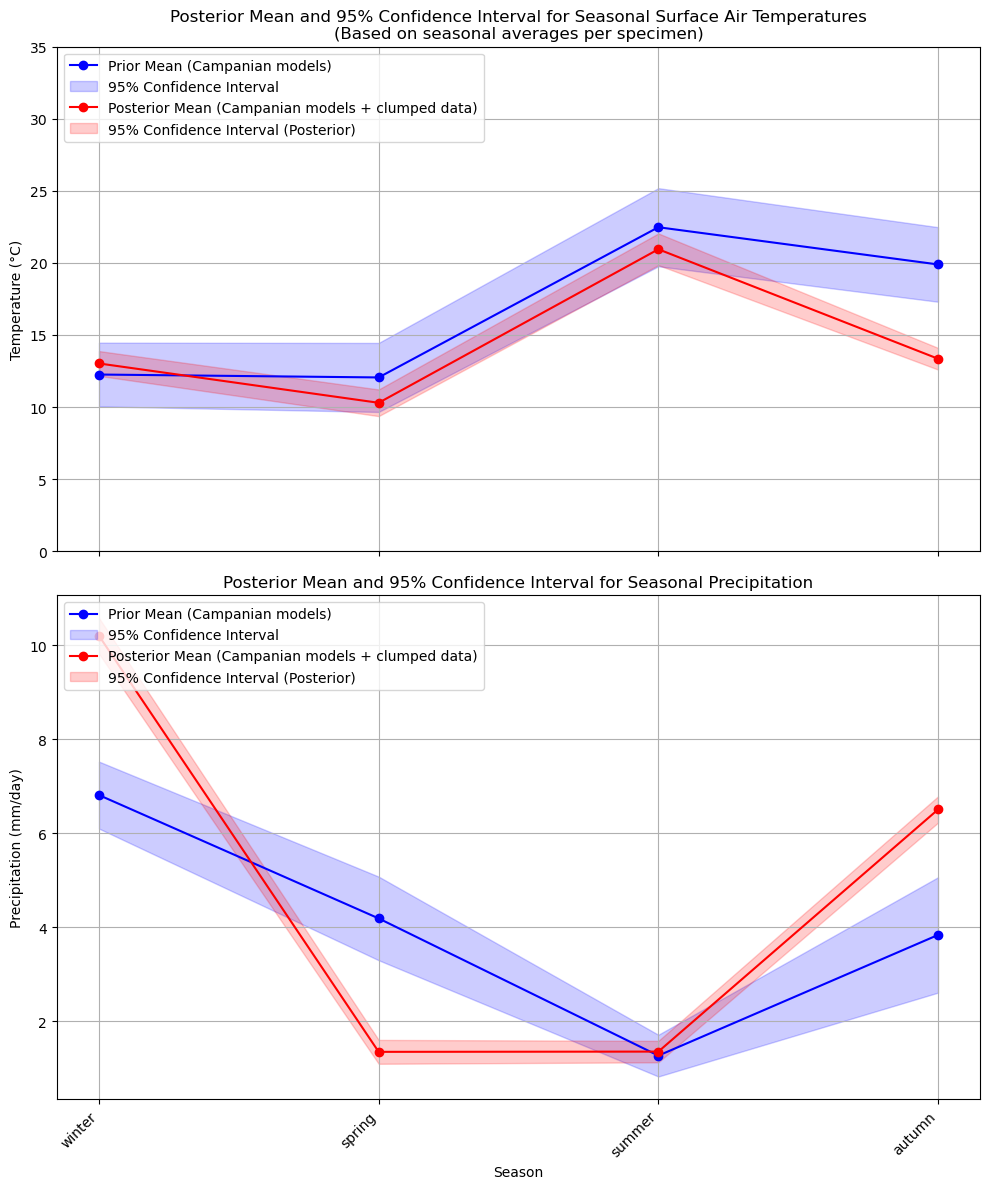

In [45]:
# Convert posterior D47 to temp
mu_post_SAT_D47_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_seasonal_aggregated, sD47 = cov_post_SAT_D47_seasonal_aggregated, return_covar = True)[0]
cov_post_SAT_D47_seasonal_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_seasonal_aggregated, sD47 = cov_post_SAT_D47_seasonal_aggregated, return_covar = True)[1]

# Convert posterior SAT-D47 back to temperature
std_post_SAT_D47_seasonal_aggregated_T = np.nan_to_num(np.sqrt(np.diag(cov_post_SAT_D47_seasonal_aggregated_T)))

fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# --- SAT prior and posterior ---
# PRIOR
axs[0].plot(seasons_scale, mu_prior_SAT_seasonal_original, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[0].fill_between(
    seasons_scale,
    mu_prior_SAT_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SAT_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[0].plot(seasons_scale, mu_post_SAT_D47_seasonal_aggregated_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[0].fill_between(
    seasons_scale,
    mu_post_SAT_D47_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SAT_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SAT_D47_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * std_post_SAT_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[0].set_title('Posterior Mean and 95% Confidence Interval for Seasonal Surface Air Temperatures\n(Based on seasonal averages per specimen)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_ylim(0, 35)
axs[0].legend(loc='upper left')
axs[0].grid(True)

# --- Precipitation prior and posterior ---
# PRIOR
axs[1].plot(seasons_scale, mu_prior_precip_seasonal_original, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[1].fill_between(
    seasons_scale,
    mu_prior_precip_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_precip_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[1].plot(seasons_scale, mu_post_precip_seasonal_aggregated, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[1].fill_between(
    seasons_scale,
    mu_post_precip_seasonal_aggregated - stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_precip_seasonal_aggregated + stats.t.ppf(1 - 0.025, (n_update_seasonal_aggregated_D47 + n_models_seasonal)) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[1].set_title('Posterior Mean and 95% Confidence Interval for Seasonal Precipitation')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Precipitation (mm/day)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

plt.xticks(seasons_scale, seasons, rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior

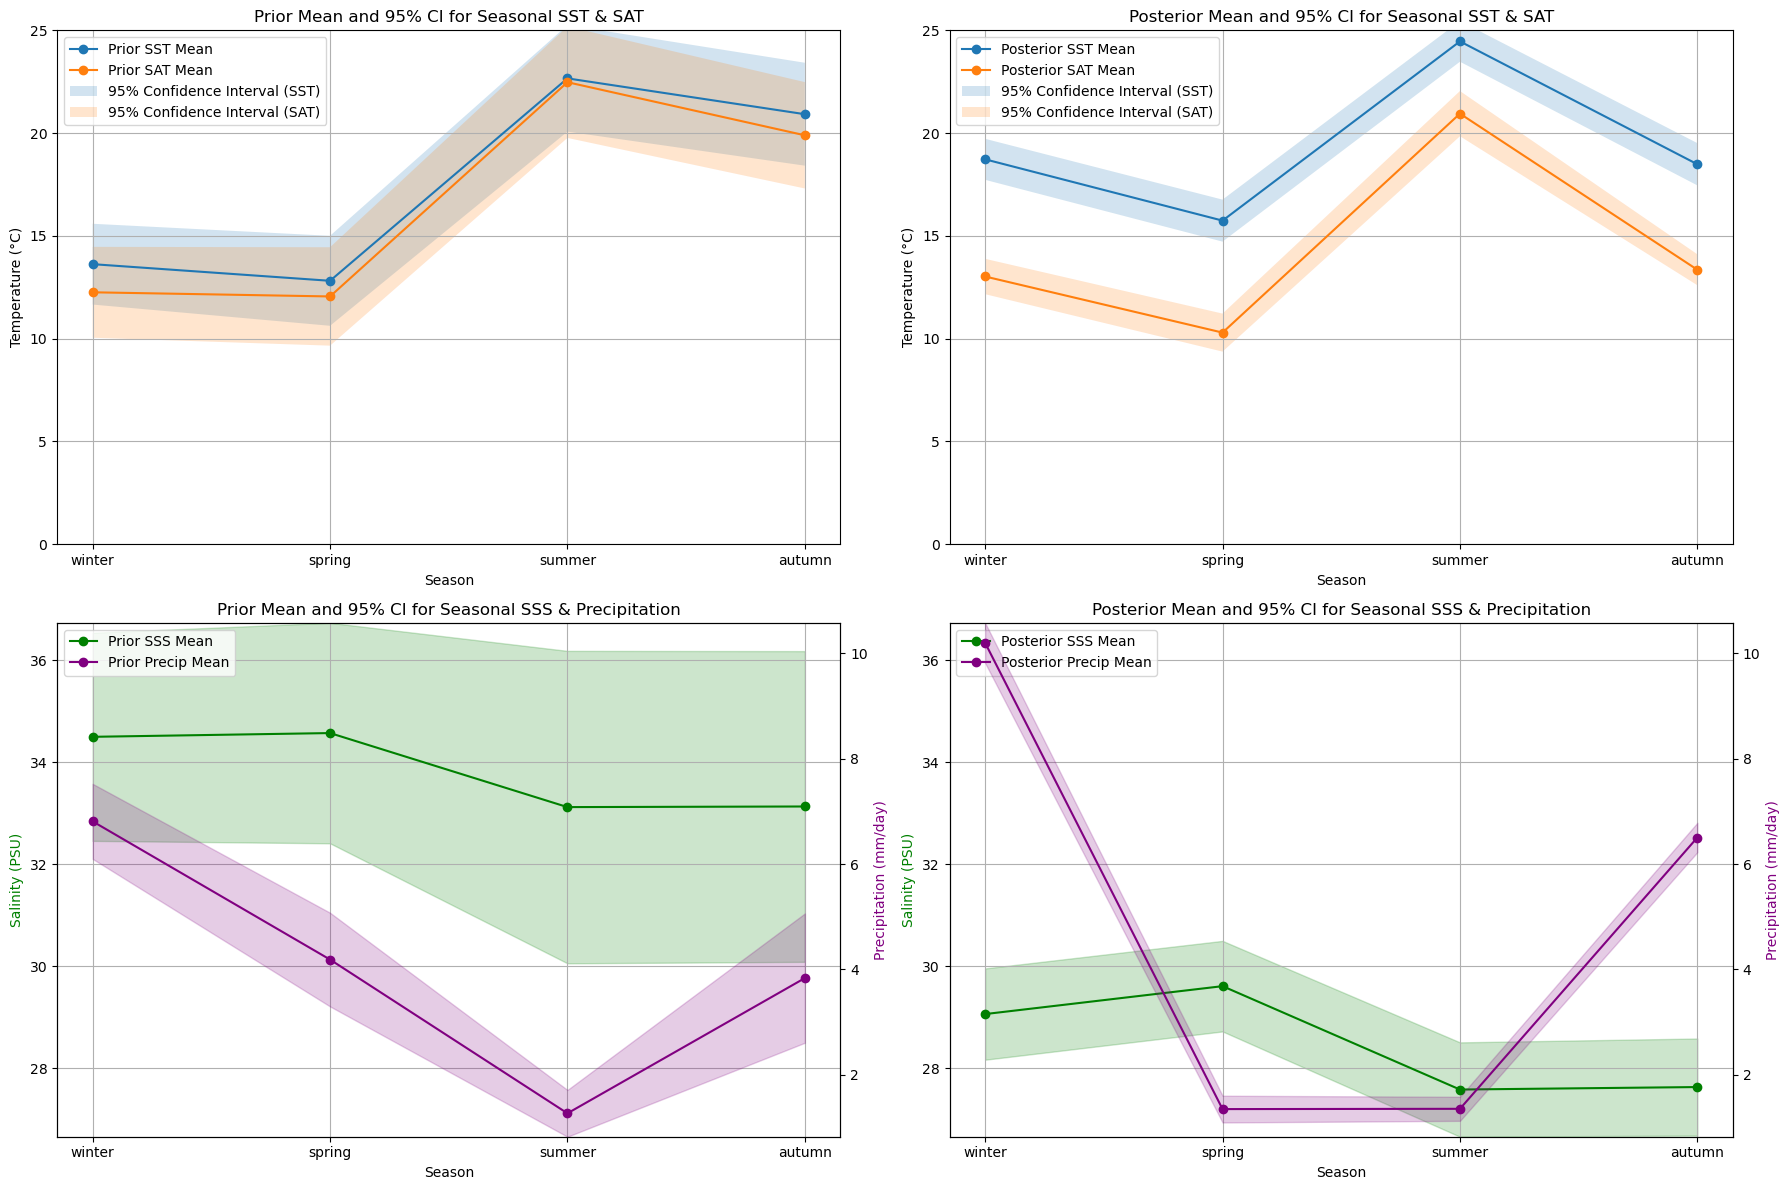

In [46]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(seasons_scale, mu_prior_SST_seasonal, label='Prior SST Mean', marker='o')
axes[0, 0].plot(seasons_scale, mu_prior_SAT_seasonal, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    seasons_scale,
    mu_prior_SST_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SST_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 0].fill_between(
    seasons_scale,
    mu_prior_SAT_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SAT_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 0].set_xticks(seasons_scale)
axes[0, 0].set_xticklabels(seasons)
axes[0, 0].set_title('Prior Mean and 95% CI for Seasonal SST & SAT')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 25)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(seasons_scale, mu_post_SST_D47_seasonal_aggregated_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(seasons_scale, mu_post_SAT_D47_seasonal_aggregated_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    seasons_scale,
    mu_post_SST_D47_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SST_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SST_D47_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SST_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 1].fill_between(
    seasons_scale,
    mu_post_SAT_D47_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SAT_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SAT_D47_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SAT_D47_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 1].set_xticks(seasons_scale)
axes[0, 1].set_xticklabels(seasons)
axes[0, 1].set_title('Posterior Mean and 95% CI for Seasonal SST & SAT')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 25)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal)),
              np.min(mu_post_SSS_d18Ow_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal)))
sss_max = max(np.max(mu_prior_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal)),
              np.max(mu_post_SSS_d18Ow_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal)))
precip_min = min(np.min(mu_prior_precip_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal)),
                 np.min(mu_post_precip_seasonal_aggregated - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal)))
precip_max = max(np.max(mu_prior_precip_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal)),
                 np.max(mu_post_precip_seasonal_aggregated + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal)))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(seasons_scale, mu_prior_SSS_d18Ow_seasonal_T, label='Prior SSS Mean', marker='o', color="green")
ax1.fill_between(
    seasons_scale,
    mu_prior_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    mu_prior_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(seasons_scale, mu_prior_precip_seasonal_original, label='Prior Precip Mean', marker='o', color="purple")
ax2.fill_between(
    seasons_scale,
    mu_prior_precip_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_precip_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(seasons_scale)
ax1.set_xticklabels(seasons)
ax1.set_title('Prior Mean and 95% CI for Seasonal SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + lns2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(seasons_scale, mu_post_SSS_d18Ow_seasonal_aggregated_T, label='Posterior SSS Mean', marker='o', color="green")
ax1.fill_between(
    seasons_scale,
    mu_post_SSS_d18Ow_seasonal_aggregated_T - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_SSS_d18Ow_seasonal_aggregated_T + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_aggregated_T / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(seasons_scale, mu_post_precip_seasonal_aggregated, label='Posterior Precip Mean', marker='o', color="purple")
ax2.fill_between(
    seasons_scale,
    mu_post_precip_seasonal_aggregated - stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    mu_post_precip_seasonal_aggregated + stats.t.ppf(1 - 0.025, n_update_seasonal_aggregated_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal_aggregated)) / np.sqrt(n_update_seasonal_aggregated_D47 + n_models_seasonal),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(seasons_scale)
ax1.set_xticklabels(seasons)
ax1.set_title('Posterior Mean and 95% CI for Seasonal SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + lns2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

plt.tight_layout()
plt.show()

## Seasonal posterior in temperature and salinity domains with data based on individual data
* Aggregate data and model outcomes in 4 seasons based on individual measurements
* Including sclero-dating uncertainty
* Treat each D47 datapoint as an individual datapoint

### Convert seasonal prior, likelihood and posterior to temperature and salinity and plot

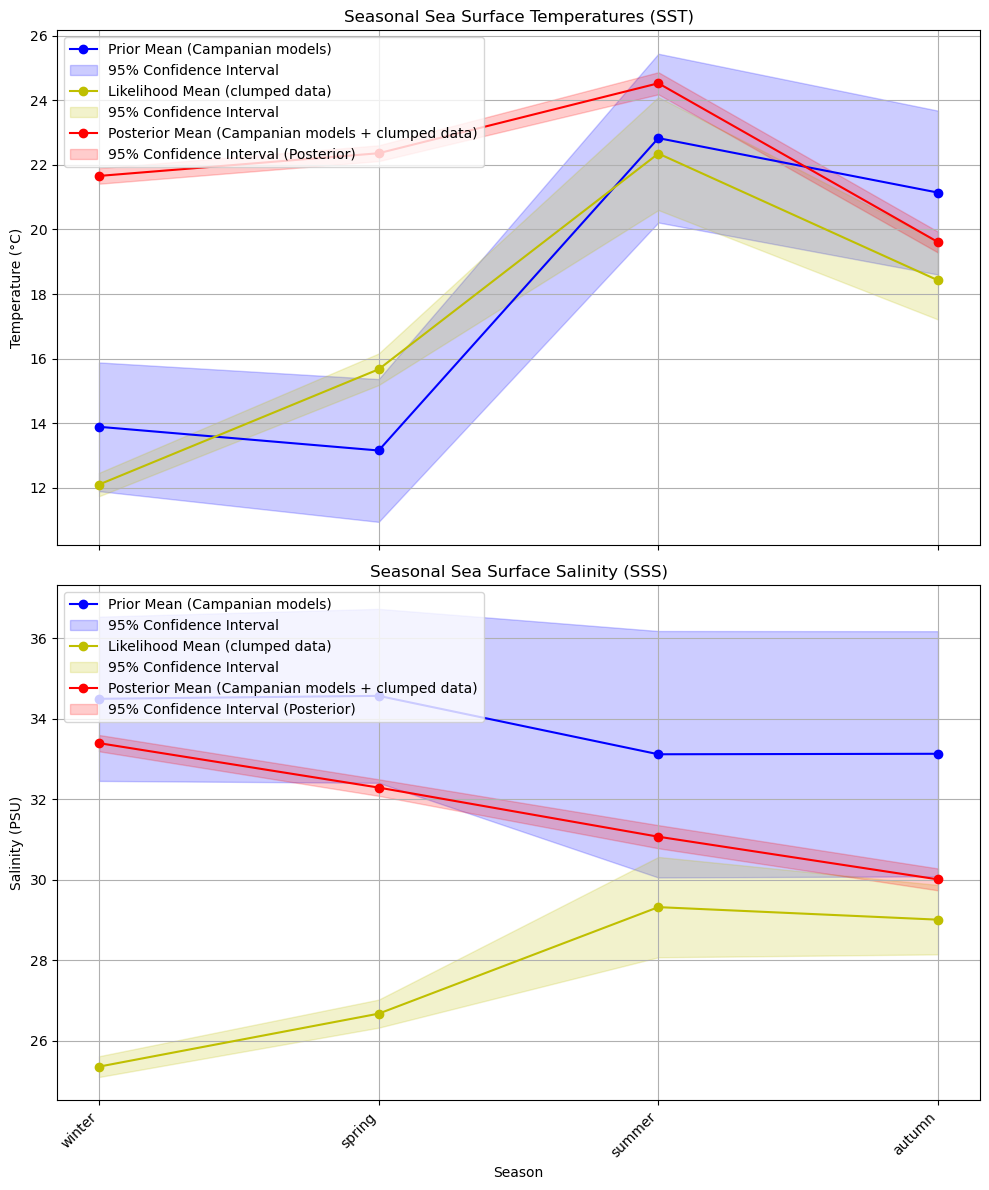

In [47]:
# (Priors are identical to the seasonal priors above)
# Convert likelihood D47 to temp
mu_likelihood_seasonal_T = D47c.OGLS23.T47(D47 = mu_likelihood_seasonal[var_start_D47_seasonal:var_end_D47_seasonal], sD47 = std_likelihood_seasonal[var_start_D47_seasonal:var_end_D47_seasonal], return_covar = True)[0]
cov_likelihood_seasonal_T = D47c.OGLS23.T47(D47 = mu_likelihood_seasonal[var_start_D47_seasonal:var_end_D47_seasonal], sD47 = std_likelihood_seasonal[var_start_D47_seasonal:var_end_D47_seasonal], return_covar = True)[1]

# Convert likelihood d18Oc and temperature to d18Ow (curently not implemented in data tracking function)
mu_likelihood_d18Ow_seasonal_T = mu_likelihood_seasonal[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] - (20.6 - mu_likelihood_seasonal_T) / 4.34 + 0.27
std_likelihood_d18Ow_seasonal_T = std_likelihood_seasonal[var_start_d18Oc_seasonal:var_end_d18Oc_seasonal] + (1 / 4.34) ** 2 * np.sqrt(np.diag(cov_likelihood_seasonal_T))

# Convert likelihood d18Ow to SSS (currently not implemented in data tracking function)
mu_likelihood_SSS_d18Ow_seasonal_T = (mu_likelihood_d18Ow_seasonal_T + 9.300) / 0.274
std_likelihood_SSS_d18Ow_seasonal_T = std_likelihood_d18Ow_seasonal_T / (0.274 ** 2)

# Convert posterior D47 to temp
mu_post_SST_D47_seasonal_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_seasonal, sD47 = cov_post_SST_D47_seasonal, return_covar = True)[0]
cov_post_SST_D47_seasonal_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_seasonal, sD47 = cov_post_SST_D47_seasonal, return_covar = True)[1]

# Convert posterior d18Oc and temperature to d18Ow
mu_post_d18Ow_seasonal_T = mu_post_d18Oc_seasonal - (20.6 - mu_post_SST_D47_seasonal_T) / 4.34 + 0.27
cov_post_d18Ow_seasonal_T = cov_post_d18Oc_seasonal + (1 / 4.34) ** 2 * cov_post_SST_D47_seasonal_T

# Convert posterior d18Ow to SSS
mu_post_SSS_d18Ow_seasonal_T = (mu_post_d18Ow_seasonal_T + 9.300) / 0.274
cov_post_SSS_d18Ow_seasonal_T = cov_post_d18Ow_seasonal_T / (0.274 ** 2)

# Plot in temperature domain
std_prior_SST_D47_seasonal_T = np.sqrt(np.diag(cov_prior_SST_D47_seasonal_T))
std_prior_SSS_d18Ow_seasonal_T = np.sqrt(np.diag(cov_prior_SSS_d18Ow_seasonal_T))
std_likelihood_seasonal_T = np.sqrt(np.diag(cov_likelihood_seasonal_T))
std_post_SST_D47_seasonal_T = np.sqrt(np.diag(cov_post_SST_D47_seasonal_T))
std_post_SSS_d18Ow_seasonal_T = np.sqrt(np.diag(cov_post_SSS_d18Ow_seasonal_T))

# Initiate plot
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# FIRST PANEL: SST Results
# PRIOR
axs[0].plot(seasons_scale, mu_prior_SST_D47_seasonal_T, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[0].fill_between(seasons_scale,
    mu_prior_SST_D47_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_T / np.sqrt(n_models_seasonal),
    mu_prior_SST_D47_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_D47_seasonal_T / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[0].plot(seasons_scale, mu_likelihood_seasonal_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[0].fill_between(seasons_scale,
    mu_likelihood_seasonal_T - stats.t.ppf(1 - 0.025, n_update_seasonal_D47) * std_likelihood_seasonal_T / np.sqrt(n_update_seasonal_D47),
    mu_likelihood_seasonal_T + stats.t.ppf(1 - 0.025, n_update_seasonal_D47) * std_likelihood_seasonal_T / np.sqrt(n_update_seasonal_D47),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[0].plot(seasons_scale, mu_post_SST_D47_seasonal_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[0].fill_between(seasons_scale,
    mu_post_SST_D47_seasonal_T - stats.t.ppf(1 - 0.025, (n_update_seasonal_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    mu_post_SST_D47_seasonal_T + stats.t.ppf(1 - 0.025, (n_update_seasonal_D47 + n_models_seasonal)) * std_post_SST_D47_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SST panel
axs[0].set_title('Seasonal Sea Surface Temperatures (SST)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# SECOND PANEL: SSS Results
# PRIOR
axs[1].plot(seasons_scale, mu_prior_SSS_d18Ow_seasonal_T, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[1].fill_between(seasons_scale,
    mu_prior_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    mu_prior_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[1].plot(seasons_scale, mu_likelihood_SSS_d18Ow_seasonal_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[1].fill_between(seasons_scale,
    mu_likelihood_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_update_seasonal_d18Oc) * std_likelihood_SSS_d18Ow_seasonal_T / np.sqrt(n_update_seasonal_d18Oc),
    mu_likelihood_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_update_seasonal_d18Oc) * std_likelihood_SSS_d18Ow_seasonal_T / np.sqrt(n_update_seasonal_d18Oc),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[1].plot(seasons_scale, mu_post_SSS_d18Ow_seasonal_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[1].fill_between(seasons_scale,
    mu_post_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, (n_update_seasonal_d18Oc + n_models_seasonal)) * std_post_SSS_d18Ow_seasonal_T / np.sqrt(n_update_seasonal_d18Oc + n_models_seasonal),
    mu_post_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, (n_update_seasonal_d18Oc + n_models_seasonal)) * std_post_SSS_d18Ow_seasonal_T / np.sqrt(n_update_seasonal_d18Oc + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SSS panel
axs[1].set_title('Seasonal Sea Surface Salinity (SSS)')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Salinity (PSU)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Shared x-axis labels
plt.xticks(seasons_scale, seasons, rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Plot SAT and precipitation prior and posterior

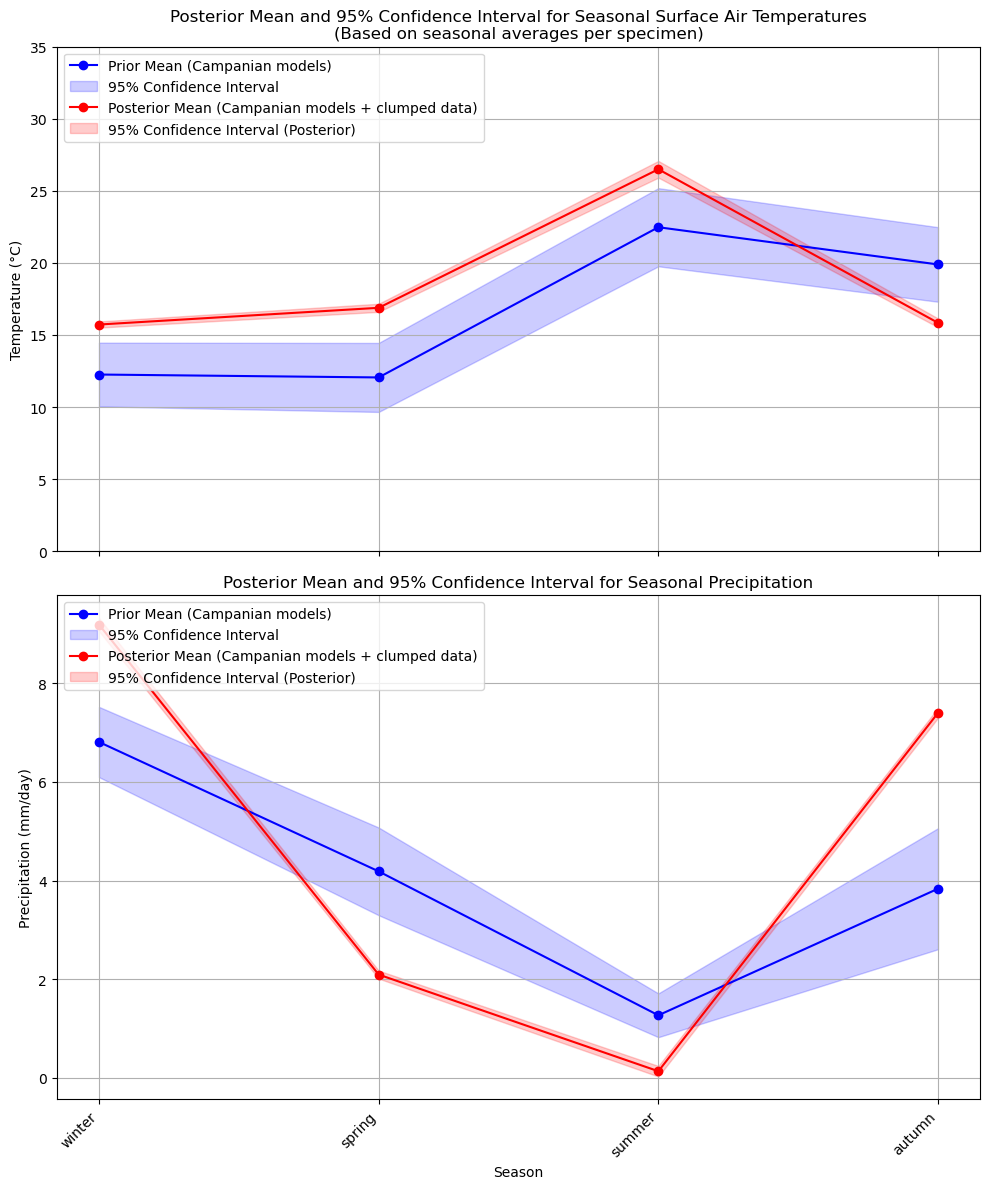

In [48]:
# Convert posterior D47 to temp
mu_post_SAT_D47_seasonal_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_seasonal, sD47 = cov_post_SAT_D47_seasonal, return_covar = True)[0]
cov_post_SAT_D47_seasonal_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_seasonal, sD47 = cov_post_SAT_D47_seasonal, return_covar = True)[1]

# Convert posterior SAT-D47 back to temperature
std_post_SAT_D47_seasonal_T = np.nan_to_num(np.sqrt(np.diag(cov_post_SAT_D47_seasonal_T)))

fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# --- SAT prior and posterior ---
# PRIOR
axs[0].plot(seasons_scale, mu_prior_SAT_seasonal_original, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[0].fill_between(
    seasons_scale,
    mu_prior_SAT_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SAT_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[0].plot(seasons_scale, mu_post_SAT_D47_seasonal_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[0].fill_between(
    seasons_scale,
    mu_post_SAT_D47_seasonal_T - stats.t.ppf(1 - 0.025, (n_update_seasonal_D47 + n_models_seasonal)) * std_post_SAT_D47_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    mu_post_SAT_D47_seasonal_T + stats.t.ppf(1 - 0.025, (n_update_seasonal_D47 + n_models_seasonal)) * std_post_SAT_D47_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[0].set_title('Posterior Mean and 95% Confidence Interval for Seasonal Surface Air Temperatures\n(Based on seasonal averages per specimen)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_ylim(0, 35)
axs[0].legend(loc='upper left')
axs[0].grid(True)

# --- Precipitation prior and posterior ---
# PRIOR
axs[1].plot(seasons_scale, mu_prior_precip_seasonal_original, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[1].fill_between(
    seasons_scale,
    mu_prior_precip_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_precip_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[1].plot(seasons_scale, mu_post_precip_seasonal, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[1].fill_between(
    seasons_scale,
    mu_post_precip_seasonal - stats.t.ppf(1 - 0.025, (n_update_seasonal_D47 + n_models_seasonal)) * np.sqrt(np.diag(cov_post_precip_seasonal)) / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    mu_post_precip_seasonal + stats.t.ppf(1 - 0.025, (n_update_seasonal_D47 + n_models_seasonal)) * np.sqrt(np.diag(cov_post_precip_seasonal)) / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[1].set_title('Posterior Mean and 95% Confidence Interval for Seasonal Precipitation')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Precipitation (mm/day)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

plt.xticks(seasons_scale, seasons, rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior

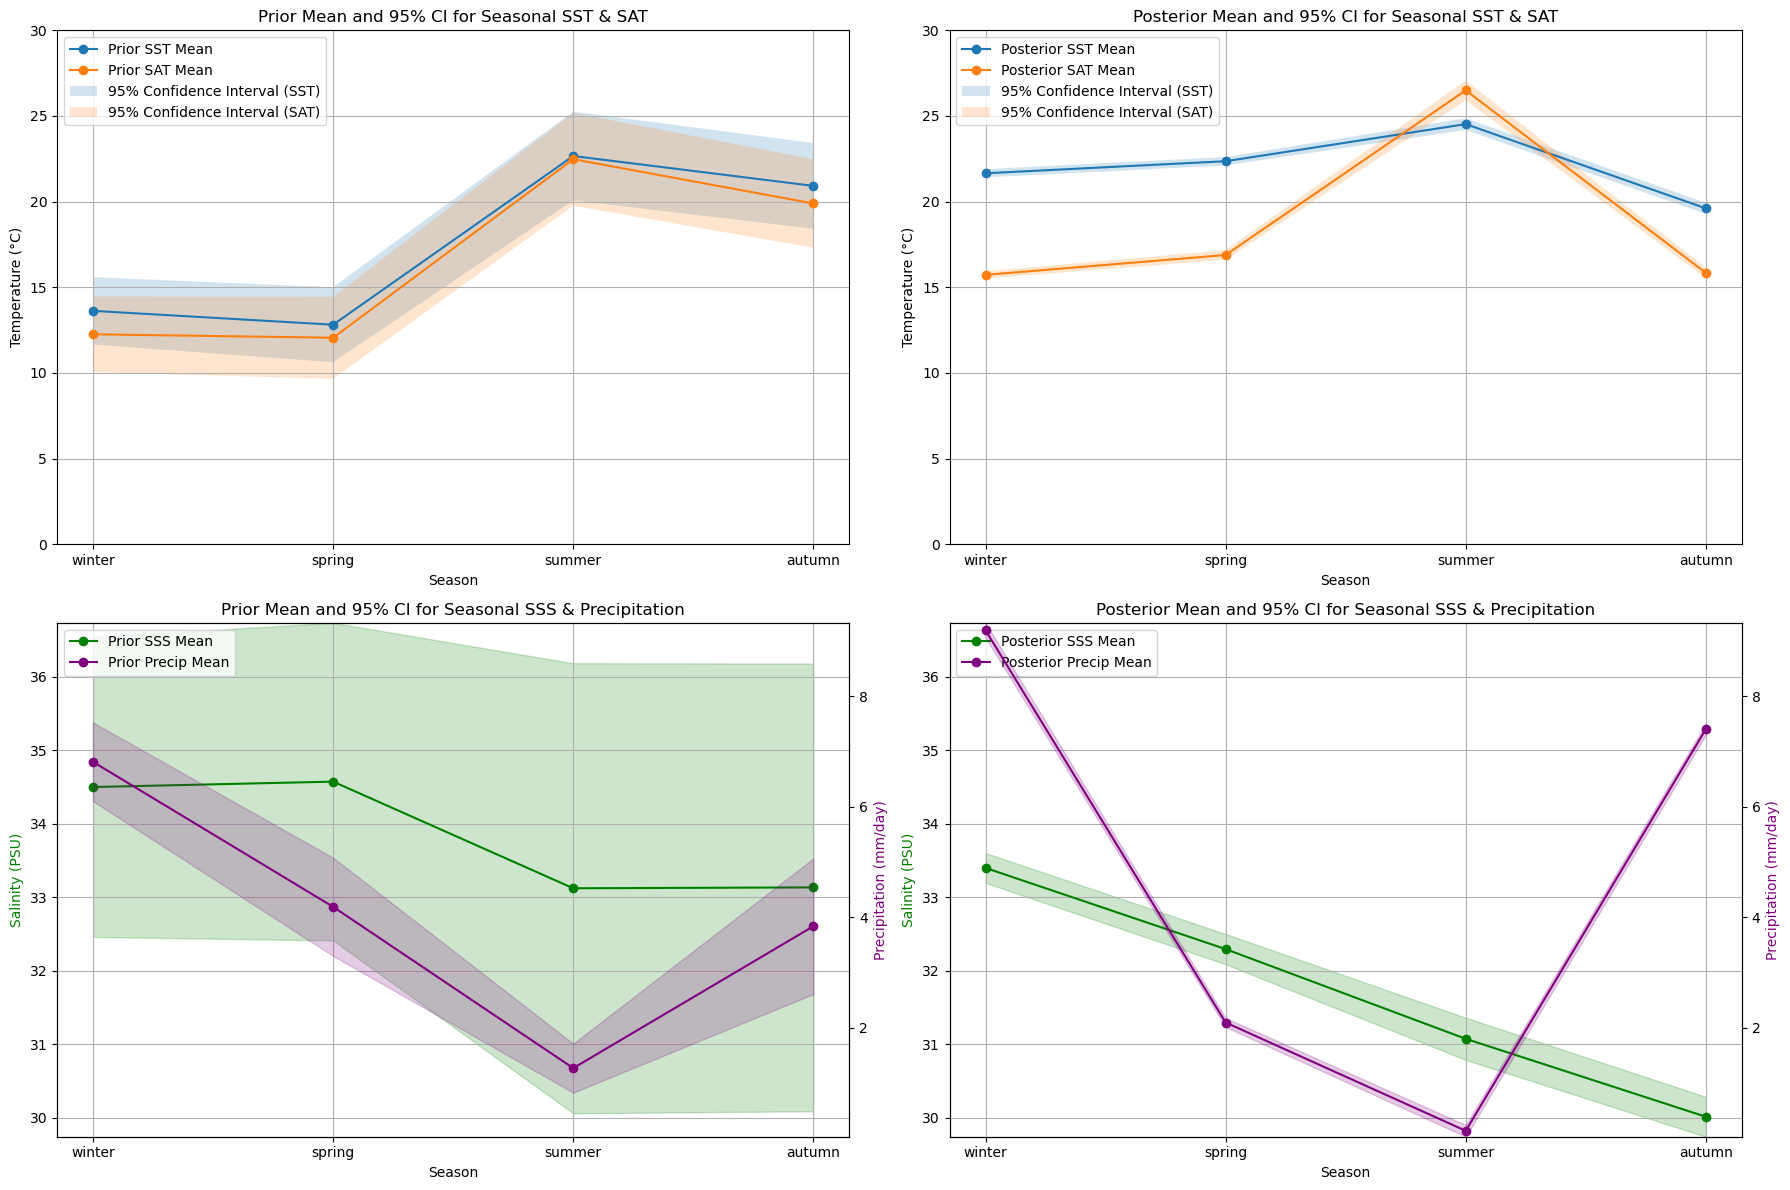

In [49]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(seasons_scale, mu_prior_SST_seasonal, label='Prior SST Mean', marker='o')
axes[0, 0].plot(seasons_scale, mu_prior_SAT_seasonal, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    seasons_scale,
    mu_prior_SST_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SST_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SST_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 0].fill_between(
    seasons_scale,
    mu_prior_SAT_seasonal - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_SAT_seasonal + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SAT_seasonal / np.sqrt(n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 0].set_xticks(seasons_scale)
axes[0, 0].set_xticklabels(seasons)
axes[0, 0].set_title('Prior Mean and 95% CI for Seasonal SST & SAT')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(seasons_scale, mu_post_SST_D47_seasonal_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(seasons_scale, mu_post_SAT_D47_seasonal_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    seasons_scale,
    mu_post_SST_D47_seasonal_T - stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * std_post_SST_D47_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    mu_post_SST_D47_seasonal_T + stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * std_post_SST_D47_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 1].fill_between(
    seasons_scale,
    mu_post_SAT_D47_seasonal_T - stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * std_post_SAT_D47_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    mu_post_SAT_D47_seasonal_T + stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * std_post_SAT_D47_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 1].set_xticks(seasons_scale)
axes[0, 1].set_xticklabels(seasons)
axes[0, 1].set_title('Posterior Mean and 95% CI for Seasonal SST & SAT')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal)),
              np.min(mu_post_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal)))
sss_max = max(np.max(mu_prior_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal)),
              np.max(mu_post_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal)))
precip_min = min(np.min(mu_prior_precip_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal)),
                 np.min(mu_post_precip_seasonal - stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal)) / np.sqrt(n_update_seasonal_D47 + n_models_seasonal)))
precip_max = max(np.max(mu_prior_precip_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal)),
                 np.max(mu_post_precip_seasonal + stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal)) / np.sqrt(n_update_seasonal_D47 + n_models_seasonal)))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(seasons_scale, mu_prior_SSS_d18Ow_seasonal_T, label='Prior SSS Mean', marker='o', color="green")
ax1.fill_between(
    seasons_scale,
    mu_prior_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    mu_prior_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_SSS_d18Ow_seasonal_T / np.sqrt(n_models_seasonal),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(seasons_scale, mu_prior_precip_seasonal_original, label='Prior Precip Mean', marker='o', color="purple")
ax2.fill_between(
    seasons_scale,
    mu_prior_precip_seasonal_original - stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    mu_prior_precip_seasonal_original + stats.t.ppf(1 - 0.025, n_models_seasonal) * std_prior_precip_seasonal / np.sqrt(n_models_seasonal),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(seasons_scale)
ax1.set_xticklabels(seasons)
ax1.set_title('Prior Mean and 95% CI for Seasonal SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + lns2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(seasons_scale, mu_post_SSS_d18Ow_seasonal_T, label='Posterior SSS Mean', marker='o', color="green")
ax1.fill_between(
    seasons_scale,
    mu_post_SSS_d18Ow_seasonal_T - stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    mu_post_SSS_d18Ow_seasonal_T + stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * std_post_SSS_d18Ow_seasonal_T / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(seasons_scale, mu_post_precip_seasonal, label='Posterior Precip Mean', marker='o', color="purple")
ax2.fill_between(
    seasons_scale,
    mu_post_precip_seasonal - stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal)) / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    mu_post_precip_seasonal + stats.t.ppf(1 - 0.025, n_update_seasonal_D47 + n_models_seasonal) * np.sqrt(np.diag(cov_post_precip_seasonal)) / np.sqrt(n_update_seasonal_D47 + n_models_seasonal),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(seasons_scale)
ax1.set_xticklabels(seasons)
ax1.set_title('Posterior Mean and 95% CI for Seasonal SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + lns2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

plt.tight_layout()
plt.show()

# POSTERIOR - MONTHLY

## Updated monthly prior in SST and SSS domain
* Data and model outcomes aggregated in 12 months
* No sclero-dating uncertainty
* D47 data aggregated as individual datapoints

### Convert monthly prior, likelihood and posterior to temperature and plot

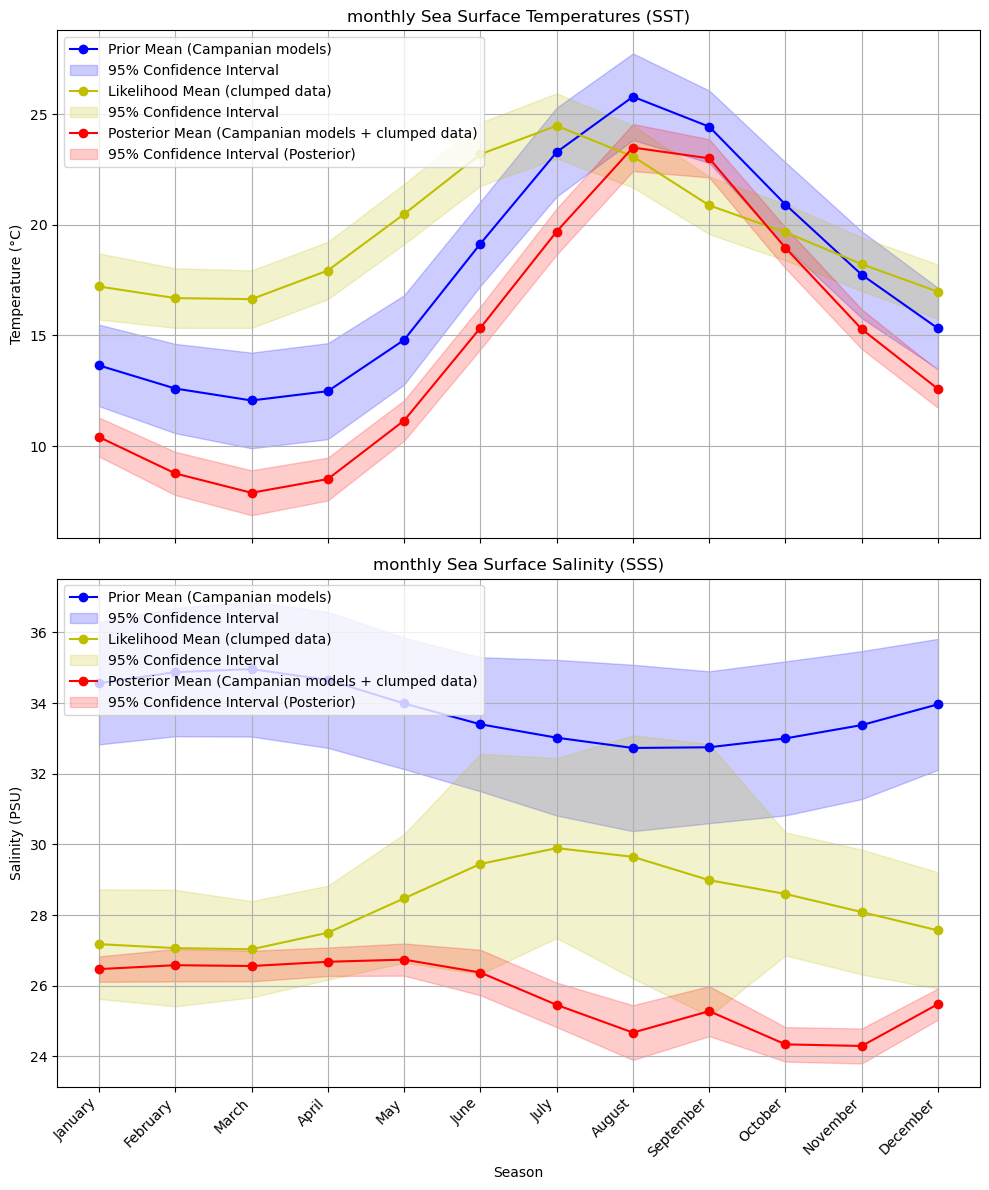

In [50]:
# Convert prior D47 to temp
mu_prior_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_prior_SST_D47_monthly_original, sD47 = cov_prior_SST_D47_monthly_original, return_covar = True)[0]
cov_prior_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_prior_SST_D47_monthly_original, sD47 = cov_prior_SST_D47_monthly_original, return_covar = True)[1]

# Convert prior d18Oc and temperature to d18Ow
mu_prior_d18Ow_monthly_T = mu_prior_d18Oc_monthly_original - (20.6 - mu_prior_SST_D47_monthly_T) / 4.34 + 0.27
cov_prior_d18Ow_monthly_T = cov_prior_d18Oc_monthly_original + (1 / 4.34) ** 2 * cov_prior_SST_D47_monthly_T

# Convert prior d18Ow to SSS
mu_prior_SSS_d18Ow_monthly_T = (mu_prior_d18Ow_monthly_T + 9.300) / 0.274
cov_prior_SSS_d18Ow_monthly_T = cov_prior_d18Ow_monthly_T / (0.274 ** 2)

# Convert likelihood D47 to temp
mu_likelihood_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[0]
cov_likelihood_monthly_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly_aggregated[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[1]

# Convert likelihood d18Oc and temperature to d18Ow (curently not implemented in data tracking function)
mu_likelihood_d18Ow_monthly_T = mu_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - (20.6 - mu_likelihood_monthly_aggregated_T) / 4.34 + 0.27
std_likelihood_d18Ow_monthly_T = std_likelihood_monthly_aggregated[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + (1 / 4.34) ** 2 * np.sqrt(np.diag(cov_likelihood_monthly_T))

# Convert likelihood d18Ow to SSS (currently not implemented in data tracking function)
mu_likelihood_SSS_d18Ow_monthly_T = (mu_likelihood_d18Ow_monthly_T + 9.300) / 0.274
std_likelihood_SSS_d18Ow_monthly_T = std_likelihood_d18Ow_monthly_T / (0.274 ** 2)

# Convert posterior D47 to temp
mu_post_SST_D47_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated, sD47 = cov_post_SST_D47_monthly_aggregated, return_covar = True)[0]
cov_post_SST_D47_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly_aggregated, sD47 = cov_post_SST_D47_monthly_aggregated, return_covar = True)[1]

# Convert posterior d18Oc and temperature to d18Ow
mu_post_d18Ow_monthly_aggregated_T = mu_post_d18Oc_monthly_aggregated - (20.6 - mu_post_SST_D47_monthly_aggregated_T) / 4.34 + 0.27
cov_post_d18Ow_monthly_aggregated_T = cov_post_d18Oc_monthly_aggregated + (1 / 4.34) ** 2 * cov_post_SST_D47_monthly_aggregated_T

# Convert posterior d18Ow to SSS
mu_post_SSS_d18Ow_monthly_aggregated_T = (mu_post_d18Ow_monthly_aggregated_T + 9.300) / 0.274
cov_post_SSS_d18Ow_monthly_aggregated_T = cov_post_d18Ow_monthly_aggregated_T / (0.274 ** 2)

# Plot in temperature domain
std_prior_SST_D47_monthly_T = np.sqrt(np.diag(cov_prior_SST_D47_monthly_T))
std_prior_SSS_d18Ow_monthly_T = np.sqrt(np.diag(cov_prior_SSS_d18Ow_monthly_T))
std_likelihood_monthly_aggregated_T = np.sqrt(np.diag(cov_likelihood_monthly_T))
std_post_SST_D47_monthly_aggregated_T = np.sqrt(np.diag(cov_post_SST_D47_monthly_aggregated_T))
std_post_SSS_d18Ow_monthly_aggregated_T = np.sqrt(np.diag(cov_post_SSS_d18Ow_monthly_aggregated_T))
# Initiate plot
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# FIRST PANEL: SST Results
# PRIOR
axs[0].plot(months_scale, mu_prior_SST_D47_monthly_T, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[0].fill_between(months_scale,
    mu_prior_SST_D47_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_T / np.sqrt(n_models_monthly),
    mu_prior_SST_D47_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_T / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[0].plot(months_scale, mu_likelihood_monthly_aggregated_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[0].fill_between(months_scale,
    mu_likelihood_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47) * std_likelihood_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47),
    mu_likelihood_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47) * std_likelihood_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[0].plot(months_scale, mu_post_SST_D47_monthly_aggregated_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[0].fill_between(months_scale,
    mu_post_SST_D47_monthly_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SST_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SST panel
axs[0].set_title('monthly Sea Surface Temperatures (SST)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# SECOND PANEL: SSS Results
# PRIOR
axs[1].plot(months_scale, mu_prior_SSS_d18Ow_monthly_T, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[1].fill_between(months_scale,
    mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[1].plot(months_scale, mu_likelihood_SSS_d18Ow_monthly_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[1].fill_between(months_scale,
    mu_likelihood_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_update_monthly_d18Oc) * std_likelihood_SSS_d18Ow_monthly_T / np.sqrt(n_update_monthly_d18Oc),
    mu_likelihood_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_update_monthly_d18Oc) * std_likelihood_SSS_d18Ow_monthly_T / np.sqrt(n_update_monthly_d18Oc),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[1].plot(months_scale, mu_post_SSS_d18Ow_monthly_aggregated_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[1].fill_between(months_scale,
    mu_post_SSS_d18Ow_monthly_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_monthly_d18Oc + n_models_monthly)) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_d18Oc + n_models_monthly),
    mu_post_SSS_d18Ow_monthly_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_monthly_d18Oc + n_models_monthly)) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_d18Oc + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SSS panel
axs[1].set_title('monthly Sea Surface Salinity (SSS)')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Salinity (PSU)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Shared x-axis labels
plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Plot SAT and precipitation prior and posterior

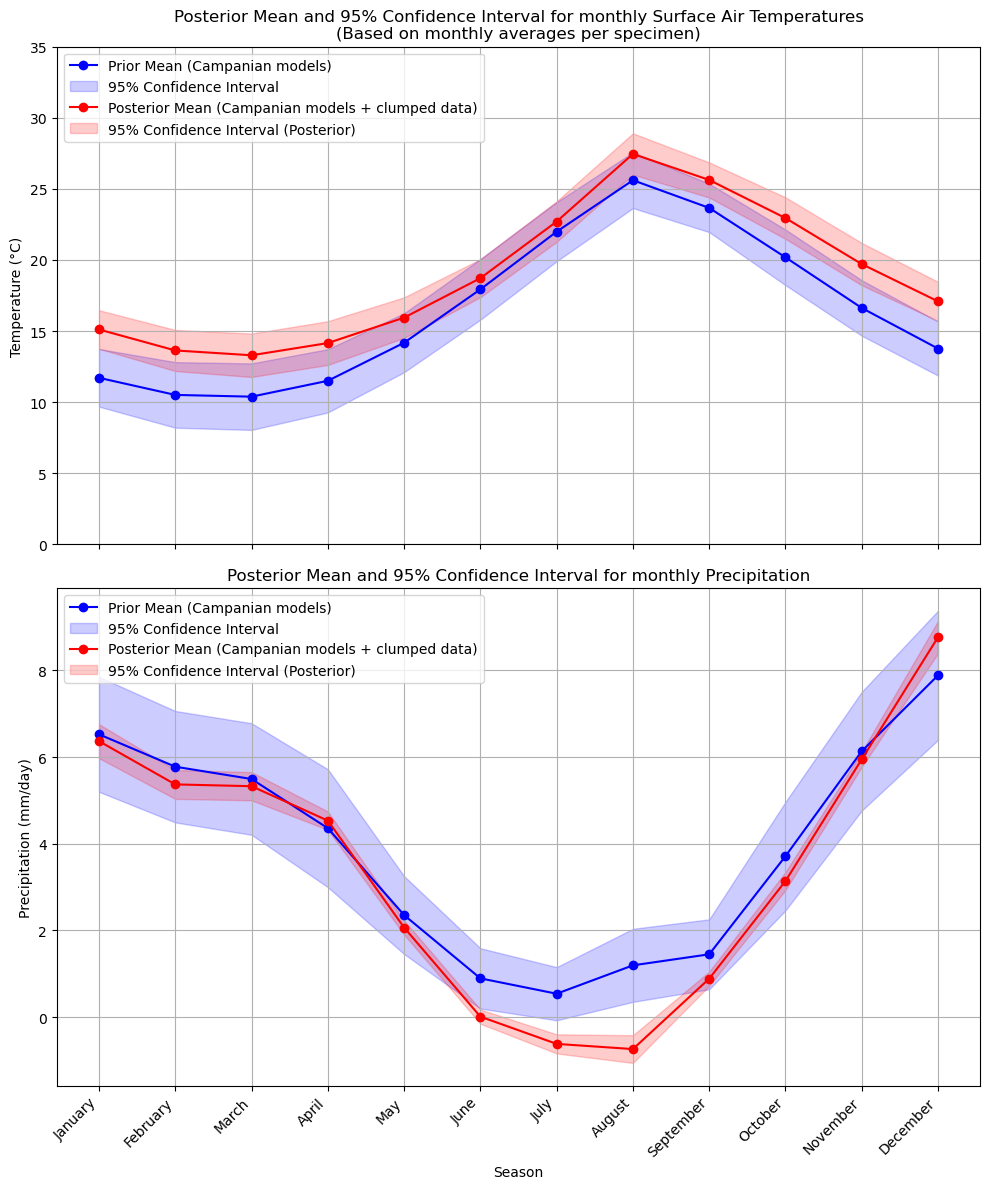

In [51]:
# Convert posterior D47 to temp
mu_post_SAT_D47_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated, sD47 = cov_post_SAT_D47_monthly_aggregated, return_covar = True)[0]
cov_post_SAT_D47_monthly_aggregated_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly_aggregated, sD47 = cov_post_SAT_D47_monthly_aggregated, return_covar = True)[1]

# Convert posterior SAT-D47 back to temperature
std_post_SAT_D47_monthly_aggregated_T = np.nan_to_num(np.sqrt(np.diag(cov_post_SAT_D47_monthly_aggregated_T)))

fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# --- SAT prior and posterior ---
# PRIOR
axs[0].plot(months_scale, mu_prior_SAT_monthly_original, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[0].fill_between(
    months_scale,
    mu_prior_SAT_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    mu_prior_SAT_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[0].plot(months_scale, mu_post_SAT_D47_monthly_aggregated_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[0].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_aggregated_T - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SAT_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SAT_D47_monthly_aggregated_T + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * std_post_SAT_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[0].set_title('Posterior Mean and 95% Confidence Interval for monthly Surface Air Temperatures\n(Based on monthly averages per specimen)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_ylim(0, 35)
axs[0].legend(loc='upper left')
axs[0].grid(True)

# --- Precipitation prior and posterior ---
# PRIOR
axs[1].plot(months_scale, mu_prior_precip_monthly_original, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[1].fill_between(
    months_scale,
    mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[1].plot(months_scale, mu_post_precip_monthly_aggregated, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[1].fill_between(
    months_scale,
    mu_post_precip_monthly_aggregated - stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_precip_monthly_aggregated + stats.t.ppf(1 - 0.025, (n_update_monthly_aggregated_D47 + n_models_monthly)) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[1].set_title('Posterior Mean and 95% Confidence Interval for monthly Precipitation')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Precipitation (mm/day)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior

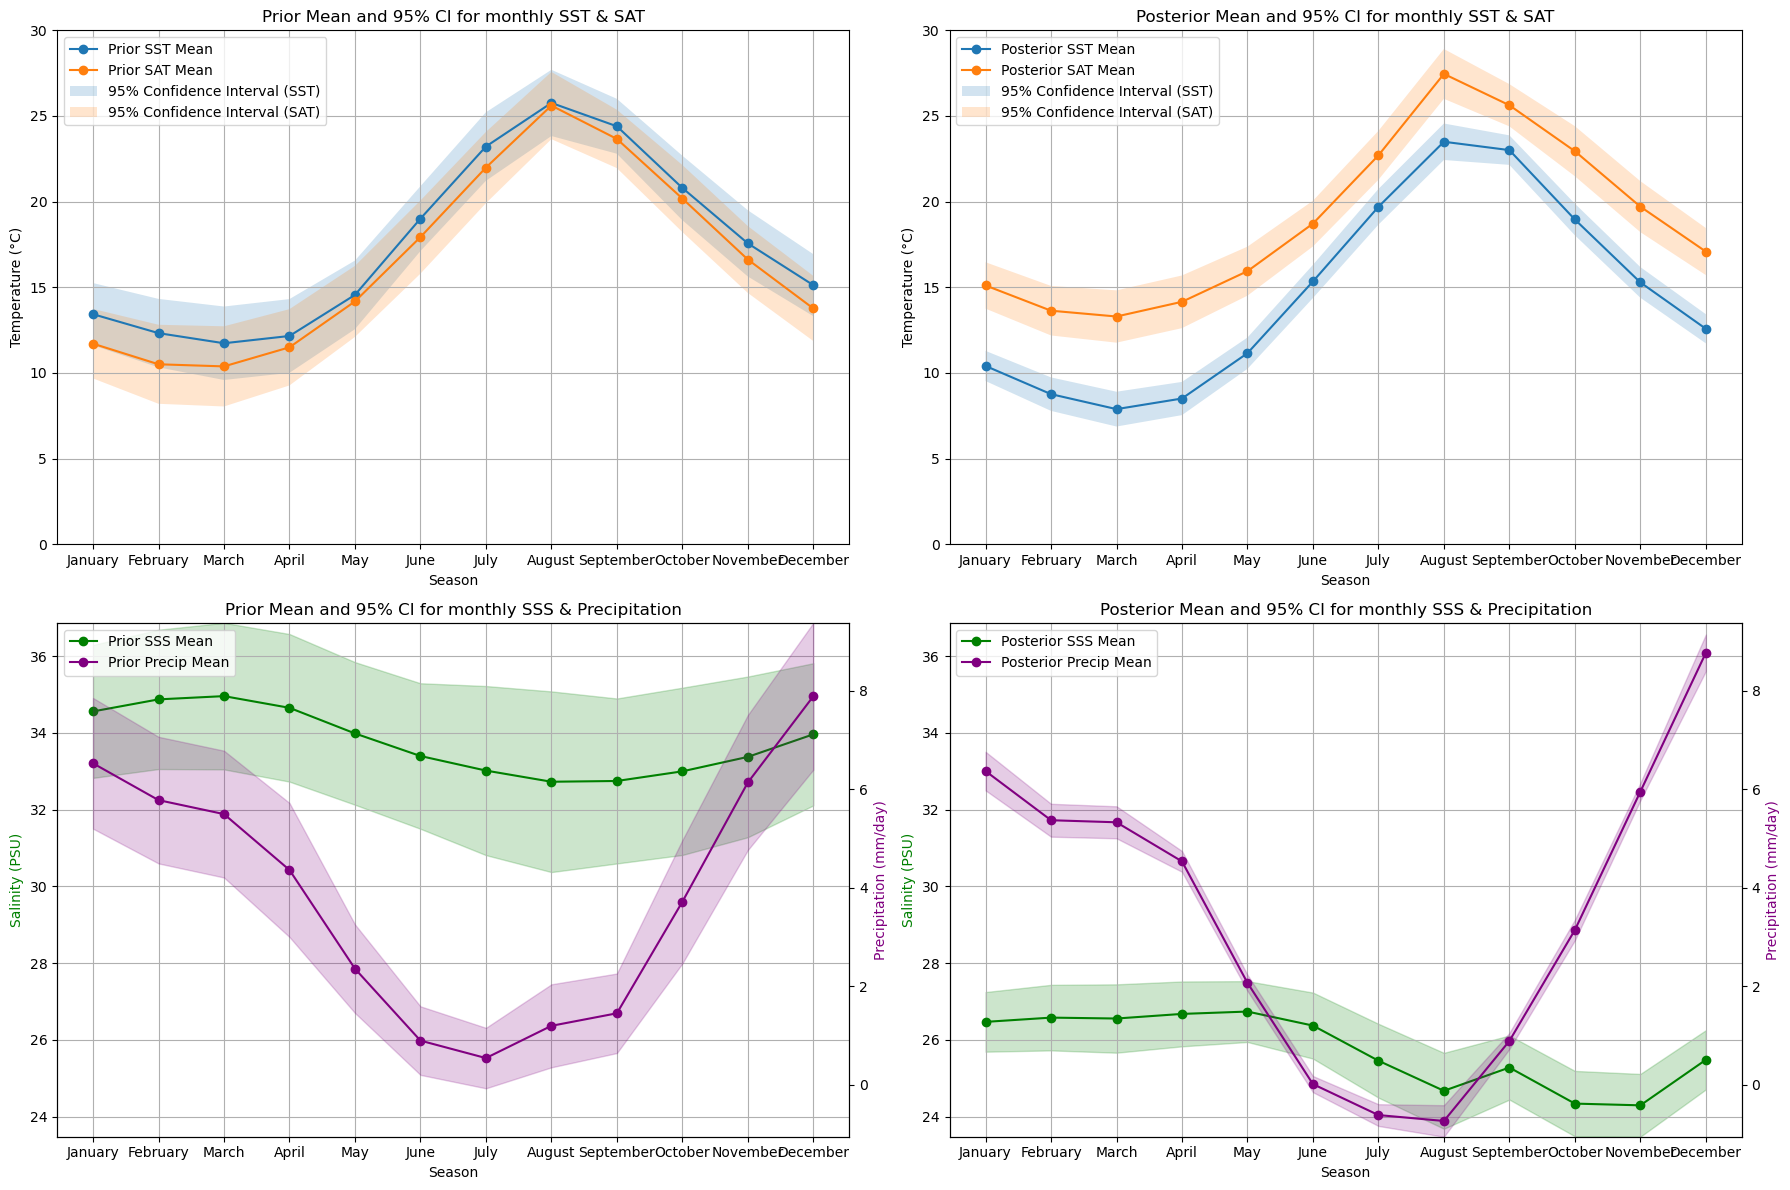

In [52]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o')
axes[0, 0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SST_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    mu_prior_SST_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    mu_prior_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names)
axes[0, 0].set_title('Prior Mean and 95% CI for monthly SST & SAT')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(months_scale, mu_post_SST_D47_monthly_aggregated_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(months_scale, mu_post_SAT_D47_monthly_aggregated_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    months_scale,
    mu_post_SST_D47_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SST_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SST_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 1].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SAT_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SAT_D47_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SAT_D47_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names)
axes[0, 1].set_title('Posterior Mean and 95% CI for monthly SST & SAT')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly)),
              np.min(mu_post_SSS_d18Ow_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly)))
sss_max = max(np.max(mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly)),
              np.max(mu_post_SSS_d18Ow_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly)))
precip_min = min(np.min(mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly)),
                 np.min(mu_post_precip_monthly_aggregated - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly)))
precip_max = max(np.max(mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly)),
                 np.max(mu_post_precip_monthly_aggregated + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly)))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_prior_SSS_d18Ow_monthly_T, label='Prior SSS Mean', marker='o', color="green")
ax1.fill_between(
    months_scale,
    mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(months_scale, mu_prior_precip_monthly_original, label='Prior Precip Mean', marker='o', color="purple")
ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names)
ax1.set_title('Prior Mean and 95% CI for monthly SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + lns2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_post_SSS_d18Ow_monthly_aggregated_T, label='Posterior SSS Mean', marker='o', color="green")
ax1.fill_between(
    months_scale,
    mu_post_SSS_d18Ow_monthly_aggregated_T - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_SSS_d18Ow_monthly_aggregated_T + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_aggregated_T / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(months_scale, mu_post_precip_monthly_aggregated, label='Posterior Precip Mean', marker='o', color="purple")
ax2.fill_between(
    months_scale,
    mu_post_precip_monthly_aggregated - stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    mu_post_precip_monthly_aggregated + stats.t.ppf(1 - 0.025, n_update_monthly_aggregated_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly_aggregated)) / np.sqrt(n_update_monthly_aggregated_D47 + n_models_monthly),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names)
ax1.set_title('Posterior Mean and 95% CI for monthly SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + lns2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

plt.tight_layout()
plt.show()

## Monthly posterior in temperature and salinity domains with data based on individual data
* Aggregate data and model outcomes in 12 months based on individual measurements
* Including sclero-dating uncertainty
* Treat each D47 datapoint as an individual datapoint
* FIXME: Time offset between d18Oc and D47 seasonality seems to throw off results (explore implementing d18Oc uncertainty)

### Convert seasonal prior, likelihood and posterior to temperature and salinity and plot

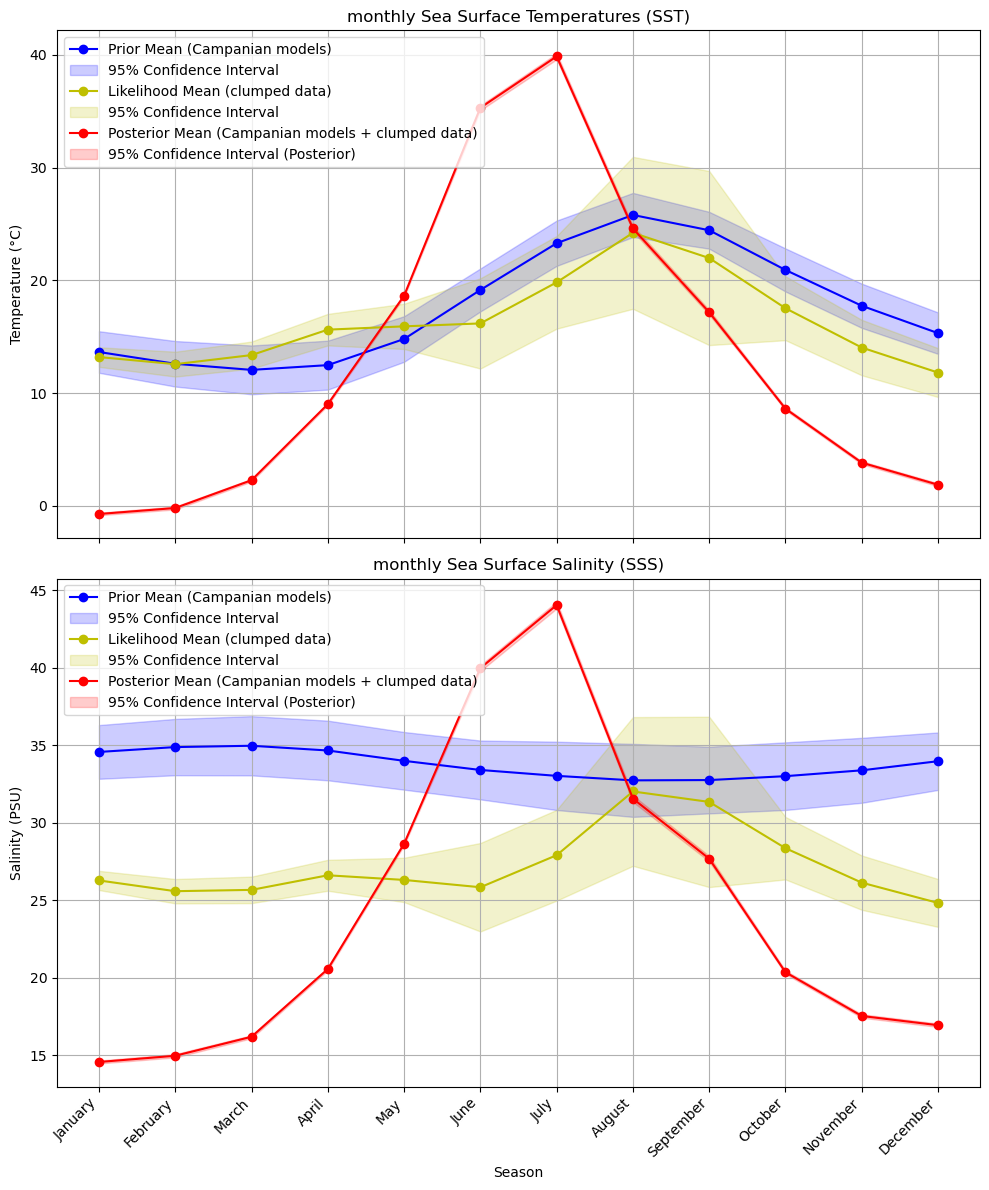

In [53]:
# (Priors are identical to the monthly priors above)
# Convert likelihood D47 to temp
mu_likelihood_monthly_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[0]
cov_likelihood_monthly_T = D47c.OGLS23.T47(D47 = mu_likelihood_monthly[var_start_D47_monthly:var_end_D47_monthly], sD47 = std_likelihood_monthly[var_start_D47_monthly:var_end_D47_monthly], return_covar = True)[1]

# Convert likelihood d18Oc and temperature to d18Ow (curently not implemented in data tracking function)
mu_likelihood_d18Ow_monthly_T = mu_likelihood_monthly[var_start_d18Oc_monthly:var_end_d18Oc_monthly] - (20.6 - mu_likelihood_monthly_T) / 4.34 + 0.27
std_likelihood_d18Ow_monthly_T = std_likelihood_monthly[var_start_d18Oc_monthly:var_end_d18Oc_monthly] + (1 / 4.34) ** 2 * np.sqrt(np.diag(cov_likelihood_monthly_T))

# Convert likelihood d18Ow to SSS (currently not implemented in data tracking function)
mu_likelihood_SSS_d18Ow_monthly_T = (mu_likelihood_d18Ow_monthly_T + 9.300) / 0.274
std_likelihood_SSS_d18Ow_monthly_T = std_likelihood_d18Ow_monthly_T / (0.274 ** 2)

# Convert posterior D47 to temp
mu_post_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly, sD47 = cov_post_SST_D47_monthly, return_covar = True)[0]
cov_post_SST_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_post_SST_D47_monthly, sD47 = cov_post_SST_D47_monthly, return_covar = True)[1]

# Convert posterior d18Oc and temperature to d18Ow
mu_post_d18Ow_monthly_T = mu_post_d18Oc_monthly - (20.6 - mu_post_SST_D47_monthly_T) / 4.34 + 0.27
cov_post_d18Ow_monthly_T = cov_post_d18Oc_monthly + (1 / 4.34) ** 2 * cov_post_SST_D47_monthly_T

# Convert posterior d18Ow to SSS
mu_post_SSS_d18Ow_monthly_T = (mu_post_d18Ow_monthly_T + 9.300) / 0.274
cov_post_SSS_d18Ow_monthly_T = cov_post_d18Ow_monthly_T / (0.274 ** 2)

# Plot in temperature domain
std_prior_SST_D47_monthly_T = np.sqrt(np.diag(cov_prior_SST_D47_monthly_T))
std_prior_SSS_d18Ow_monthly_T = np.sqrt(np.diag(cov_prior_SSS_d18Ow_monthly_T))
std_likelihood_monthly_T = np.sqrt(np.diag(cov_likelihood_monthly_T))
std_post_SST_D47_monthly_T = np.sqrt(np.diag(cov_post_SST_D47_monthly_T))
std_post_SSS_d18Ow_monthly_T = np.sqrt(np.diag(cov_post_SSS_d18Ow_monthly_T))

# Initiate plot
fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# FIRST PANEL: SST Results
# PRIOR
axs[0].plot(months_scale, mu_prior_SST_D47_monthly_T, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[0].fill_between(months_scale,
    mu_prior_SST_D47_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_T / np.sqrt(n_models_monthly),
    mu_prior_SST_D47_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_D47_monthly_T / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[0].plot(months_scale, mu_likelihood_monthly_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[0].fill_between(months_scale,
    mu_likelihood_monthly_T - stats.t.ppf(1 - 0.025, n_update_monthly_D47) * std_likelihood_monthly_T / np.sqrt(n_update_monthly_D47),
    mu_likelihood_monthly_T + stats.t.ppf(1 - 0.025, n_update_monthly_D47) * std_likelihood_monthly_T / np.sqrt(n_update_monthly_D47),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[0].plot(months_scale, mu_post_SST_D47_monthly_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[0].fill_between(months_scale,
    mu_post_SST_D47_monthly_T - stats.t.ppf(1 - 0.025, (n_update_monthly_D47 + n_models_monthly)) * std_post_SST_D47_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_T + stats.t.ppf(1 - 0.025, (n_update_monthly_D47 + n_models_monthly)) * std_post_SST_D47_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SST panel
axs[0].set_title('monthly Sea Surface Temperatures (SST)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].legend(loc='upper left')
axs[0].grid(True)

# SECOND PANEL: SSS Results
# PRIOR
axs[1].plot(months_scale, mu_prior_SSS_d18Ow_monthly_T, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[1].fill_between(months_scale,
    mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval')

# LIKELIHOOD
axs[1].plot(months_scale, mu_likelihood_SSS_d18Ow_monthly_T, label='Likelihood Mean (clumped data)', color='y', marker='o')
axs[1].fill_between(months_scale,
    mu_likelihood_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_update_monthly_d18Oc) * std_likelihood_SSS_d18Ow_monthly_T / np.sqrt(n_update_monthly_d18Oc),
    mu_likelihood_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_update_monthly_d18Oc) * std_likelihood_SSS_d18Ow_monthly_T / np.sqrt(n_update_monthly_d18Oc),
    color='y', alpha=0.2, label='95% Confidence Interval')

# POSTERIOR
axs[1].plot(months_scale, mu_post_SSS_d18Ow_monthly_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[1].fill_between(months_scale,
    mu_post_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, (n_update_monthly_d18Oc + n_models_monthly)) * std_post_SSS_d18Ow_monthly_T / np.sqrt(n_update_monthly_d18Oc + n_models_monthly),
    mu_post_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, (n_update_monthly_d18Oc + n_models_monthly)) * std_post_SSS_d18Ow_monthly_T / np.sqrt(n_update_monthly_d18Oc + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)')

# Layout for SSS panel
axs[1].set_title('monthly Sea Surface Salinity (SSS)')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Salinity (PSU)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

# Shared x-axis labels
plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Plot SAT and precipitation prior and posterior

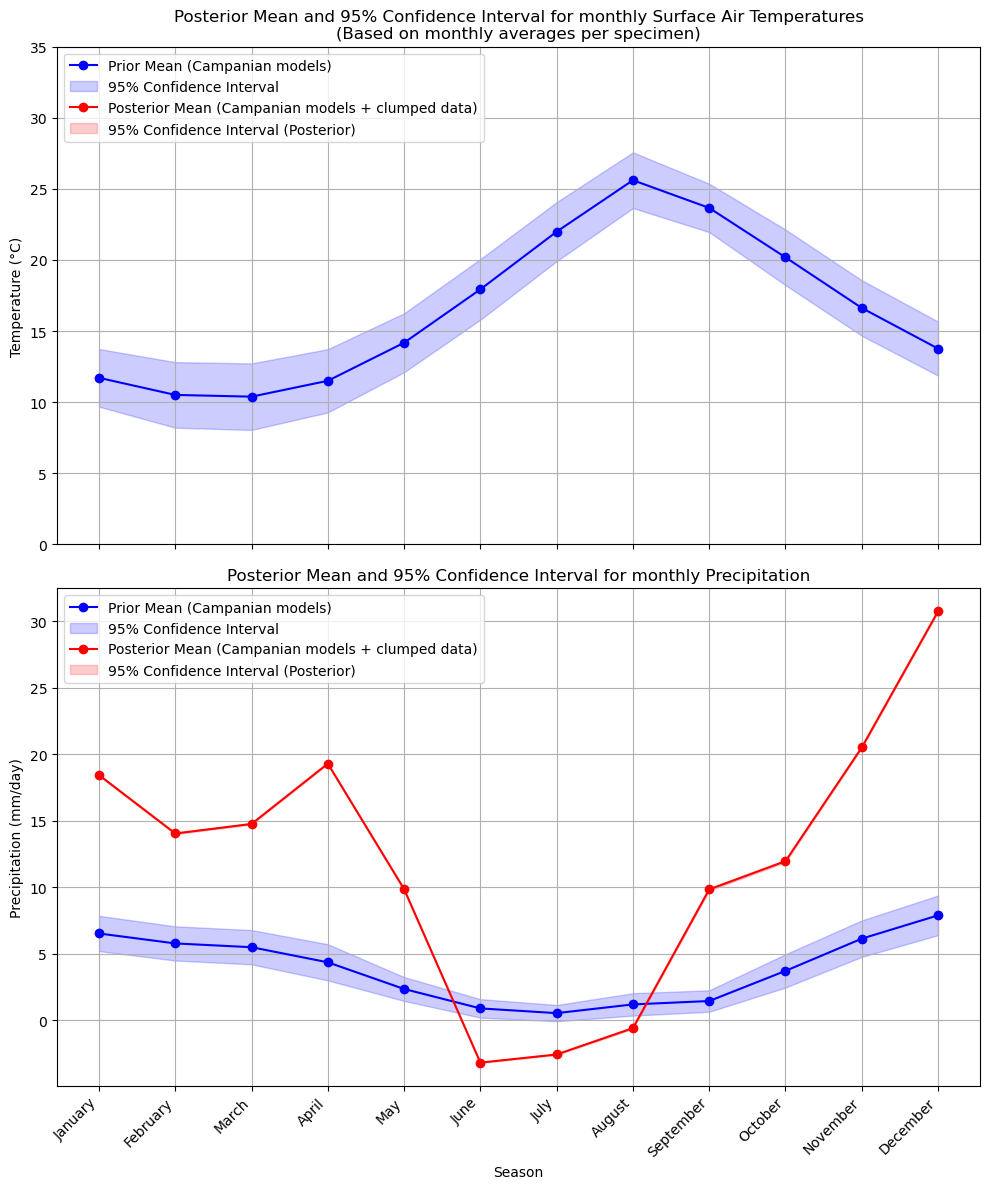

In [54]:
# Convert posterior D47 to temp
mu_post_SAT_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly, sD47 = cov_post_SAT_D47_monthly, return_covar = True)[0]
cov_post_SAT_D47_monthly_T = D47c.OGLS23.T47(D47 = mu_post_SAT_D47_monthly, sD47 = cov_post_SAT_D47_monthly, return_covar = True)[1]

# Convert posterior SAT-D47 back to temperature
std_post_SAT_D47_monthly_T = np.nan_to_num(np.sqrt(np.diag(cov_post_SAT_D47_monthly_T)))

fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

# --- SAT prior and posterior ---
# PRIOR
axs[0].plot(months_scale, mu_prior_SAT_monthly_original, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[0].fill_between(
    months_scale,
    mu_prior_SAT_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    mu_prior_SAT_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[0].plot(months_scale, mu_post_SAT_D47_monthly_T, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[0].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_T - stats.t.ppf(1 - 0.025, (n_update_monthly_D47 + n_models_monthly)) * std_post_SAT_D47_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    mu_post_SAT_D47_monthly_T + stats.t.ppf(1 - 0.025, (n_update_monthly_D47 + n_models_monthly)) * std_post_SAT_D47_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[0].set_title('Posterior Mean and 95% Confidence Interval for monthly Surface Air Temperatures\n(Based on monthly averages per specimen)')
axs[0].set_ylabel('Temperature (°C)')
axs[0].set_ylim(0, 35)
axs[0].legend(loc='upper left')
axs[0].grid(True)

# --- Precipitation prior and posterior ---
# PRIOR
axs[1].plot(months_scale, mu_prior_precip_monthly_original, label='Prior Mean (Campanian models)', color='b', marker='o')
axs[1].fill_between(
    months_scale,
    mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    color='b', alpha=0.2, label='95% Confidence Interval'
)

# POSTERIOR
axs[1].plot(months_scale, mu_post_precip_monthly, label='Posterior Mean (Campanian models + clumped data)', color='r', marker='o')
axs[1].fill_between(
    months_scale,
    mu_post_precip_monthly - stats.t.ppf(1 - 0.025, (n_update_monthly_D47 + n_models_monthly)) * np.sqrt(np.diag(cov_post_precip_monthly)) / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    mu_post_precip_monthly + stats.t.ppf(1 - 0.025, (n_update_monthly_D47 + n_models_monthly)) * np.sqrt(np.diag(cov_post_precip_monthly)) / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    color='r', alpha=0.2, label='95% Confidence Interval (Posterior)'
)

axs[1].set_title('Posterior Mean and 95% Confidence Interval for monthly Precipitation')
axs[1].set_xlabel('Season')
axs[1].set_ylabel('Precipitation (mm/day)')
axs[1].legend(loc='upper left')
axs[1].grid(True)

plt.xticks(months_scale, month_names, rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Plot SAT, SST, SSS and precipitation posterior

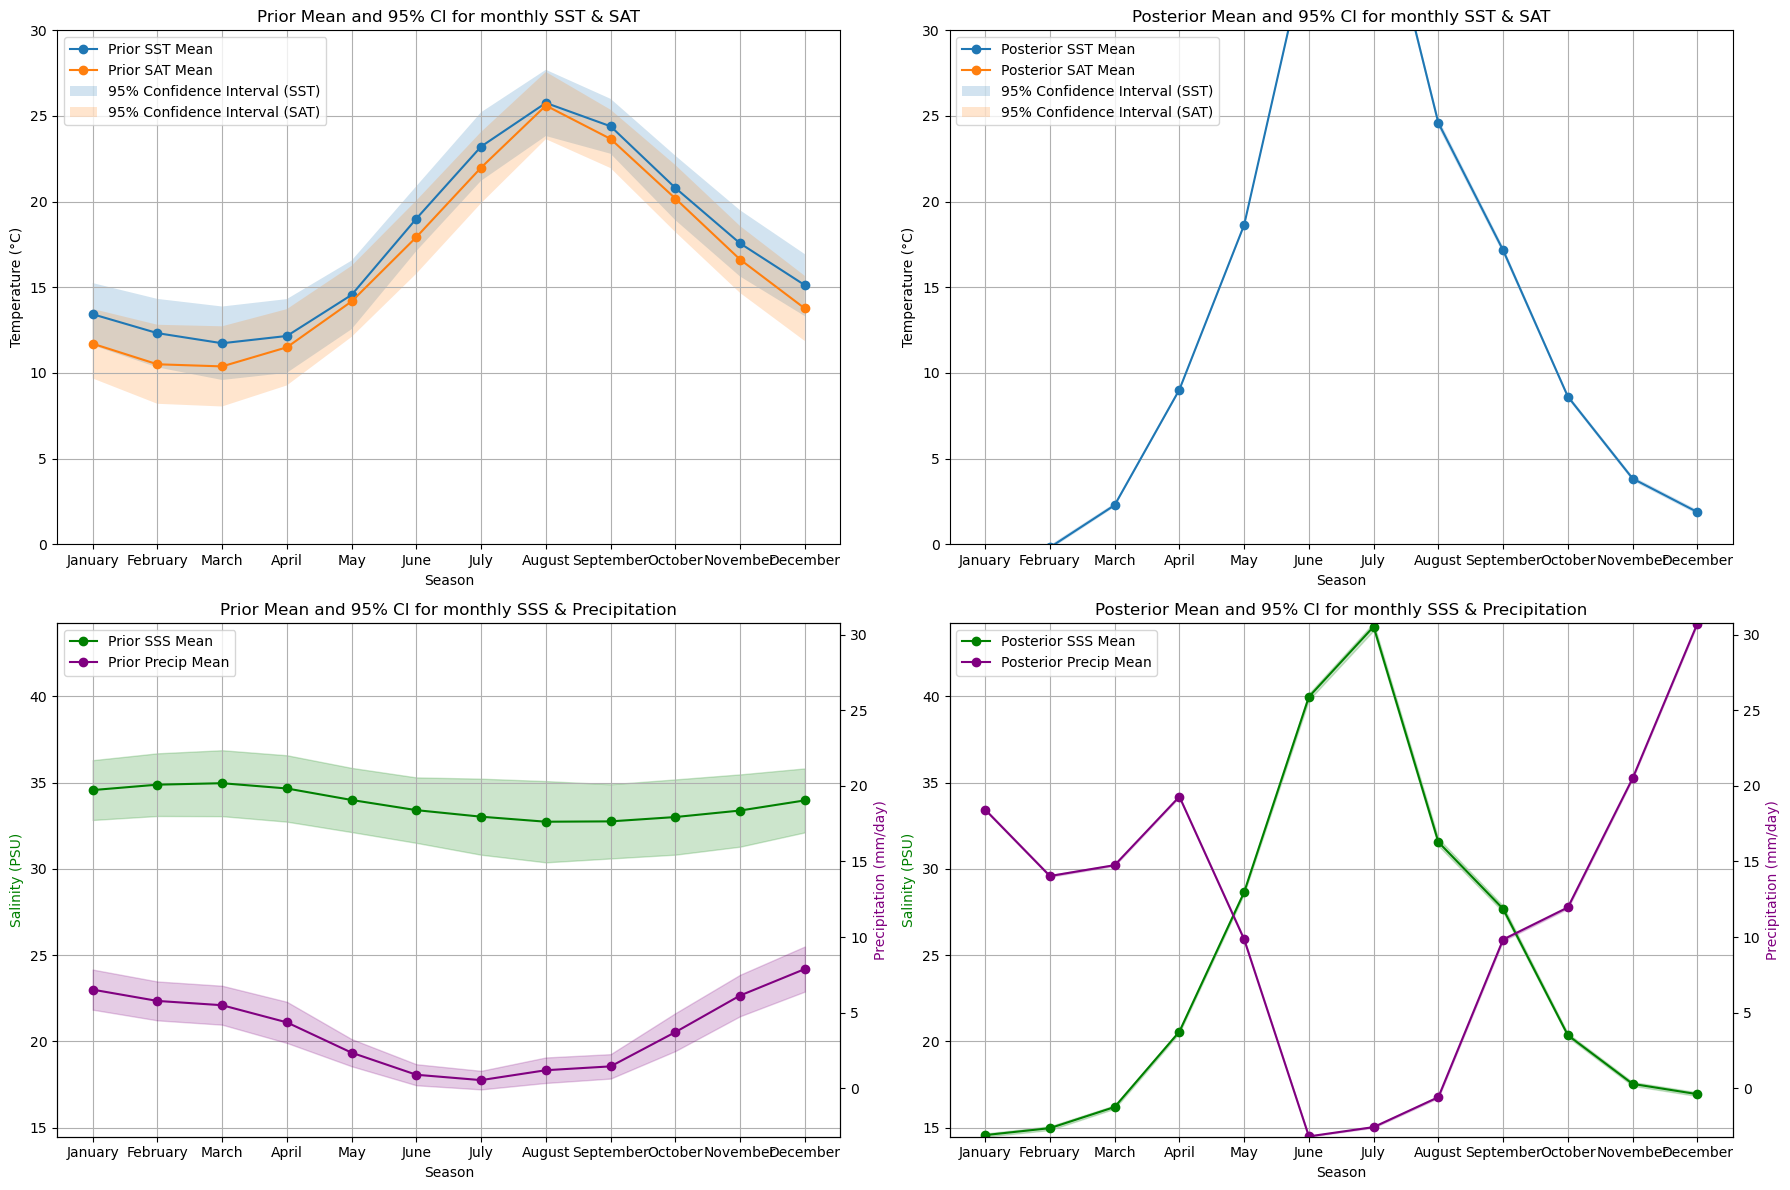

In [55]:
# Create a figure with two rows and two columns of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# --- SST & SAT Prior and Posterior ---
# Prior SST & SAT
axes[0, 0].plot(months_scale, mu_prior_SST_monthly, label='Prior SST Mean', marker='o')
axes[0, 0].plot(months_scale, mu_prior_SAT_monthly, label='Prior SAT Mean', marker='o')
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SST_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    mu_prior_SST_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SST_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 0].fill_between(
    months_scale,
    mu_prior_SAT_monthly - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    mu_prior_SAT_monthly + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SAT_monthly / np.sqrt(n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 0].set_xticks(months_scale)
axes[0, 0].set_xticklabels(month_names)
axes[0, 0].set_title('Prior Mean and 95% CI for monthly SST & SAT')
axes[0, 0].set_xlabel('Season')
axes[0, 0].set_ylabel('Temperature (°C)')
axes[0, 0].set_ylim(0, 30)
axes[0, 0].legend(loc='upper left')
axes[0, 0].grid(True)

# Posterior SST & SAT
axes[0, 1].plot(months_scale, mu_post_SST_D47_monthly_T, label='Posterior SST Mean', marker='o')
axes[0, 1].plot(months_scale, mu_post_SAT_D47_monthly_T, label='Posterior SAT Mean', marker='o')
axes[0, 1].fill_between(
    months_scale,
    mu_post_SST_D47_monthly_T - stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * std_post_SST_D47_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    mu_post_SST_D47_monthly_T + stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * std_post_SST_D47_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SST)'
)
axes[0, 1].fill_between(
    months_scale,
    mu_post_SAT_D47_monthly_T - stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * std_post_SAT_D47_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    mu_post_SAT_D47_monthly_T + stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * std_post_SAT_D47_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    alpha=0.2, label='95% Confidence Interval (SAT)'
)
axes[0, 1].set_xticks(months_scale)
axes[0, 1].set_xticklabels(month_names)
axes[0, 1].set_title('Posterior Mean and 95% CI for monthly SST & SAT')
axes[0, 1].set_xlabel('Season')
axes[0, 1].set_ylabel('Temperature (°C)')
axes[0, 1].set_ylim(0, 30)
axes[0, 1].legend(loc='upper left')
axes[0, 1].grid(True)

# --- SSS & Precipitation Prior and Posterior (Shared Plot, Twin Axes) ---

# Get y-limits for SSS and precipitation (prior and posterior) to keep them consistent
sss_min = min(np.min(mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly)),
              np.min(mu_post_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly)))
sss_max = max(np.max(mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly)),
              np.max(mu_post_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly)))
precip_min = min(np.min(mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly)),
                 np.min(mu_post_precip_monthly - stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly)) / np.sqrt(n_update_monthly_D47 + n_models_monthly)))
precip_max = max(np.max(mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly)),
                 np.max(mu_post_precip_monthly + stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly)) / np.sqrt(n_update_monthly_D47 + n_models_monthly)))

# --- Prior SSS & Precipitation ---
ax1 = axes[1, 0]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_prior_SSS_d18Ow_monthly_T, label='Prior SSS Mean', marker='o', color="green")
ax1.fill_between(
    months_scale,
    mu_prior_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    mu_prior_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_SSS_d18Ow_monthly_T / np.sqrt(n_models_monthly),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(months_scale, mu_prior_precip_monthly_original, label='Prior Precip Mean', marker='o', color="purple")
ax2.fill_between(
    months_scale,
    mu_prior_precip_monthly_original - stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    mu_prior_precip_monthly_original + stats.t.ppf(1 - 0.025, n_models_monthly) * std_prior_precip_monthly / np.sqrt(n_models_monthly),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names)
ax1.set_title('Prior Mean and 95% CI for monthly SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + lns2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

# --- Posterior SSS & Precipitation ---
ax1 = axes[1, 1]
ax2 = ax1.twinx()
lns1 = ax1.plot(months_scale, mu_post_SSS_d18Ow_monthly_T, label='Posterior SSS Mean', marker='o', color="green")
ax1.fill_between(
    months_scale,
    mu_post_SSS_d18Ow_monthly_T - stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    mu_post_SSS_d18Ow_monthly_T + stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * std_post_SSS_d18Ow_monthly_T / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    color="green", alpha=0.2, label='95% CI (SSS)'
)
lns2 = ax2.plot(months_scale, mu_post_precip_monthly, label='Posterior Precip Mean', marker='o', color="purple")
ax2.fill_between(
    months_scale,
    mu_post_precip_monthly - stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly)) / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    mu_post_precip_monthly + stats.t.ppf(1 - 0.025, n_update_monthly_D47 + n_models_monthly) * np.sqrt(np.diag(cov_post_precip_monthly)) / np.sqrt(n_update_monthly_D47 + n_models_monthly),
    color="purple", alpha=0.2, label='95% CI (Precip)'
)
ax1.set_xticks(months_scale)
ax1.set_xticklabels(month_names)
ax1.set_title('Posterior Mean and 95% CI for monthly SSS & Precipitation')
ax1.set_xlabel('Season')
ax1.set_ylabel('Salinity (PSU)', color="green")
ax2.set_ylabel('Precipitation (mm/day)', color="purple")
ax1.set_ylim(sss_min, sss_max)
ax2.set_ylim(precip_min, precip_max)
lns = lns1 + lns2
labels = [l.get_label() for l in lns]
ax1.legend(lns, labels, loc='upper left')
ax1.grid(True)

plt.tight_layout()
plt.show()